# Speaker-Independent Spoken Digit Recognition (xSDR)


One of the successful stories of deep neural networks is the proliferation of commercial of automatic speech recognition (ASR) systems. This project aims to explore one application of ML-powered ASR to the problem of spoken digit recognition (SDR). Since digits are widely used as unique identifiers for bank information, social security numbers, post codes, etc, SDR systems can be an efficient alternative to fully-fledged ASR systems since the domain is more predictable than other applications of ASR.

In this project, we focus on developing a SDR system in a speaker-independent setting. That is, the speakers in the evaluation set are disjoint from the training set speakers. We do so because we expect real-world ASR systems to generalize to different speakers than those we have data for. Moreover, for many languages that are under-resourced, we have have (limited) annotated speech data from a single speaker, but we would still want the system to be deployed to work on any speaker of that language. We tackle the problem of spoken digit recognition as a sequence classification task. Concretely, the inputs are short audio clips of a specific digit (in the range 0-9), then the goal is to build deep neural network models to classify a short audio clip and predict the digit that was spoken.

# Notes

## Code Submission

You don't necessarily need to complete the code in this Jupyter Notebook, you are free to use another notebook or a python script file, as you would like. You are expected to submit the code by **22.03.2023**.

Your code should be clean and well commented. We also expect that if we decide to run it on our system, it should be straighforward to do so. We recommend creating a ```requirements.txt``` file with the names of all the libraries with their versions. If applicable, please mention the python version in a ```README.md``` file, which should also include instructions on how to run your code.

As mentioned for the assignments, always remember to cite the code with the links as comments, if you decide to use it from a public repository.

## Report Submission

With the code, you are also expected to submit a report with a maximum of 4 pages. You should write your report in LaTeX using this template for ACL 2023 [Overleaf Link](https://www.overleaf.com/latex/templates/acl-2023-proceedings-template/qjdgcrdwcnwp). Use this document to fill in any missing information that are not necessarily covered during your presentation for the sake of time in the presentation. While writing your report, we would highly encourgae you to cite the papers behind each tool / library / function that you might use for your experiments. We have also released an example on how to write equations in LaTeX [here](https://piazza.com/class/l9so16qqvk34hu/post/52).

You art also expected to submit this report with your code. You should provide the **.tex, .pdf and all image files** zipped with the same naming convention as it was in your assignment(s).

## Presentation

During the last week of March 2023, i.e. 27.03 -- 31.03, each team will be presenting their works for 15 minutes. We expect equal contribution from each member in delivery and content of the presentation. So roughly 5 minutes for one person, if you have 3 people in your team. There will be 5 minutes for some Q&A. At-least one person from your team should be present to do an in-person presentation, rest of your team could join remotely, if they are not present.

## Important Dates

 - Code & Report Submission: 22.03.2023 (08.00)
 - Presentation: 27.03.2023 -- 31.03.2023

 You'll get a precise date and time for your team's presentation at a later time.

### Grading

In this project, your final grades will be determined as follows:

 - **30%**: &emsp; Completing all the tasks
 - **30%**: &emsp; Providing scientific-backings for all the methods used
 - **20%**: &emsp; Quality of the content of the presentation
 - **20%**: &emsp; Delivery of the presentation

In [ ]:
!pip install patool



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 4.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import patoolib
patoolib.extract_archive("./drive/MyDrive/project.zip", outdir="./")

patool: Extracting ./drive/MyDrive/project.zip ...
patool: running /usr/bin/7z x -o./ -- ./drive/MyDrive/project.zip
patool: ... ./drive/MyDrive/project.zip extracted to `./'.


'./'

In [ ]:
#%matplotlib inline
import numpy as np
import scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

import pandas as pd

from sklearn  import preprocessing


from collections import defaultdict, Counter

# add this to ignore warnings from Librosa
import warnings
warnings.filterwarnings('ignore')

import random

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
import os
import glob
import random
from pathlib import Path
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch.utils.data as data
import pandas as pd
import os
import shutil
from glob import glob
import pandas as pd
import os
from IPython.display import clear_output
import shutil

In [ ]:
import time
import cv2
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [ ]:
# for linear models
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 10.4 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision import datasets
import torch.nn.functional as F
from tqdm import tqdm
from torchmetrics import F1Score
from torch.utils.data import Dataset,DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

In [ ]:
from sklearn.neural_network import MLPClassifier

## Exploring the Dataset

The speech samples are already divied into training, development, and test spilts. The splits are made in such way that evaluation speakers are not present in training split. You should use the splits as they are.

**CAUTION:**

In this project, you are not allowed to use any external data for this problem (at least for the main three tasks). Exploring the effect of additional datasets in this project can only included as a further step after completing the main requirements with the given data.

In [ ]:
# read tsv file into a dataframe
sdr_df = pd.read_csv('SDR_metadata.tsv', sep='\t', header=0, index_col='Unnamed: 0')

In [ ]:
sdr_df.head()

identifier   speaker  split  label                           file
0      5_theo_23      theo  TRAIN      5      speech_data/5_theo_23.wav
1  2_yweweler_39  yweweler   TEST      2  speech_data/2_yweweler_39.wav
2  6_yweweler_34  yweweler    DEV      6  speech_data/6_yweweler_34.wav
3  6_yweweler_16  yweweler    DEV      6  speech_data/6_yweweler_16.wav
4   9_yweweler_2  yweweler   TEST      9   speech_data/9_yweweler_2.wav

In [ ]:
set(sdr_df.speaker.values)

{'george', 'jackson', 'lucas', 'nicolas', 'theo', 'yweweler'}

In [ ]:
# explore one sample: 7_theo_0
sdr_df.loc[sdr_df['identifier'] == '7_theo_0']

identifier speaker  split  label                      file
700   7_theo_0    theo  TRAIN      7  speech_data/7_theo_0.wav

In [ ]:
sample_wav_file = sdr_df.loc[sdr_df['identifier'] == '7_theo_0'].file[700]

In [ ]:
sample_wav_file

'speech_data/7_theo_0.wav'

## The Speech Waveform

The acoustic realization of speech segment can be (digitally) viewed as a time-variant wavform $\mathbf{S} \in \mathbb{R}^{n}$. Here, $n$ depends on both the duration of the speech segment and the sampling rate of the continous speech singal. Let's check out one sample from the data set.

In [ ]:
# play and listen to a sample
SAMPLING_RATE = 8000 # This value is determined by the wav file, DO NOT CHANGE

x, sr = librosa.load(sample_wav_file, sr=SAMPLING_RATE) #,
ipd.Audio(x, rate=sr)

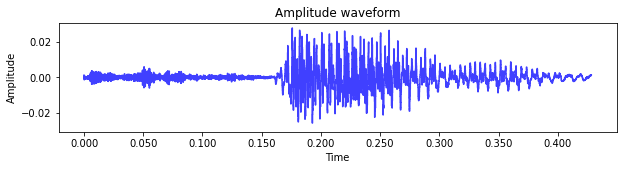

In [ ]:
# plot as a waveform
fig, ax = plt.subplots(figsize=(10, 2), sharex=True)

img = librosa.display.waveshow(y=x, sr=sr, alpha=0.75, x_axis='time', color='blue')

ax.set(title='Amplitude waveform')
ax.set_ylabel('Amplitude')
ax.label_outer()

In [ ]:
# sample duration in milliseconds
(1000*len(x))/SAMPLING_RATE

428.5

In the cell above, you can see the temporal duration of the audio is 428.5 milliseconds. For digits in the range 0-9, the duration of the speech segment should be around 0.5 seconds with reasonable variation depending on speech rate (i.e., how fast the speaker speaks).

## The Speech Signal Representation - Mel Spectrograms

Humans can recognize and differentiate different speech sounds based on the frequency characteristics of the sounds. For machine learning applications, human speech is represented using spectro-temporal features in the [Mel-scale](https://en.wikipedia.org/wiki/Mel_scale) extracted from the speech sample. Mel-scale features are inspired by human speech perception and auditory processing whereby the human ear has difference sensitivity (or resolution) in differet frequency bandes. That is, the human ear can better recognize differences in in lower range frequences, while higher range frequences have a lower resolution. The Mel-scale is linear for frequencies in the range (0-1kHz), and logarithmic for frequencies above 1kHz.

In the spectro-temporal representation of speech, a speech sample can be seen as a sequence of $T$ spectral vectors as $\mathbf{X} = (\mathbf{x}^1, \mathbf{x}^2, \dots, \mathbf{x}^T)$. Each spectral vector $\mathbf{x}^t \in \mathbb{R}^{k}$ at time-step $t$ is extracted from a short speech segment (~25 milliseconds) with the assumption that the signal is time-invariant in this small time window. Here, $k$ is the number of frequency bands in the [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) and this is a parameter of the feature extraction pipeline. The representation is based on the Fourier transform to convert the temporal signal into the frequency domain.

In automatic speech recognition (ASR) research and applications, spectral vectors are usually referred to as "acoustic frames". Morover, adjacent frames are extracted with some overlap between them, usually ~10 milliseconds.

In [ ]:
def extract_melspectrogram(signal, sr, num_mels):
    """
    Given a time series speech signal (.wav), sampling rate (sr),
    and the number of mel coefficients, return a mel-scaled
    representation of the signal as numpy array.
    """

    mel_features = librosa.feature.melspectrogram(y=signal,
        sr=sr,
        n_fft=200, # with sampling rate = 8000, this corresponds to 25 ms
        hop_length=80, # with sampling rate = 8000, this corresponds to 10 ms
        n_mels=num_mels, # number of frequency bins, use either 13 or 39
        fmin=50, # min frequency threshold
        fmax=4000 # max frequency threshold, set to SAMPLING_RATE/2
    )

    # for numerical stability added this line
    mel_features = np.where(mel_features == 0, np.finfo(float).eps, mel_features)

    # 20 * log10 to convert to log scale
    log_mel_features = 20*np.log10(mel_features)

    # feature scaling
    scaled_log_mel_features = preprocessing.scale(log_mel_features, axis=1)

    return scaled_log_mel_features

In [ ]:
melspectrogram[0]

Note that the shape of the array (K x T) represents the number of frequency bands (K) and the number of spectral vectors in this representation (here, K=13, T=43). K is a hyperparameter and the recommended values in ASR research are (13, 39, 81, etc). Here, we fix K = 13. On the other hand, T varies from sample to sample depending on the duration of the sample.  

As you can see above from the figure, the spectrogram representation can be viewed as a matrix $\mathbf{X} \in \mathbb{R}^{T} \times \mathbb{R}^{k}$.  

## Task I
1. One problem with the spectrogram as a speech feature represetation is that different speech samples would have dfferent durations due to inherent speech variability (e.g., speech rate, speaker dialect, etc). That is, the $T$ in the $(T \times k)$-dimensional representation would be different for each sample. Therefore, for the baseline model, we will implement a method to have a fixed-size representation for all speech samples. Write a function downsample_spectrogram(X, N) that takes as input a spectrogram $\mathbf{X} \in \mathbb{R}^{T \times k}$ and a parameter N <= 25. The function should (1) make N equally-sized splits of S across the time-axis, (2) apply a pooling technique (e.g., mean pooling) to each split across the frequency axis to obtain an array that represents a downsampled version of the spectrogram $\mathbf{X}' \in \mathbb{R}^{N \times k}$, and (3) re-arange $\mathbf{X}'$ as a vector $\mathbf{v} \in \mathbb{R}^{Nk}$.    

2. Using the downsample_spectrogram(X, N) function, transform all the speech samples into vectors $\mathbf{v} \in \mathbb{R}^{Nk}$.

3. Given the speaker-based train/dev/test spilts in the SDR_metadata.tsv, fit a linear model on the training samples. That is, your model should be build on data from 4 speakers {'nicolas', 'theo' , 'jackson',  'george'}. Hint: you can experiment with a few model alternatives in the SGDClassifier module in scikit-learn.

4. Evaluate you model on the dev and test splits. Use accuracy as an evaluation metric. Analyze the model performance using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) of the all possible labels (0-9), Analyze [precision, recall](https://en.wikipedia.org/wiki/Precision_and_recall), [F1-score](https://en.wikipedia.org/wiki/F-score) for each label. Report your observation.

In [ ]:
def downsample_spectrogram(X, N):
    """
    Given a spectrogram of an arbitrary length/duration (X ∈ K x T),
    return a downsampled version of the spectrogram v ∈ K * N
    """
    # ... your code here
    X = pd.DataFrame(X)
    newdf = pd.DataFrame(columns = [i for i in range(N)])
    z = 65
    r = N - X.shape[1] % N
    t = int(X.shape[1]/r)
    for i in range(r):
      X.insert(loc= i* (t) + i+1 , column= chr(z)  , value=pd.DataFrame(melspectrogram).loc[ : , i* t ])
      z+=1
    X = X.T
    X.reset_index(inplace = True, drop = True)
    X= X.T
    for index, j in X.iterrows():
      y = [ min(X.loc[index, a:a+ int(X.shape[1]/N)]) for a in range(0,X.shape[1], int(X.shape[1]/N ))]
      newdf.loc[len(newdf.index)] = y

    return newdf

In [ ]:
import os
os.makedirs('./images')
for i in range(10):
  for j in (['TRAIN', 'TEST', 'DEV']):
    os.makedirs(os.path.join('./images',j, str(i)))

## Baseline Model

In [ ]:
sdr_df.head()

identifier   speaker  split  label                           file
0      5_theo_23      theo  TRAIN      5      speech_data/5_theo_23.wav
1  2_yweweler_39  yweweler   TEST      2  speech_data/2_yweweler_39.wav
2  6_yweweler_34  yweweler    DEV      6  speech_data/6_yweweler_34.wav
3  6_yweweler_16  yweweler    DEV      6  speech_data/6_yweweler_16.wav
4   9_yweweler_2  yweweler   TEST      9   speech_data/9_yweweler_2.wav

In [ ]:
cv2.imread('/content/images/TEST/0/0_lucas_0.png').shape

(64, 64, 3)

In [ ]:
sdr_df[sdr_df['split'] == 'TRAIN']['speaker'] == 'theo'

0        True
6       False
7       False
8       False
9       False
        ...  
2988    False
2989     True
2990    False
2996     True
2998    False
Name: speaker, Length: 2000, dtype: bool

In [ ]:
# prepare data and split
for N in range(17,18,1):
  train_df = pd.DataFrame(columns = [i for i in range(N*13)])
  test_df = pd.DataFrame(columns = [i for i in range(N*13)])
  dev_df = pd.DataFrame(columns = [i for i in range(N*13)])
  train_df_y =[]; test_df_y = []; dev_df_y = []
  ls = ['TRAIN', 'TEST', 'DEV']
  ls_df = [train_df, test_df, dev_df]
  ls_df_y = [train_df_y, test_df_y, dev_df_y]
  for index,i in enumerate(ls):
    for sample_wav_file,label in zip(sdr_df[sdr_df['split'] == i]['file'], sdr_df[sdr_df['split'] == i]['label']):
        if(i != 'TRAIN' or  (sdr_df[sdr_df['split'] == i]['file']['speaker'] == 'theo')):
          x, sr = librosa.load(sample_wav_file, sr=SAMPLING_RATE) #,
          melspectrogram = extract_melspectrogram(x, sr, num_mels=13)
          fig, ax = plt.subplots(figsize=(10, 2), sharex=True)
          img = librosa.display.specshow(
          melspectrogram,
          sr=sr,
          x_axis='time',
          y_axis='mel',
          cmap='viridis',
          fmax=4000,
          hop_length=80)
          #ax.set(title='Log-frequency power spectrogram')
          fig.set_size_inches((64/fig.get_dpi(),64/fig.get_dpi()))
          plt.savefig(os.path.join(os.path.join(os.path.join("./images",i),str(label)), sample_wav_file.split("/")[1].split(".")[0]))
          plt.close(fig)
          W  = downsample_spectrogram(melspectrogram, N)
          ls_df[index].loc[len(ls_df[index].index)] = W.to_numpy().flatten()
          ls_df_y[index].append(label)

  # train a linear model
  scaler = StandardScaler()
  scaler.fit(train_df)
  train_df = scaler.transform(train_df)
  test_df = scaler.transform(test_df)
  dev_df = scaler.transform(dev_df)

  clf = SGDClassifier(loss="log", penalty="l2")
  clf.fit(train_df, train_df_y)

  # evaluate the model using accuracy metric
  y_pred_tst = clf.predict(test_df)
  y_pred_dev = clf.predict(dev_df)


  print('Accuracy_test: {:.2f}'.format(accuracy_score(test_df_y, y_pred_tst)))
  print('Accuracy_dev: {:.2f}'.format(accuracy_score(dev_df_y, y_pred_dev)))

  print('confusion matrix test\n', confusion_matrix(test_df_y, y_pred_tst))
  print('confusion matrix dev\n', confusion_matrix(dev_df_y, y_pred_dev))

  print("\nThe Classification Report for test \n",classification_report(test_df_y, y_pred_tst, labels=list(range(10))))
  print("\nThe Classification Report for dev \n",classification_report(dev_df_y, y_pred_dev, labels=list(range(10))))

  # analyze the confusion matrix of the baseline

  # report precision, recall, F1-score for each label

## Task II
1. Having established a baseline with a linear model trained on a downsampled signal representation of the speech segment, this task aims to learn a classifier based on the full speech segment. To this end, you will implement a neural model that is suitable for sequential data such as recurrent DNN, convolutional DNN with 1-D temporal convolution, or an audio transformer. The model should take the acoustic sample as it is (i.e., the Mel spectrogram could have an arbitrary length) without the need to downsample the segment. You need to implement at least two of the aforementioned models. Do the neural models improve accuracy over the baseline model? Do you observe any signs of overfitting to the training data? How do the hyperparameters affect the model performance? Report and discuss your observations.        

2. Evaluate your (best) neural models and compare to the baseline model using the same evalution process as in task I.4.

3. Use a dimensionality reduction algorithm such as t-SNE \[[1](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding),[2](https://pypi.org/project/tsne-torch/),[3](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)\] or [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) to analyze how the different models seperate the different classes (the last non-linear layer in your model). Compare to the downsampled representation you used in the baseline and report your observations.

4. Are the differences between the different models statistically significant? To answer this question, you need to implement a statistical significance test based on bootstrapping method. To read more how to estiame p-values based on bootstrapping, we recommend the materials on this paper https://aclanthology.org/D12-1091.pdf. Include the baseline model in your evaluation.

#CNN models pretrained and from scratch


In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
data_aug_transforms = []

#data_aug_transforms.append(transforms.RandomRotation([-90, 90]) )
#data_aug_transforms.append( transforms.RandomHorizontalFlip() )
#data_aug_transforms.append(transforms.ColorJitter(brightness = 0.2))

norm_transforms = [
                   transforms.ToTensor(),
                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]

train_transforms = transforms.Compose(data_aug_transforms + norm_transforms)

# Add Compose
test_transforms =transforms.Compose(norm_transforms)

In [ ]:
IMAGE_SIZE = 64
EPOCHS = 120
BATCH = 64
LR = 1e-4

train_data_path = "./images/TRAIN/"
test_data_path = "./images/TEST/"
dev_data_path = "./images/DEV/"
# ImageFolder is a generic data loader where the images are arranged in multiple folders

#Load TRAIN
train_data = torchvision.datasets.ImageFolder(root=train_data_path , transform=train_transforms)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH, shuffle=True)
print("data:", train_data)

# Load TEST
dev_data = torchvision.datasets.ImageFolder(root=dev_data_path, transform=test_transforms)
dev_data_loader = data.DataLoader(dev_data, batch_size=BATCH, shuffle = True)
print(len(dev_data))

test_data = torchvision.datasets.ImageFolder(root=test_data_path, transform=test_transforms)
test_data_loader = data.DataLoader(test_data, batch_size=BATCH, shuffle = True)
print(len(test_data))


# Check list of classes
# Are converted to 0,1 etc when call enumerate()
list_of_classes=list(map(str, list(train_data.classes)) )
print(" classes:", list_of_classes)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


In [ ]:
def get_f1(data,model):
    accdata=data
    F1=0
    i=0
    for X,Y in accdata:
        i+=len(X)
        X=X.to(device)
        Y=Y.to(device)
        f1= F1Score(task="multiclass", num_classes=10).to(device)
        ypred=model.forward(X.type(torch.FloatTensor).cuda())
        f1 = f1(ypred.argmax(1),Y)
        F1+=f1.item()
    print("F1 score:",F1/i)
    return (f1.item())


def get_accuracy(data,model):
    accdata=data
    train_acc=0
    i=0
    for X,Y in accdata:
        i+=len(X)
        X=X.to(device)
        Y=Y.to(device)
        ypred=model.forward(X.type(torch.FloatTensor).cuda())
        train_acc += torch.sum(ypred.argmax(1) == Y)
    accuracy = train_acc/i

    print(accuracy.item()*100,"%")
    return (accuracy.item())

def confusionplot(data,model):
    accdata=data

    YP=[]
    Ys=[]
    for X,Y in accdata:
        X=X.to(device)
        y_pred=torch.argmax(model.forward(X.type(torch.FloatTensor).cuda()),dim=1)
        YP+=y_pred.cpu()
        Ys+=Y
    cf_matrix = confusion_matrix(Ys, YP)
    classes = (0,1,2,3,4,5,6,7,8,9)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,10))
    sn.heatmap(df_cm, annot=True)


def classificationReport(data,model):
    accdata=data
    YP=[]
    Ys=[]
    for X,Y in accdata:
        X=X.to(device)
        y_pred=torch.argmax(model.forward(X.type(torch.FloatTensor).cuda()),dim=1)
        YP+=y_pred.cpu()
        Ys+=Y
    print(classification_report(Ys, YP, labels=list(range(10))))

In [ ]:
from torchvision import models
#from torchvision.models import ResNet50_Weights

layer_config= [2048, 512, 256]
num_classes = 10
num_epochs = 40
batch_size = 64
learning_rate = 0.001
learning_rate_decay = 0.99

# Create ResNet 50 model pretrained with ImageNet
class ResNet50(nn.Module):
    def __init__(self, n_class, fine_tune, pretrained=True):
        super(ResNet50, self).__init__()
        self.net = models.resnet50(pretrained=pretrained)

        # add new classifier layers
        self.net.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(layer_config[0], layer_config[1]),
            nn.BatchNorm1d(layer_config[1]),
            nn.Dropout(0.4),
            nn.ReLU(),
            nn.Linear(layer_config[1], layer_config[2]),
            nn.BatchNorm1d(layer_config[2]),
            nn.Dropout(0.4),
            nn.ReLU(),
            nn.Linear(layer_config[2], 23),
            nn.BatchNorm1d(23),
            nn.Dropout(0.4),
            nn.ReLU(),
            nn.Linear(23, 10)
        )

    def forward(self, x):
        out = self.net(x)
        return out
        #return out.view(-1, 1).squeeze(1).type(torch.FloatTensor)

# Initialize the model for this run
fine_tune = True
pretrained = True
model= ResNet50(num_classes, fine_tune, pretrained)
#model.load_state_dict(torch.load('./bestmodel.ckpt'), strict=False)
print(model)


print("Params to learn:")
if fine_tune:
    params_to_update = []
    for name, param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    params_to_update = model.parameters()
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)


model.to(device)

In [ ]:
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# store best model and acc
best_model_name = 'bestmodel.ckpt'
best_model = None
best_val_acc = 0.


loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update, lr=learning_rate)
# Train the model
lr = learning_rate
total_step = len(train_data_loader)
print(total_step)
ww=[]
ee = []

for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_data_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images).to(device)
        #predicted = torch.where(torch.sigmoid(outputs.data) > 0.5, 1, 0)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels) # labels are stored as float need cast to int

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Train accuracy is: {} %'.format(100 * correct / total))
    train_acc_history.append(100 * correct / total)
    loss_history.append(loss.item())

    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)

    with torch.no_grad():
        model.eval()
        correct = 0
        ee= []
        ww=[]
        total = 0
        F1 = 0
        f1= F1Score(task="multiclass", num_classes=10).to(device)
        for images, labels in dev_data_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images).to(device)
            _, predicted = torch.max(outputs.data, 1)
            ww = ww+ list(predicted.cpu().detach().numpy())
            ee = ee+ list(labels.cpu().detach().numpy())
            #predicted = torch.where(torch.sigmoid(outputs.data) > 0.5, 1, 0)
            f1_ = f1(predicted,labels)
            F1+=f1_.item()

            loss = criterion(outputs, labels)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        f1_score = 100* F1/total
        print("f1 score", f1_score)
        cf_matrix = confusion_matrix(ee,ww)
        print(ee)
        print(ww)
        classes = (0,1,2,3,4,5,6,7,8,9)
        df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                            columns = [i for i in classes])
        plt.figure(figsize = (12,10))
        sn.heatmap(df_cm, annot=True)

        print(classification_report(ee, ww, labels=list(range(10))))

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            #best_model = model
            #torch.save(model.state_dict(), best_model_name)
            print("New best validation accuracy: {} %".format(best_val_acc))



        print('Validataion accuracy is: {} %'.format(100 * correct / total))
        val_acc_history.append(val_accuracy)
        val_loss_history.append(loss.item())

plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# plot the loss history
plt.plot(loss_history)
plt.plot(val_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

## CNN from scratch

In [ ]:
class CNN(torch.nn.Module):
  def __init__(self):
      super().__init__()
      self.model = torch.nn.Sequential(
      #Input = 3 x 32 x 32, Output = 32 x 32 x 32
      torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1),
      torch.nn.ReLU(),
      #Input = 32 x 32 x 32, Output = 32 x 16 x 16
      torch.nn.MaxPool2d(kernel_size=2),

      #Input = 32 x 16 x 16, Output = 64 x 16 x 16
      torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
      torch.nn.ReLU(),
      #Input = 64 x 16 x 16, Output = 64 x 8 x 8
      torch.nn.MaxPool2d(kernel_size=2),

      #Input = 64 x 8 x 8, Output = 64 x 8 x 8
      torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1),
      torch.nn.ReLU(),
      #Input = 64 x 8 x 8, Output = 64 x 4 x 4
      torch.nn.MaxPool2d(kernel_size=2),

      torch.nn.Flatten(),
      torch.nn.Linear(64*8*8, 512),
      torch.nn.ReLU())


      self.t = torch.nn.Linear(512, 64)
      self.t1 =torch.nn.ReLU()
      self.t2 = torch.nn.Linear(64, 10)


  def forward(self, x):
        r = self.model(x)
        r1 = self.t(r)
        r2 = self.t1(r1)
        r3 = self.t2(r2)
        return r3, r1

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)

#Defining the model hyper parameters
num_epochs = 70
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0

    #Iterating over the training dataset in batches
    model.train()
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(train_data_loader):

        #Extracting images and target labels for the batch being iterated
        images = images.to(device)
        labels = labels.to(device)

        #Calculating the model output and the cross entropy loss
        outputs,op = model(images)
        loss = criterion(outputs, labels)

        #Updating weights according to calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        total += labels.size(0)
        _, y_pred = torch.max(outputs.data, 1)
        correct += (y_pred == labels).sum().item()
        train_loss += loss.item()
    print('Train accuracy is: {} %'.format(100 * correct / total))

    test_acc=0
    model.eval()
    ee= []
    ww=[]
    total = 0
    F1 = 0
    f1= F1Score(task="multiclass", num_classes=10).to(device)

    with torch.no_grad():
      #Iterating over the training dataset in batches
      for i, (images, labels) in enumerate(dev_data_loader):

        images = images.to(device)
        y_true = labels.to(device)

        #Calculating outputs for the batch being iterated
        outputs,op = model(images)

        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)
        ww = ww+ list(y_pred.cpu().detach().numpy())
        ee = ee+ list(labels.cpu().detach().numpy())
        #predicted = torch.where(torch.sigmoid(outputs.data) > 0.5, 1, 0)
        f1_ = f1(y_pred.to(device),labels.to(device))
        F1+=f1_.item()

        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()

      print(f"Test set accuracy = {100 * test_acc / len(dev_data)} %")
      f1_score = 100* F1/len(dev_data)
      print("f1 score", f1_score)
      cf_matrix = confusion_matrix(ee,ww)

      classes = (0,1,2,3,4,5,6,7,8,9)
      df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                            columns = [i for i in classes])
      plt.figure(figsize = (12,10))
      sn.heatmap(df_cm, annot=True)

      print(classification_report(ee, ww, labels=list(range(10))))


    #Printing loss for each epoch
    train_loss_list.append(train_loss/len(train_data_loader))
    print(f"Training loss = {train_loss_list[-1]}")

#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

In [ ]:
test_data_ = torchvision.datasets.ImageFolder(root=train_data_path, transform=test_transforms)
test_data_loader_ = data.DataLoader(test_data_, batch_size=1, shuffle = True)
print(len(test_data_))

capture_hidden_dim = np.zeros([len(test_data_loader_),64])
labelss = []
#capture_hidden_dim[index] = hn.detach().numpy().squeeze(0)[0]
#labelss.append(labels.detach().numpy().squeeze(0))

model.eval()
o=0
total = 0
for index,(images, labels) in enumerate(test_data_loader_):
                # Resize images
                #images = images.view(-1, seq_dim, input_dim)
                # Forward pass only to get logits/output
                images = images.to(device)
                y_true = labels.to(device)
                outputs, hn = model(images)
                capture_hidden_dim[index] = hn.cpu().detach().numpy().flatten()
                labelss.append(labels.detach().numpy().squeeze(0))
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.to(device) == labels.to(device)).sum()
print(total)
accuracy = 100 * correct / total


2000
2000


Explained variation per principal component: [0.29670346 0.18871078 0.14603845 0.1190929  0.08991289 0.07079389]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.005s...
[t-SNE] Computed neighbors for 2000 samples in 0.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 5.743043
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.467884
[t-SNE] KL divergence after 300 iterations: 1.186521


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

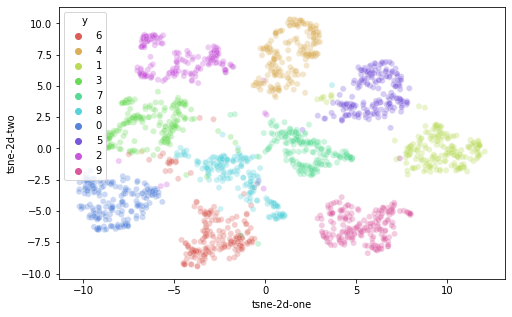

In [ ]:
capture_hidden_dim = pd.DataFrame(capture_hidden_dim)
df_subset = pd.DataFrame()

pca = PCA(n_components=6)
pca_result = pca.fit_transform(capture_hidden_dim)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
df_subset['pca-three'] = pca_result[:,2]
df_subset['pca-four'] = pca_result[:,3]
df_subset['pca-five'] = pca_result[:,4]
df_subset['pca-six'] = pca_result[:,5]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)

df_subset1 = pd.DataFrame()

#df_subset1['tsne-2d-one'] = tsne_results[:,0]
#df_subset1['tsne-2d-two'] = tsne_results[:,1]

df_subset1['tsne-2d-one'] = tsne_results[:,0]
df_subset1['tsne-2d-two'] = tsne_results[:,1]

df_subset1["y"] = labelss
df_subset1["y"] = df_subset1['y'].apply(lambda i: str(i))
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset1,
    legend="full",
    alpha=0.3
)

##RNN and LSTM V1

In [ ]:
from IPython.display import clear_output

In [ ]:
def sound_rep(file_):
      x, sr = librosa.load(os.path.join("./speech_data",file_)+".wav", sr=SAMPLING_RATE) #,
      melspectrogram = extract_melspectrogram(x, sr, num_mels=13)
      return np.expand_dims(melspectrogram.T, axis=1)

In [ ]:
def infer(net, file_):
    net.eval()
    name  = sound_rep(file_)
    hidden = net.init_hidden()

    for i in range(name.shape[0]):
        output, hidden = net(torch.from_numpy(name[i]), hidden)

    return output,hidden

def label_rep(label):
  r  = np.zeros(10)
  r[label] = 1
  return torch.from_numpy(r)

def dataloader(npoints, X_):
    to_ret = []
    rec = X_.sample(n = npoints)
    for i in (rec.index):
        file_, label = rec.loc[i].identifier, rec.loc[i].label
        to_ret.append((file_, torch.from_numpy(np.expand_dims(np.array(label), axis = 0)), sound_rep(file_)))
    return to_ret

def eval(net, n_points, X_, capture_hidden_dim):
    labelss = []
    data_ = dataloader(n_points, X_)
    correct = 0
    for index,(name, label, sound) in enumerate(data_):
        output,hidden = infer(net, name)
        capture_hidden_dim[index] = hidden[0].detach().numpy().squeeze(0)
        labelss.append(label.detach().numpy().squeeze(0))
        indices = torch.argmax(output)
        if (label == indices):
            correct += 1

    accuracy = correct/n_points
    return accuracy,capture_hidden_dim,labelss

In [ ]:
def train(net, opt, criterion, n_points):

    opt.zero_grad()
    total_loss = 0

    data_ = dataloader(n_points, sdr_df[sdr_df['split'] == 'TRAIN'])

    for name, label, sound in data_:

        output,hidden = infer(net, name)
        loss = criterion(output, label) #_.type(torch.LongTensor))
        loss.backward(retain_graph=True)
        total_loss += loss
    nn.utils.clip_grad_norm_(net.parameters(), 20.0)
    print(total_loss)
    opt.step()

    return total_loss/n_points

In [ ]:

def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq=5):
    capture_hidden_dim = np.zeros([len(sdr_df[sdr_df['split'] == 'DEV'].index),32])
    labelss = []
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

    loss_arr = np.zeros(n_batches + 1)

    for i in range(n_batches):
        #loss_arr[i] =  train(net, opt, criterion, batch_size)
        loss_arr[i+1] = (loss_arr[i]*i + train(net, opt, criterion, batch_size))/(i + 1)
        if i%display_freq == display_freq-1:
            #clear_output(wait=True)
            acc,capture_hidden_dim,labelss = eval(net, len(sdr_df[sdr_df['split'] == 'DEV']), sdr_df[sdr_df['split'] == 'DEV'], capture_hidden_dim)
            print('Iteration', i, 'Top-1:', acc,   'Loss', loss_arr[i])
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')
    return capture_hidden_dim, labelss


In [ ]:
class RNN_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_net, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, 128)
        #self.relu = nn.ReLU()
        #self.maxp = nn.MaxPool1d(kernel_size=2)
        #self.i2h1 = nn.Linear(64, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_, hidden):
        combined = torch.cat((input_, hidden), 1)
        hidden = self.i2h(combined)
        #maxp = self.maxp(hidden)
        #relu  = self.relu(maxp)

        #hidden1 = self.i2h1(maxp)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [ ]:
n_hidden = 32
net = RNN_net(13, n_hidden, 10)
train_setup(net, lr=0.0005, n_batches=200, batch_size = 256)

In [ ]:

class LSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = nn.LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input_, hidden):
        out, hidden = self.lstm_cell(input_.view(1, 1, -1), hidden)
        output = self.h2o(hidden[0])
        output = self.softmax(output)
        return output.view(1, -1), hidden

    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size))

In [ ]:
n_hidden = 32
net = LSTM_net(13, n_hidden, 10)
capture_hidden_dim, labelss = train_setup(net, lr=0.005, n_batches=200, batch_size = 256)

##RNN and LSTM V2

In [ ]:

class SDRDataset(Dataset):
    def __init__(self, metadata, type):
      self.metadata = metadata[metadata['split'] == type]
    def __len__(self):
      return len(self.metadata)
    def __getitem__(self, idx):
      audio_file = self.metadata.iloc[idx]['identifier']
      digit = self.metadata.iloc[idx]['label']
      signal, sr = librosa.load(os.path.join("./speech_data",audio_file) + ".wav", sr=8000)
      mel_spectrogram = extract_melspectrogram(signal, sr, num_mels=13)
      return torch.tensor(mel_spectrogram.T, dtype=torch.float32), torch.tensor(digit, dtype=torch.long)

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # Building your RNN
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, input_dim)
        # batch_dim = number of samples per batch
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim = 1)

    def forward(self, x):
        # Initialize hidden state with zeros
        # (layer_dim, batch_size, hidden_dim)
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        out1, hn = self.rnn(x.to(device), h0.detach().to(device) )
        out = self.fc(out1[:, -1, :])
        out = self.softmax(out)
        # out.size() --> 100, 10
        return out, hn

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # Building your RNN
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, input_dim)
        # batch_dim = number of samples per batch
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True, bidirectional = True)#, nonlinearity='relu')

        # Readout layer
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.softmax = nn.LogSoftmax(dim = 1)

    def forward(self, x):
        # Initialize hidden state with zeros
        # (layer_dim, batch_size, hidden_dim)
        h0 = torch.zeros(self.layer_dim*2, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.layer_dim*2, x.size(0), self.hidden_dim).requires_grad_().to(device)
        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        out, (hn,cn) = self.lstm(x, (h0.detach(),c0.detach()) )
        out = self.fc(out[:, -1, :])
        out = self.softmax(out)
        # out.size() --> 100, 10
        return out, hn

In [ ]:
train_dataset = SDRDataset(sdr_df, type = "TRAIN")
train_data_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
dev_dataset = SDRDataset(sdr_df, type = "DEV")
dev_data_loader = DataLoader(dev_dataset, batch_size=1, shuffle=True)

In [ ]:
input_dim = 13
hidden_dim = 32
capture_hidden_dim = np.zeros([10,hidden_dim])
layer_dim = 1  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10
num_epochs = 30
model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)

# JUST PRINTING MODEL & PARAMETERS
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())
criterion = nn.NLLLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Number of steps to unroll
total_loss = 0
iter = 0
f1= F1Score(task="multiclass", num_classes=10).to(device)
for epoch in range(num_epochs):
    total_loss = 0
    for i, ( sound, labels) in enumerate(train_data_loader):
        model.train()
        # Load images as tensors with gradient accumulation abilities
        #sound = sound.view(-1, seq_dim, input_dim).requires_grad_()
        sound = sound.requires_grad_()
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs, hn = model(sound.to(device))
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs.to(device), labels.to(device))


        # Getting gradients w.r.t. parameters
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 20.0)
        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            model.eval()
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            F1 = 0
            ww = []
            ee=[]
            for images, labels in dev_data_loader:
                # Resize images
                #images = images.view(-1, seq_dim, input_dim)


                # Forward pass only to get logits/output
                outputs, hn = model(images.to(device))
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.to(device) == labels.to(device)).sum()


                ww = ww+ list(predicted.cpu().detach().numpy())
                ee = ee+ list(labels.cpu().detach().numpy())
                #predicted = torch.where(torch.sigmoid(outputs.data) > 0.5, 1, 0)
                f1_ = f1(predicted.to(device),labels.to(device))
                F1+=f1_.item()

            print(f"Test set accuracy = {100 * correct / len(dev_dataset)} %")
            f1_score = 100* F1/len(dev_dataset)
            print("f1 score", f1_score)
            cf_matrix = confusion_matrix(ee,ww)

            classes = (0,1,2,3,4,5,6,7,8,9)
            df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                            columns = [i for i in classes])
            plt.figure(figsize = (12,10))
            sn.heatmap(df_cm, annot=True)

            print(classification_report(ee, ww, labels=list(range(10))))



            accuracy = 100 * correct / total
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

LSTMModel(
  (lstm): LSTM(13, 32, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=64, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=1)
)
10
torch.Size([128, 13])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 13])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([10, 64])
torch.Size([10])
Test set accuracy = 16.297786712646484 %
f1 score 16.29778672032193
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.00      0.00      0.00        45
           2       0.11      0.72      0.20        46
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        54
           5       0.00      0.00      0.00        50
           6       0.00      0.00      0.00        54
           7       0.26      0.09      0.14        53
           8       0.00      0.00      0.00        44
           9       0.23   

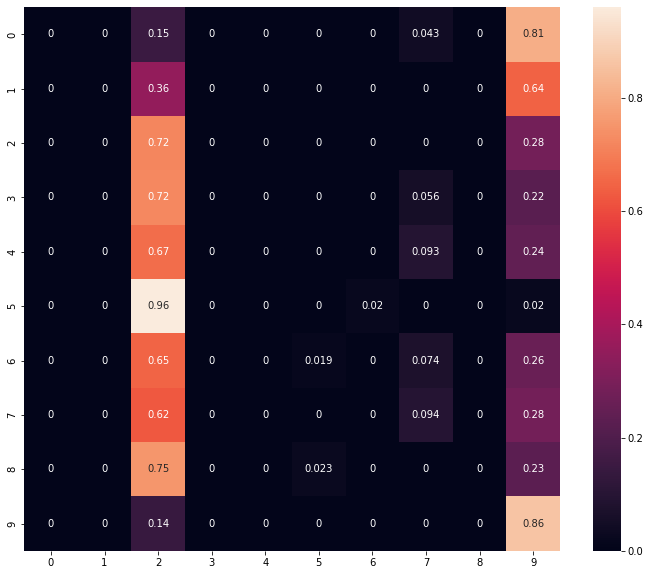

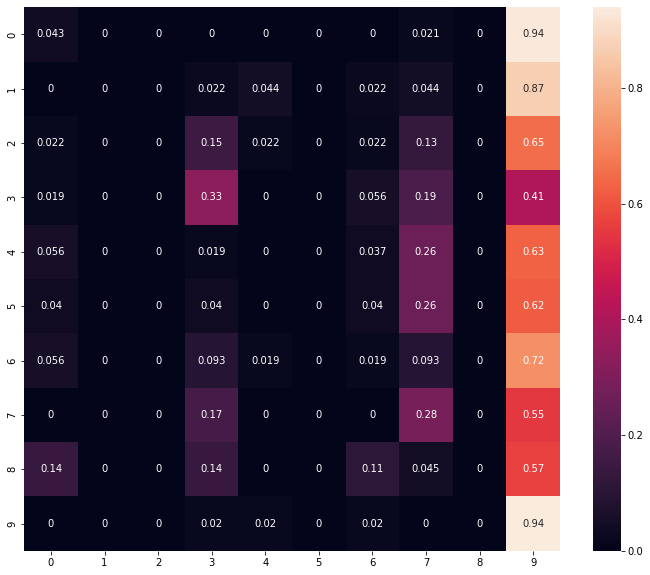

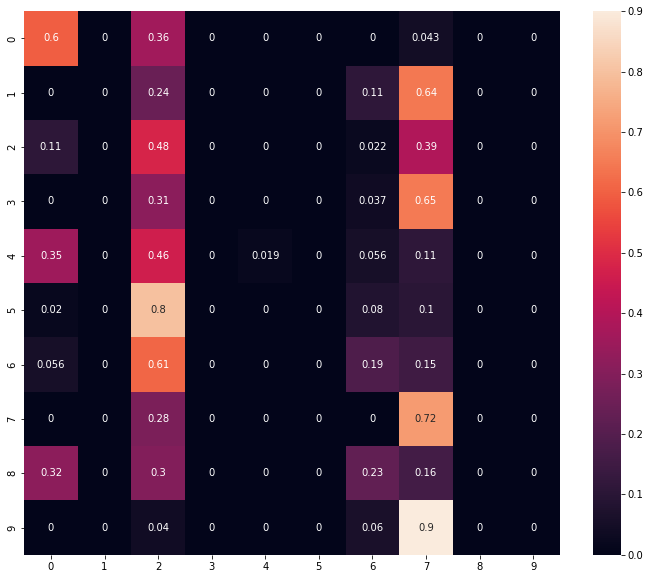

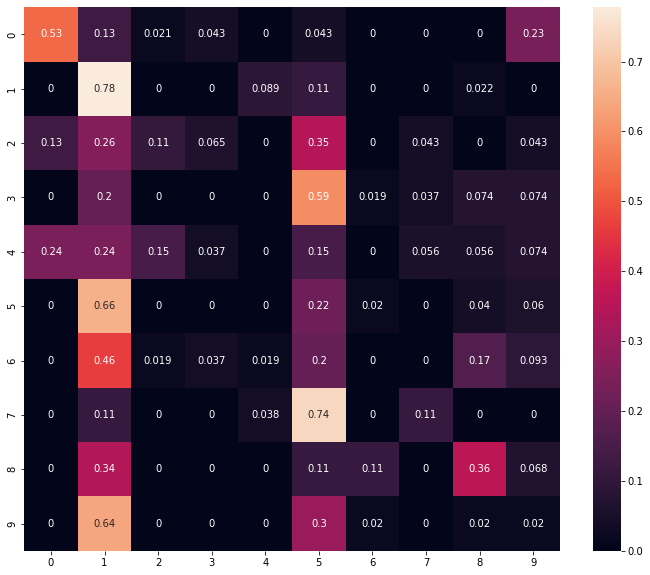

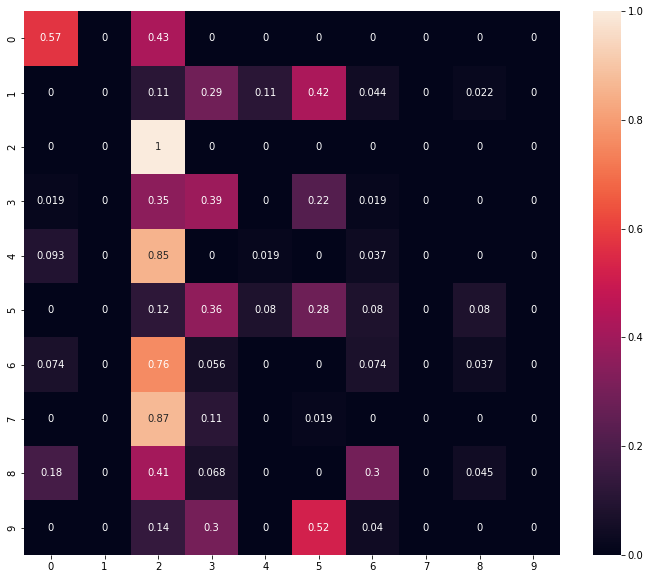

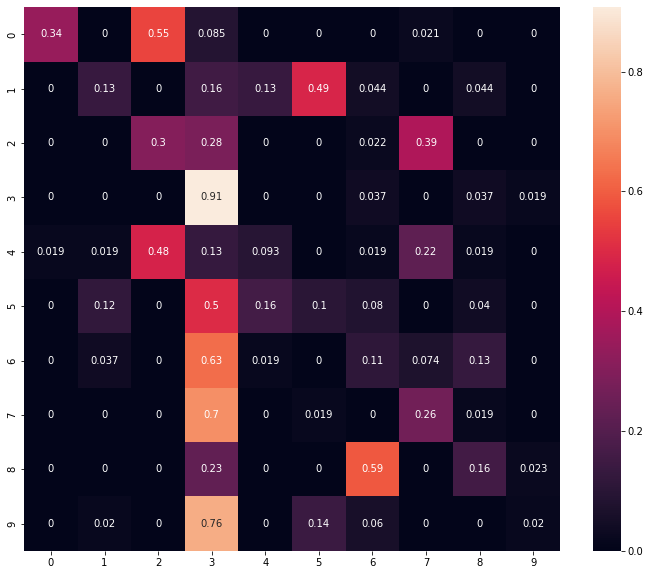

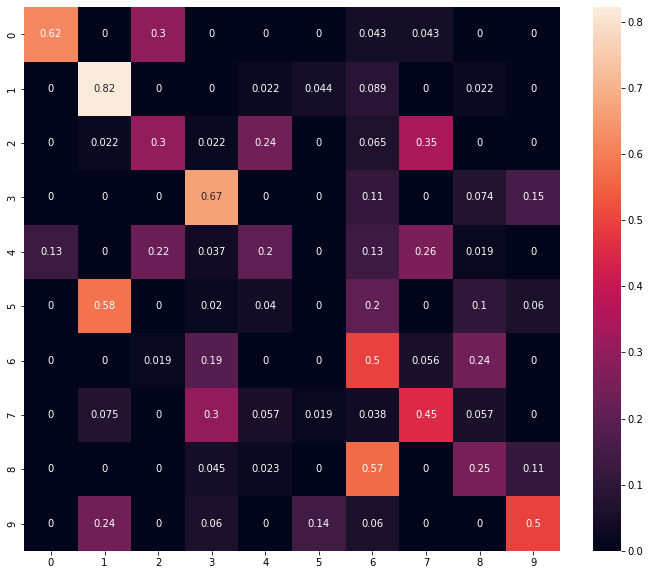

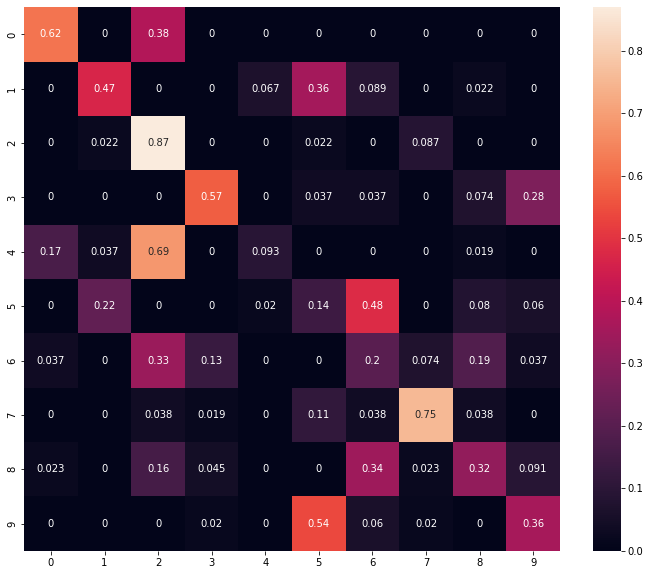

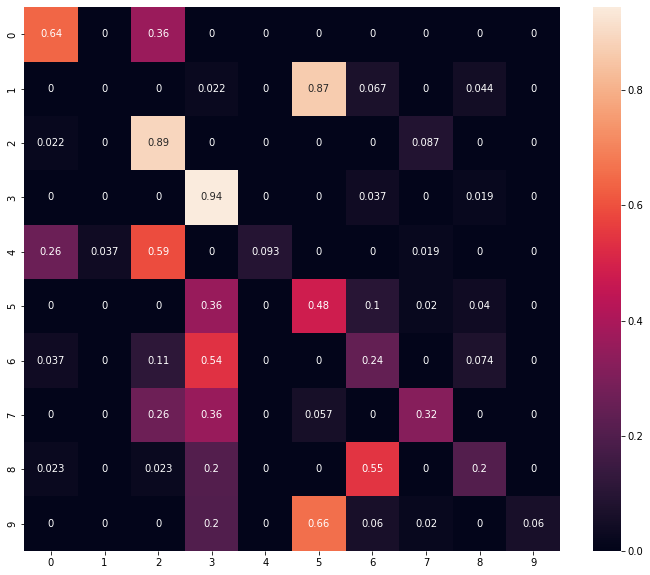

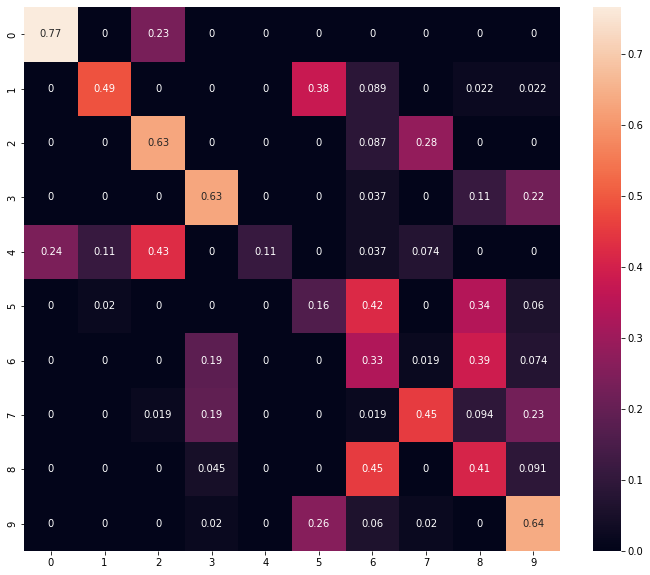

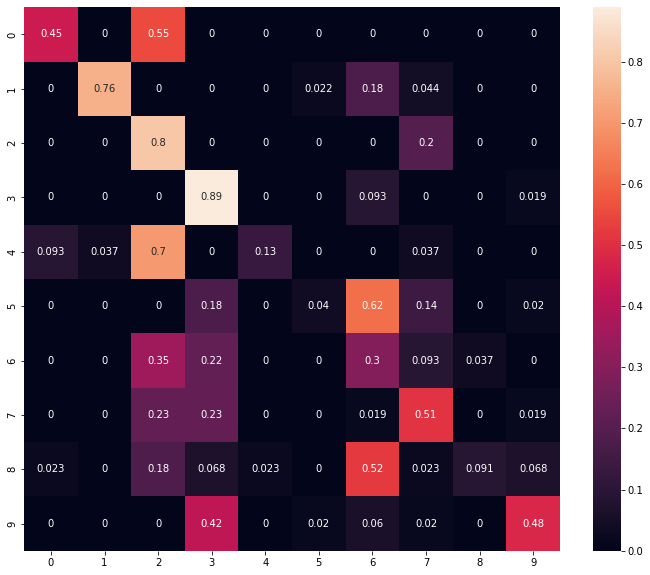

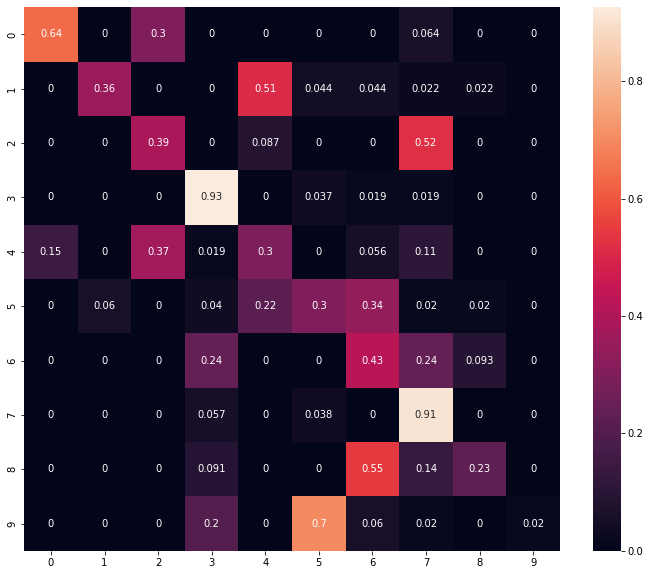

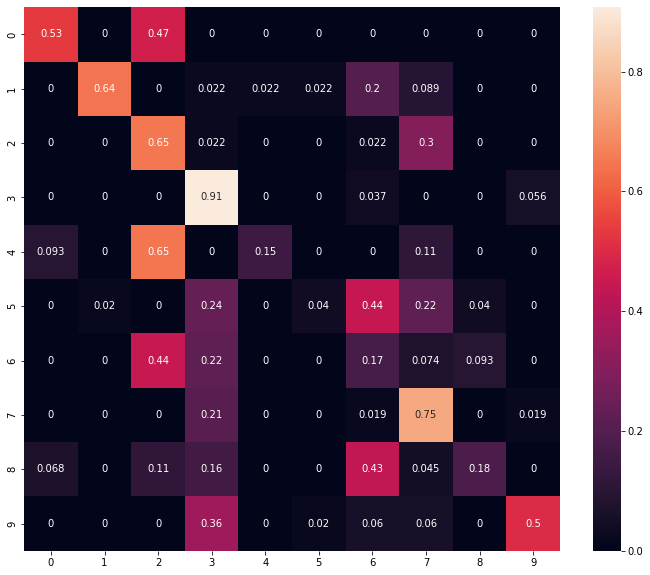

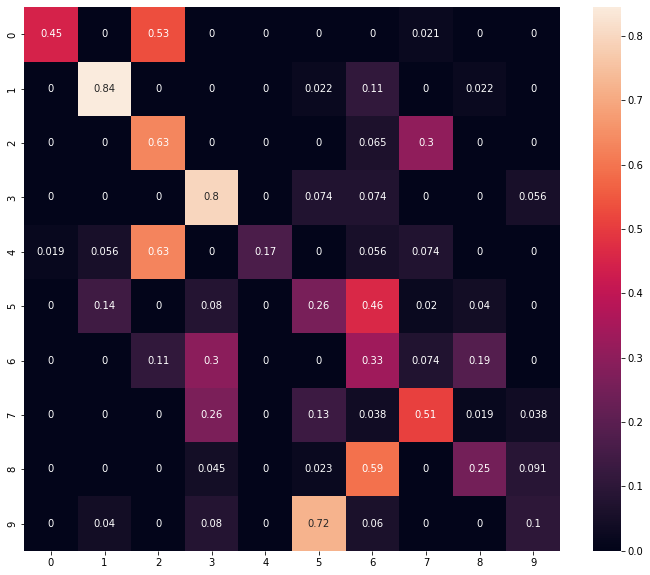

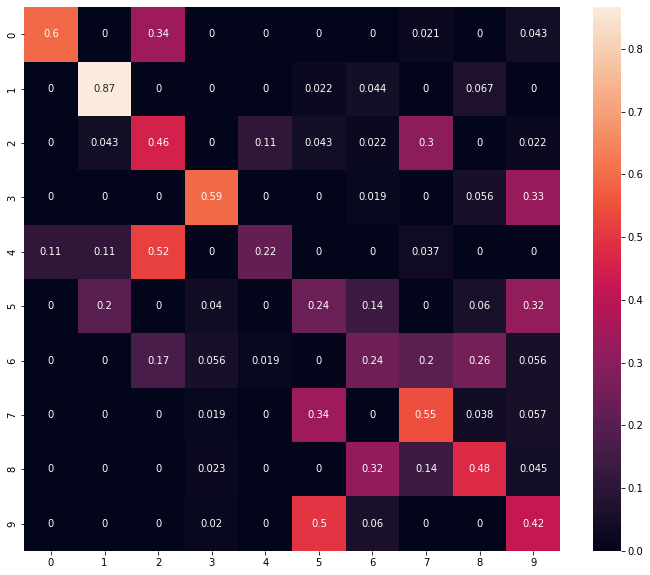

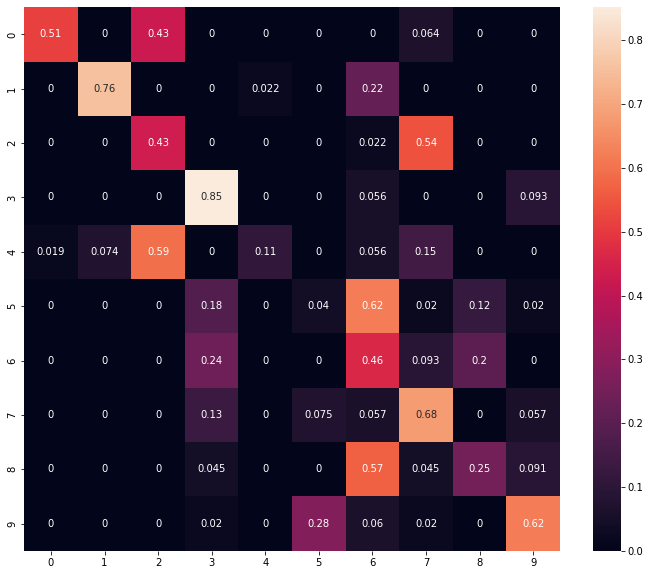

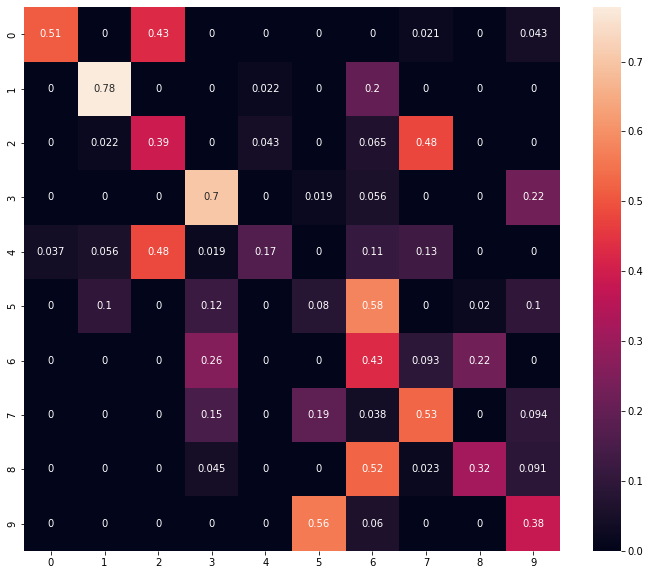

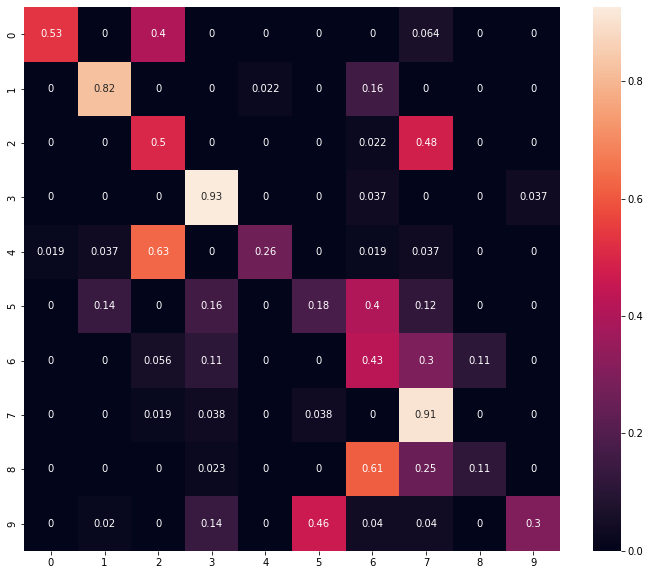

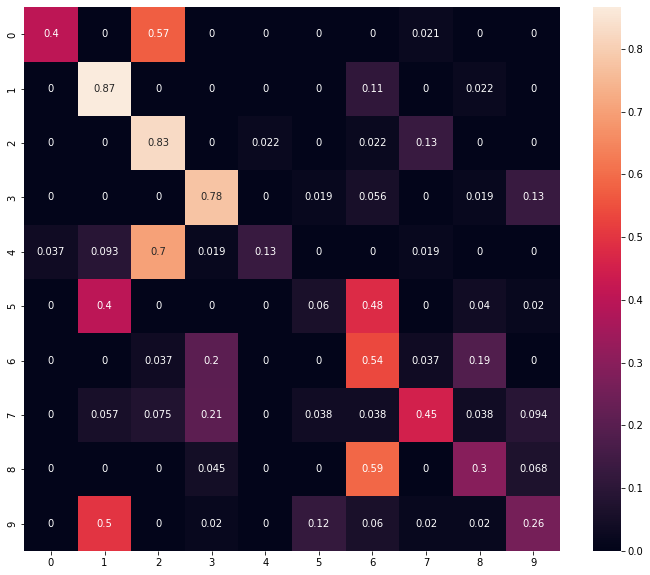

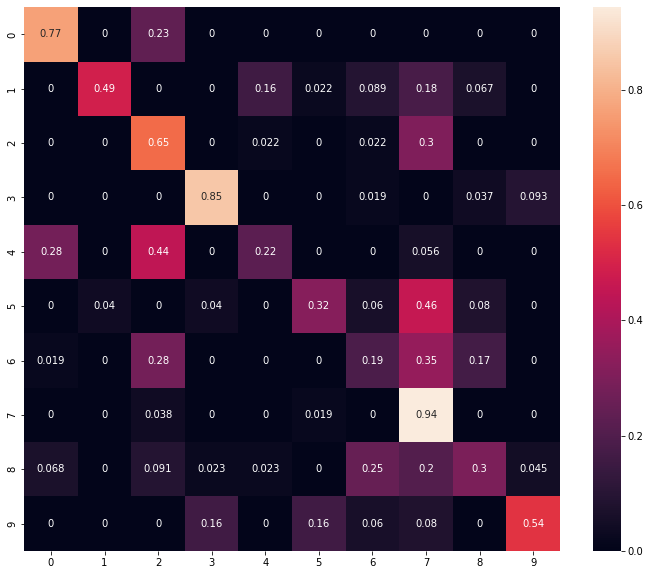

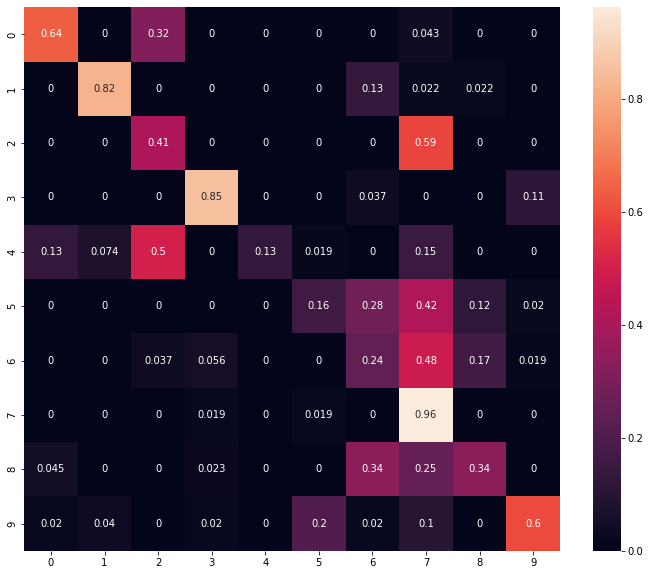

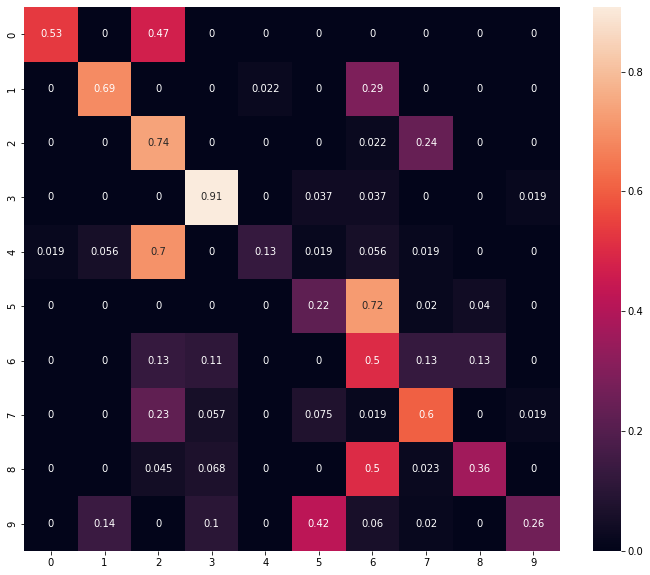

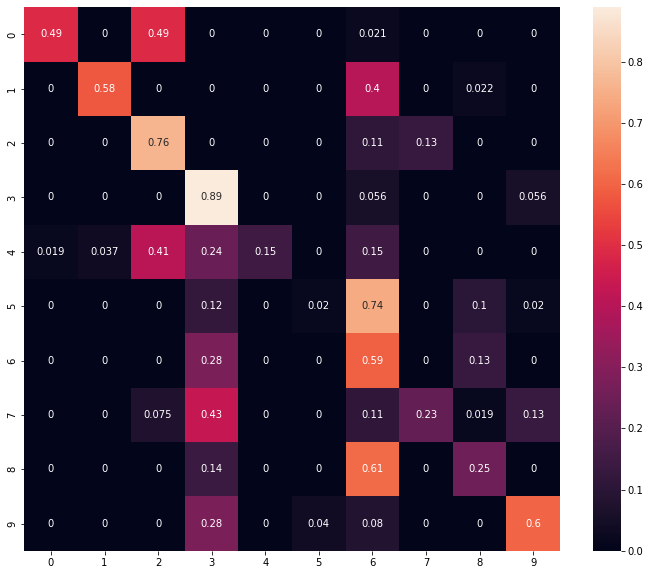

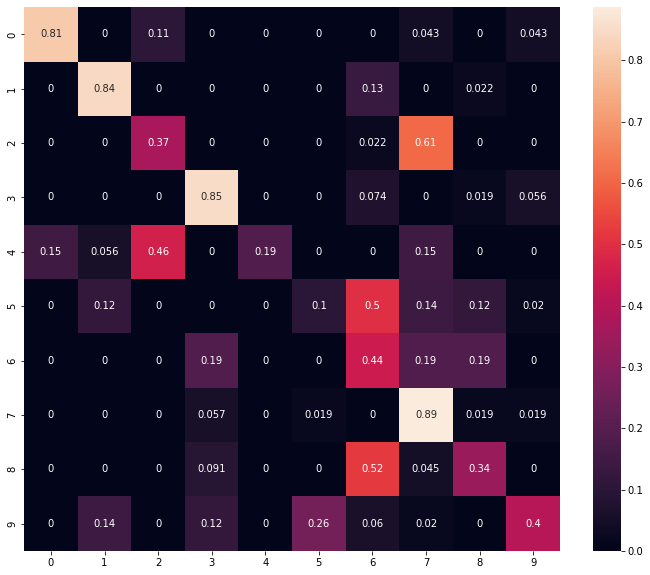

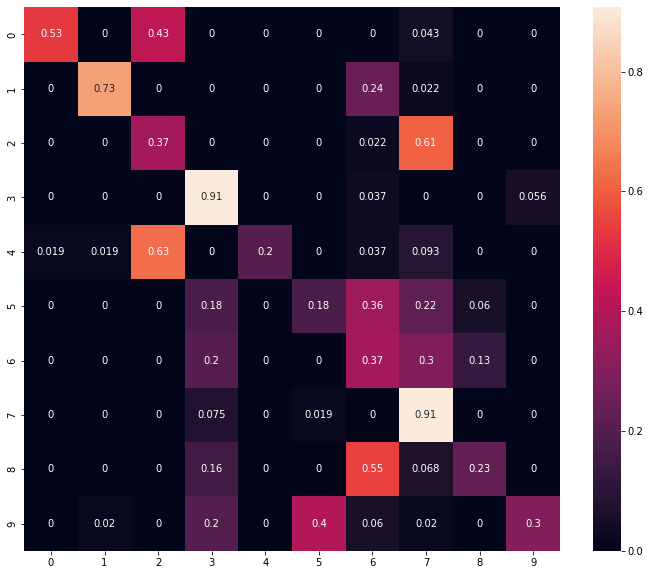

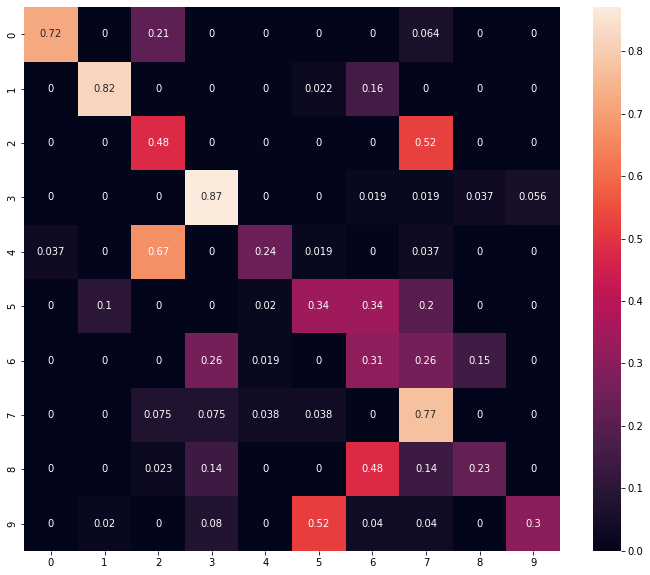

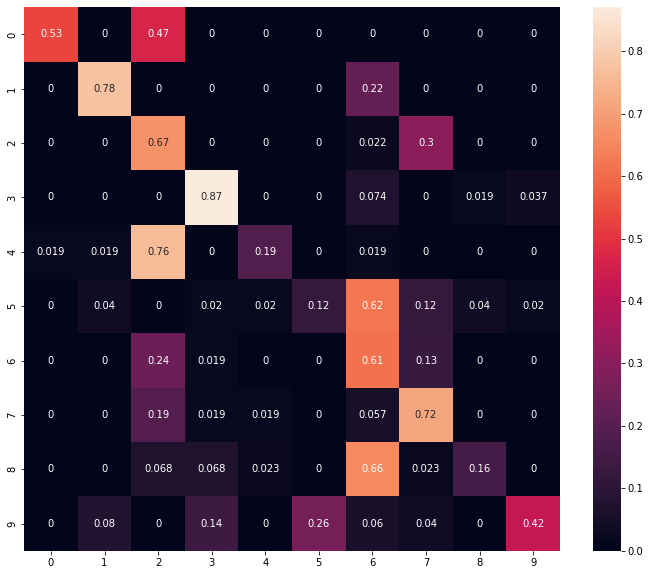

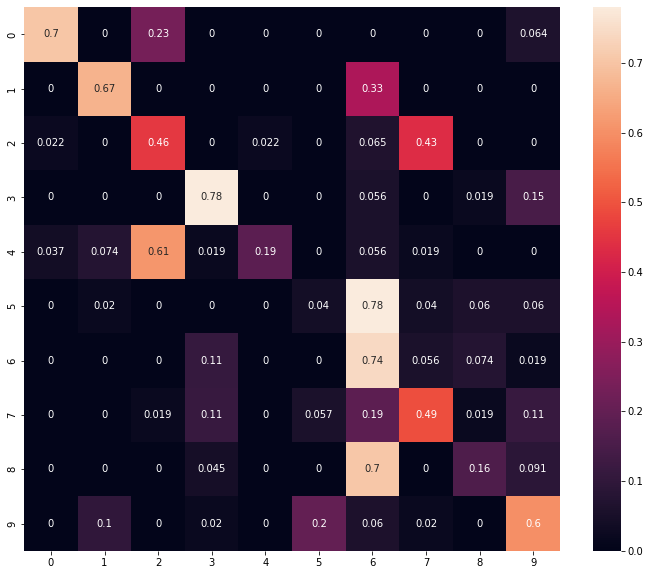

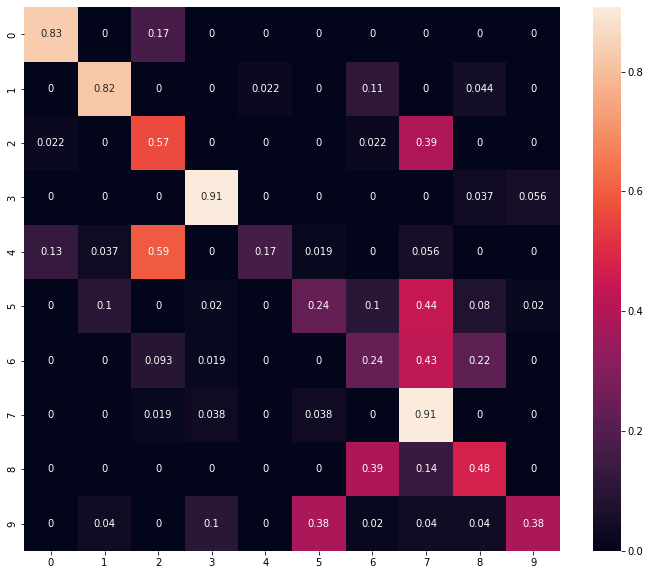

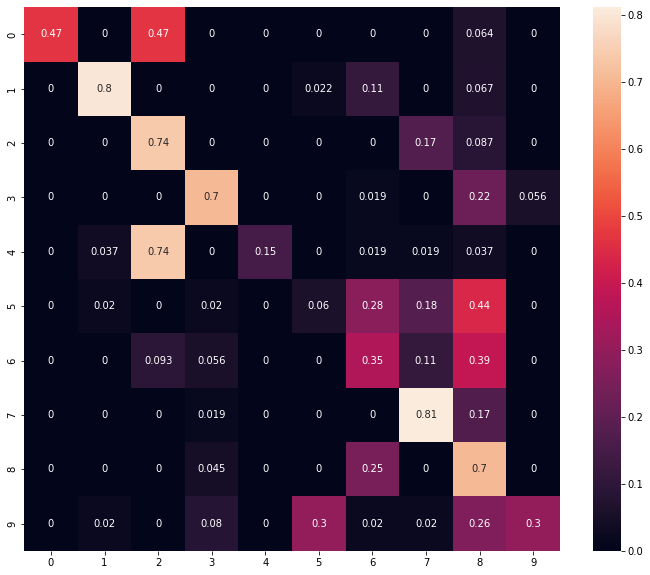

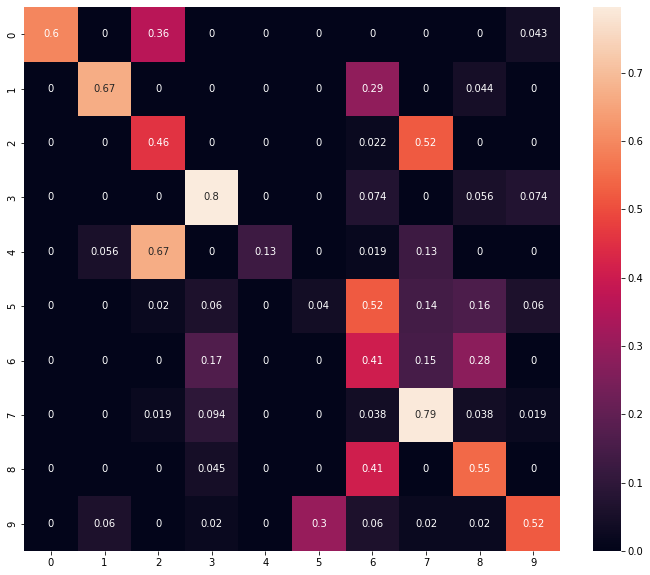

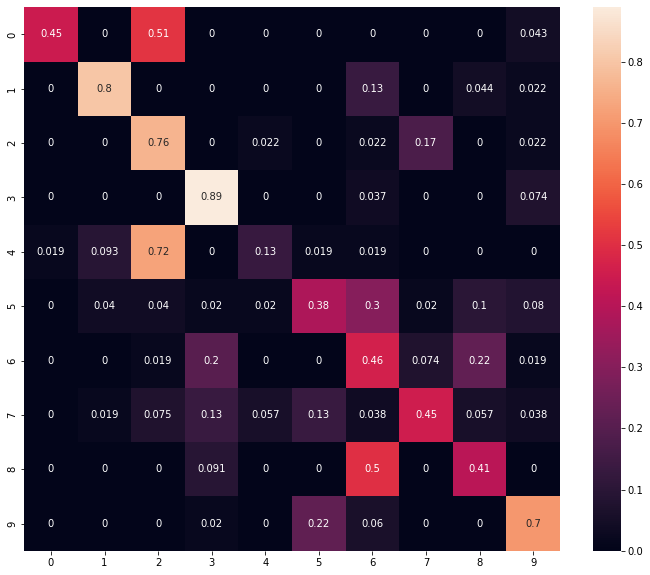

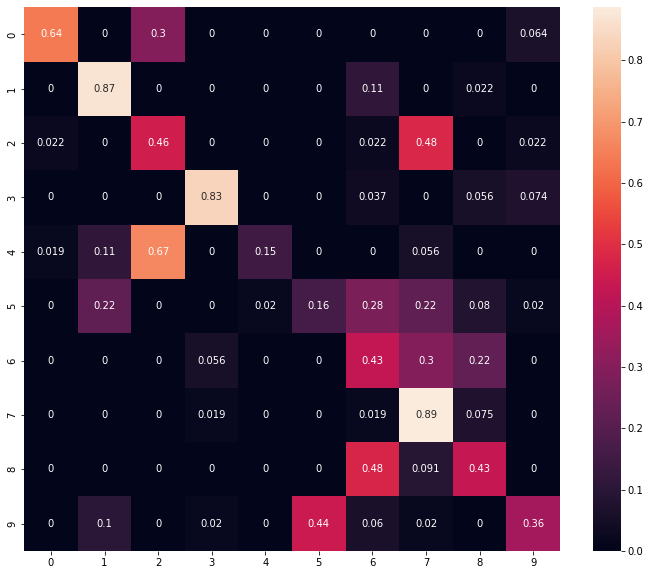

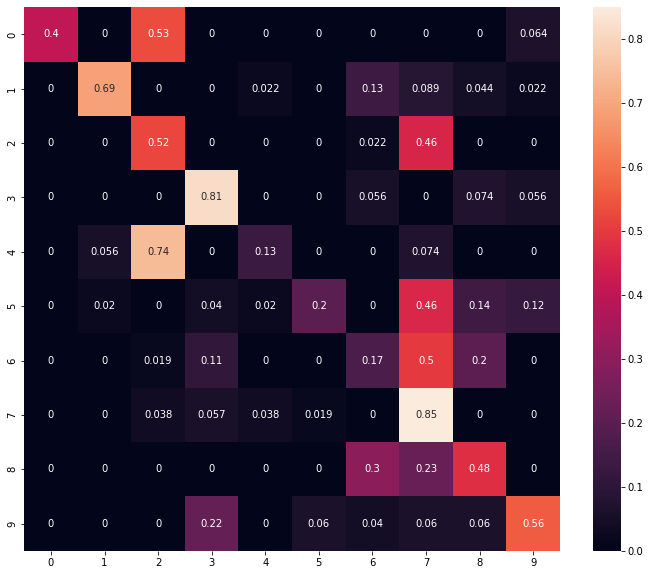

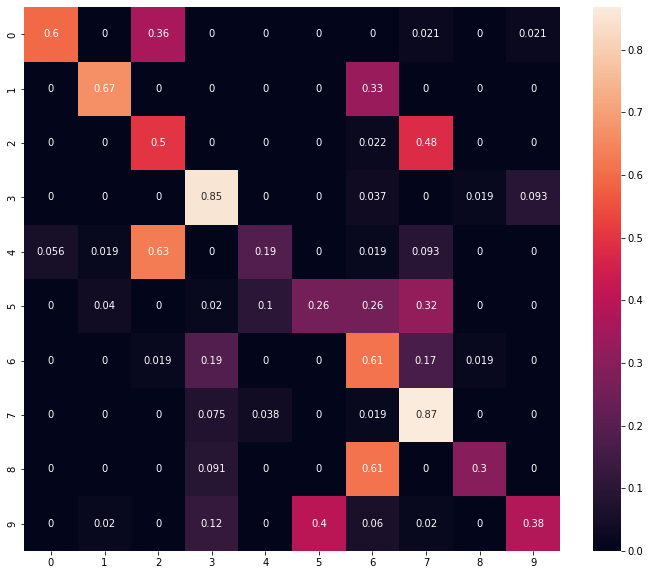

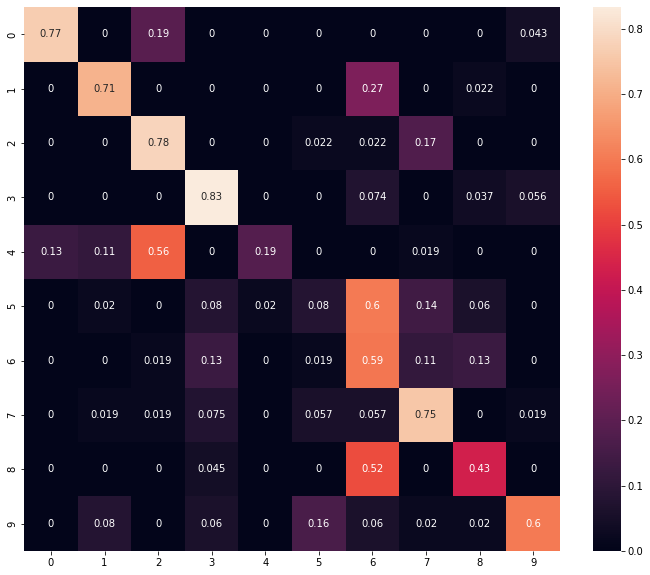

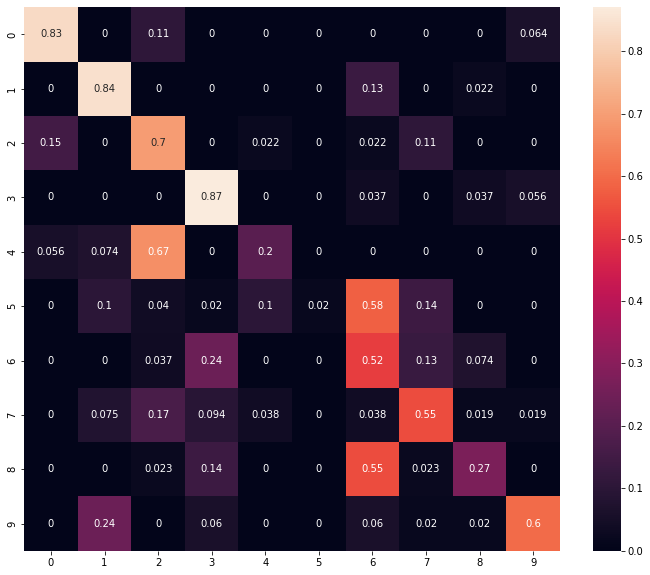

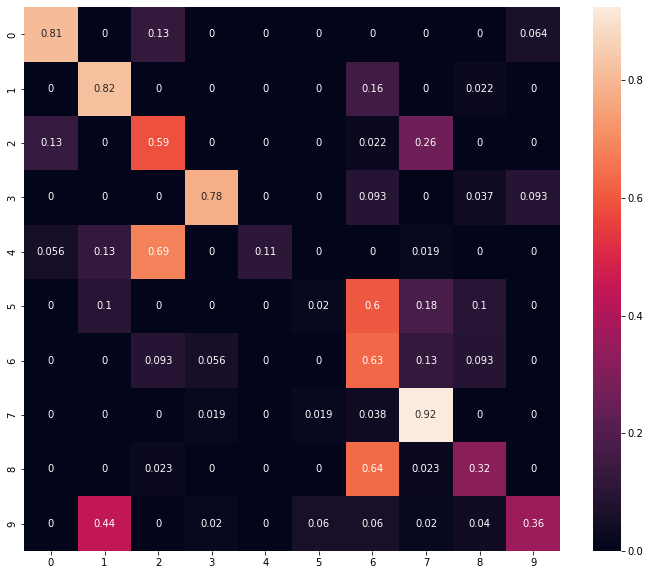

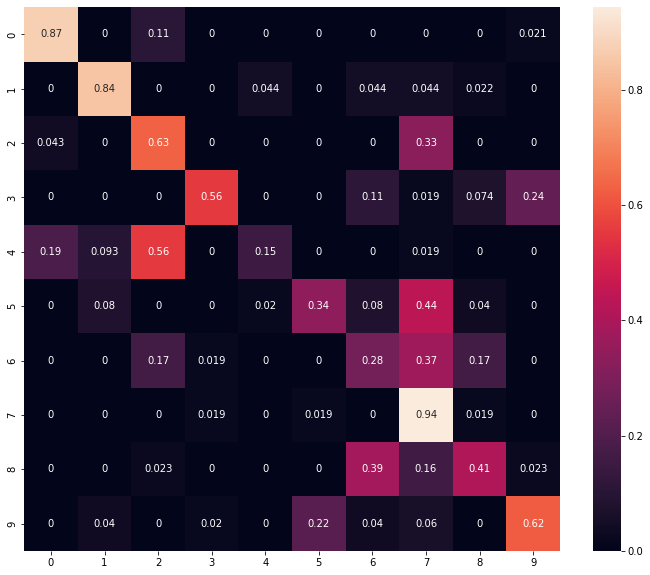

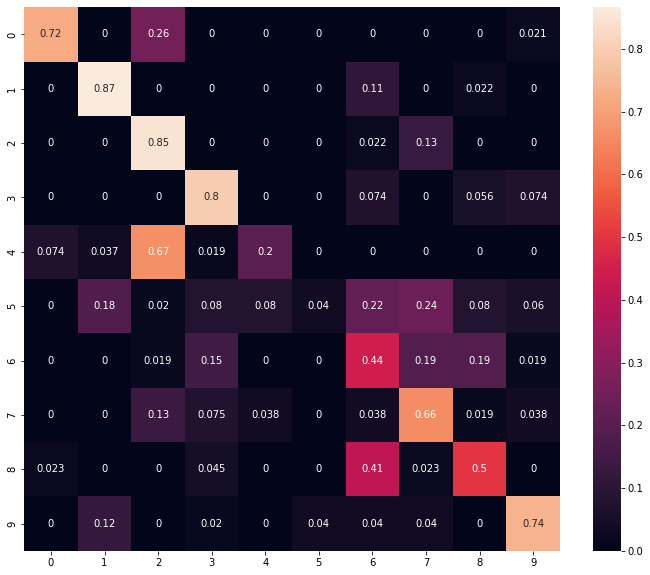

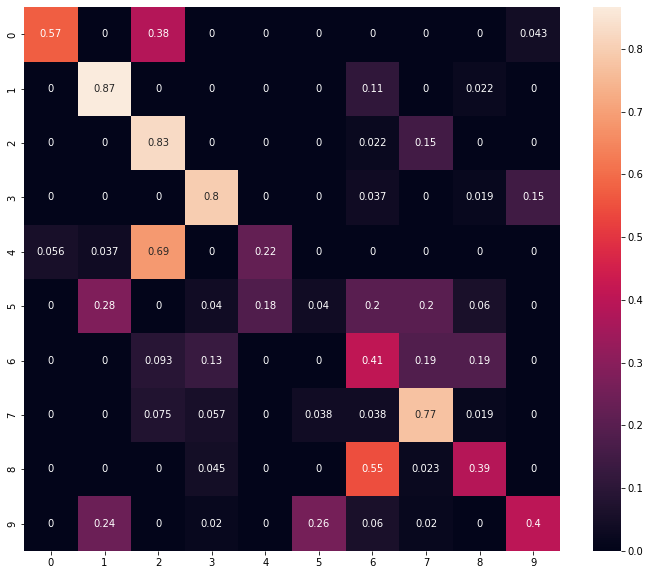

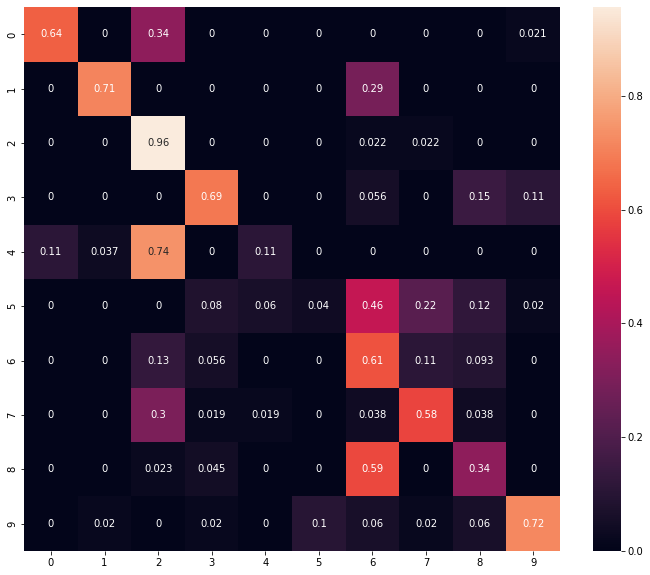

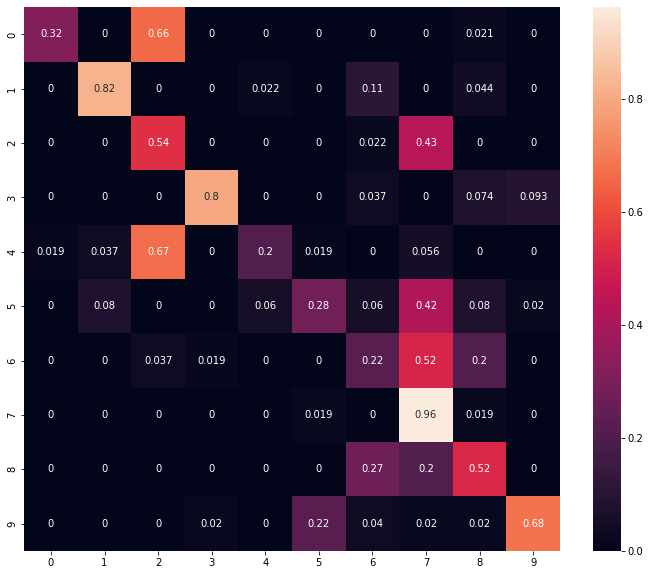

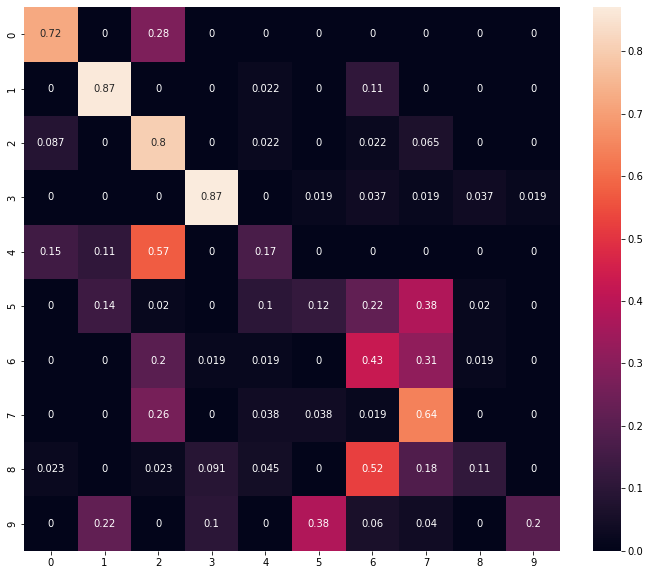

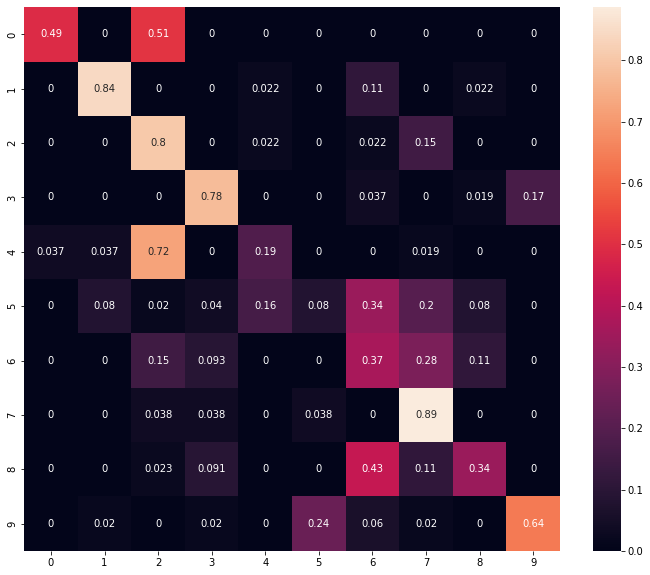

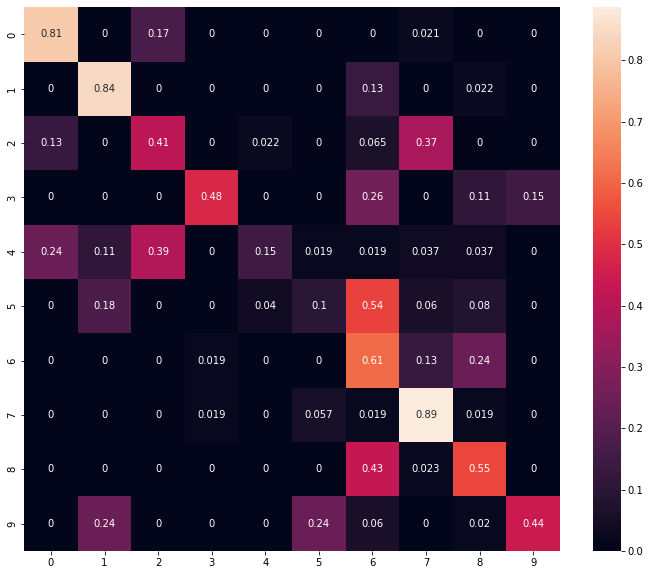

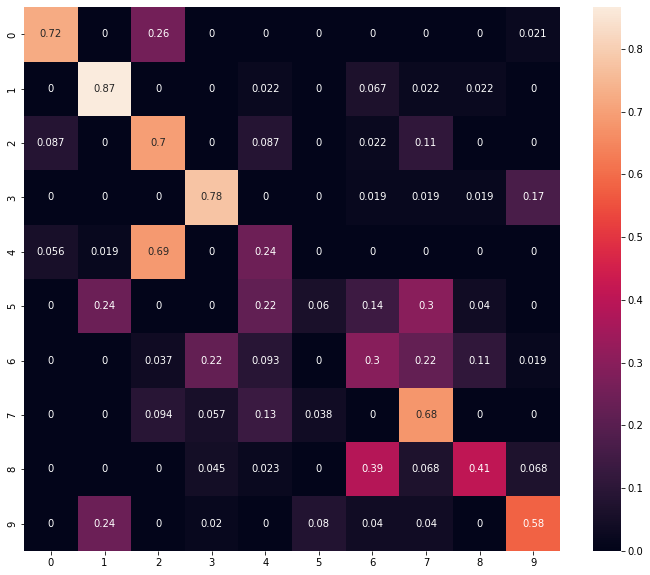

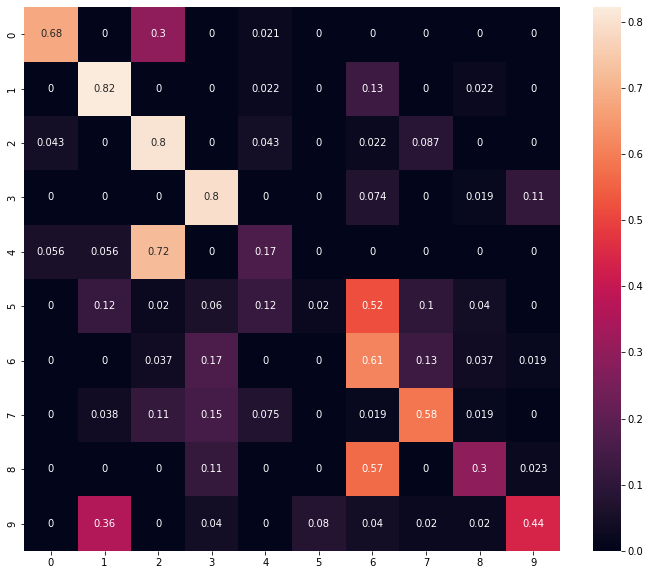

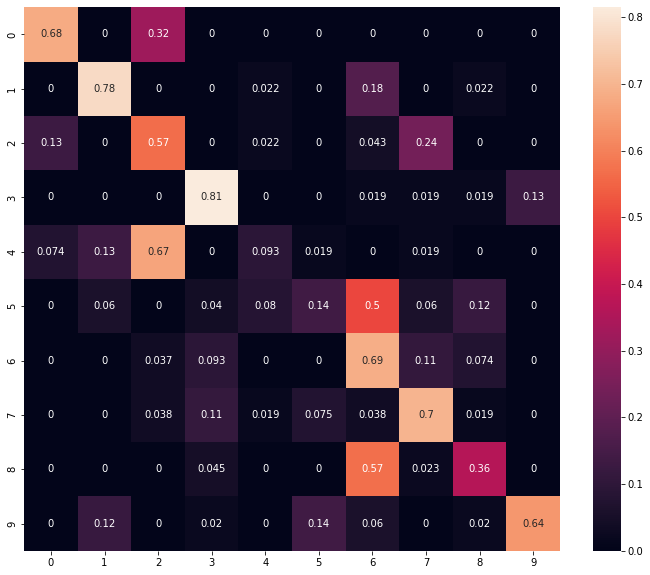

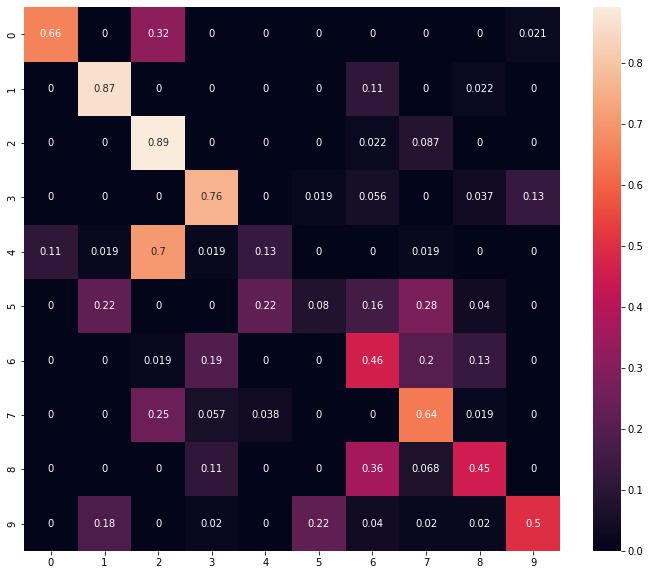

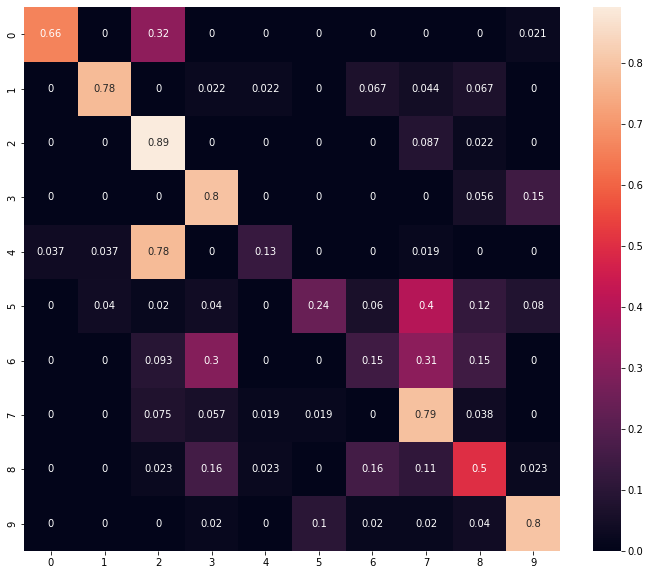

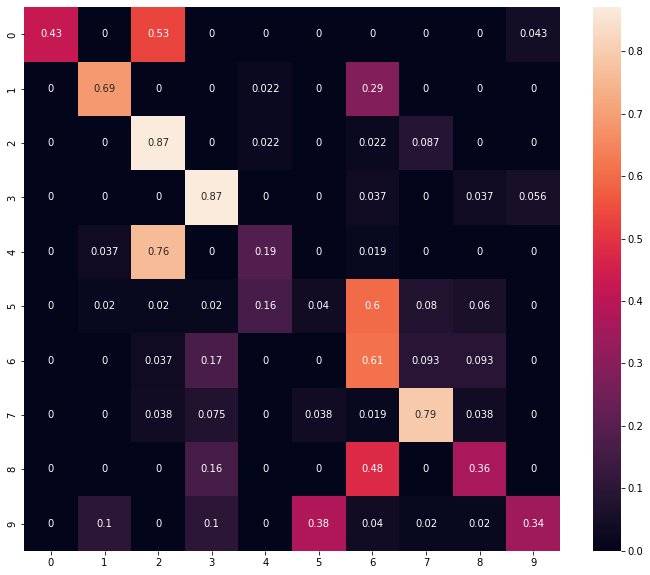

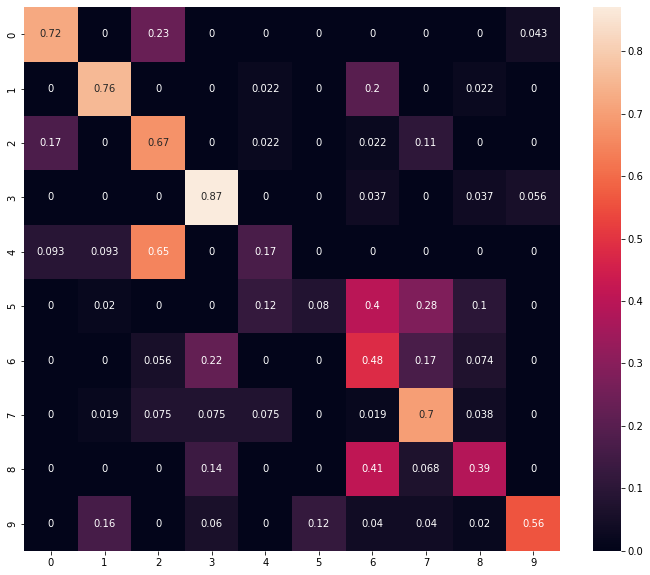

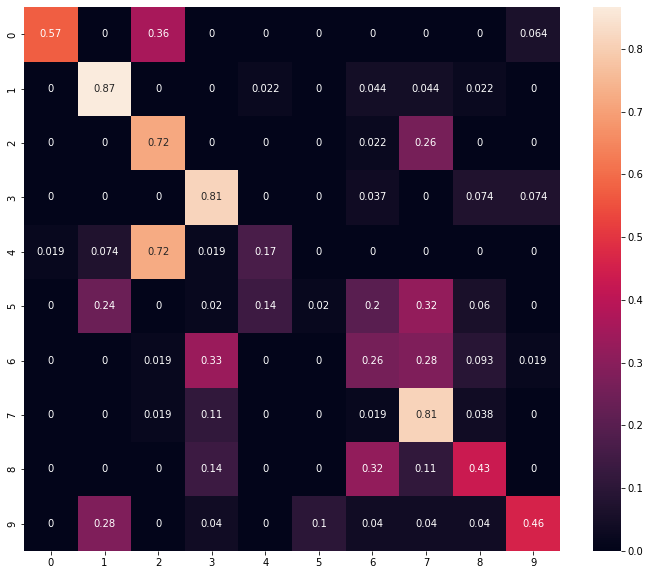

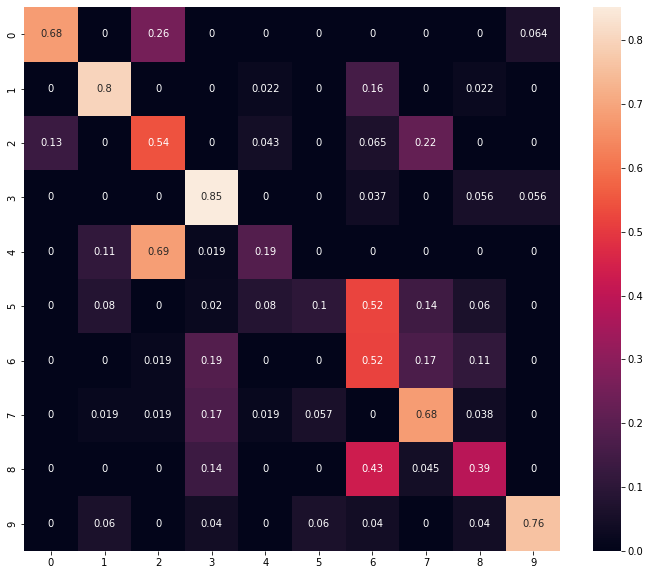

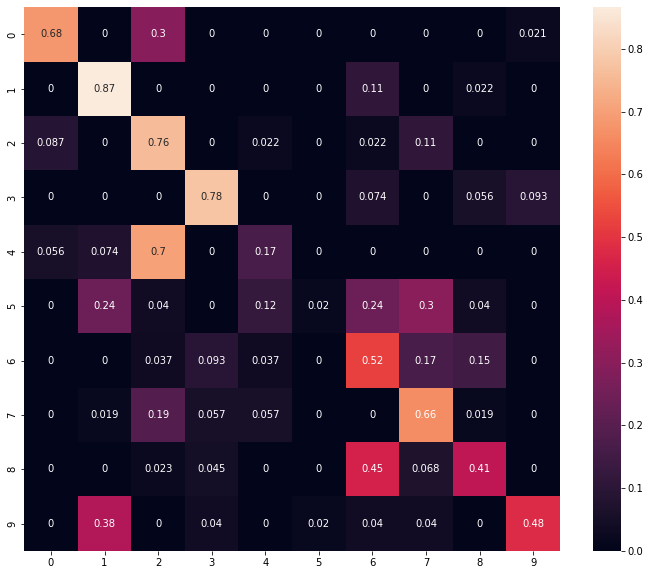

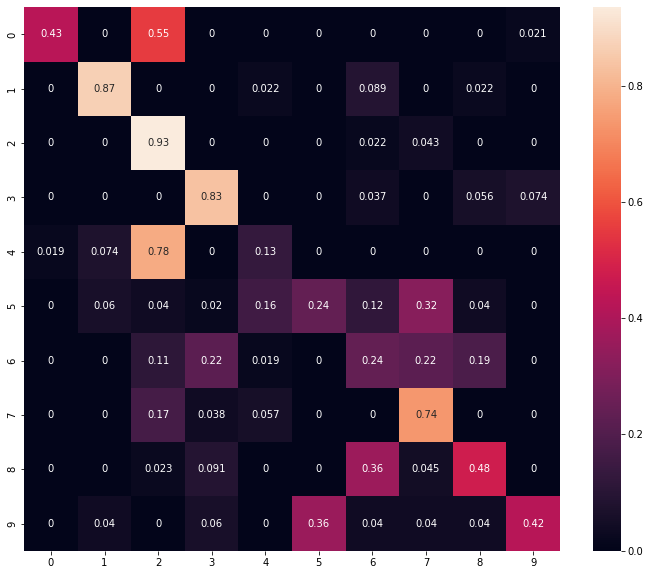

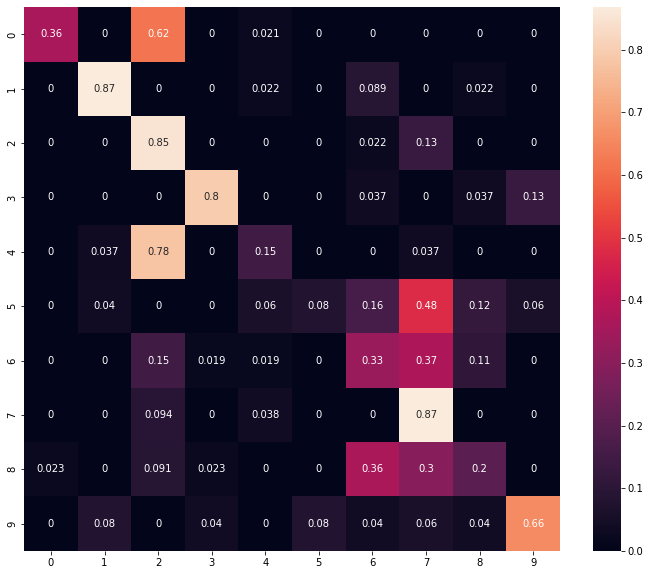

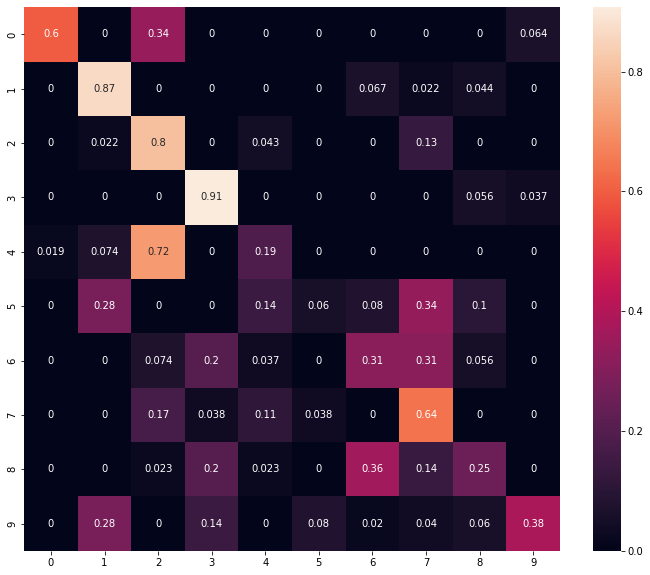

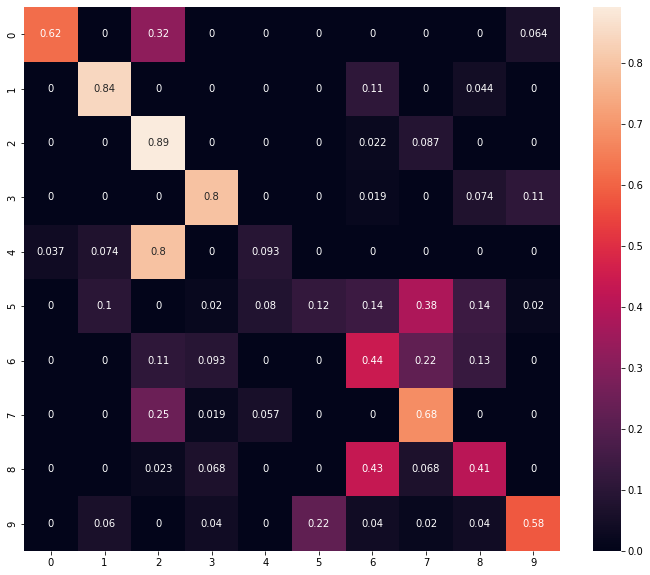

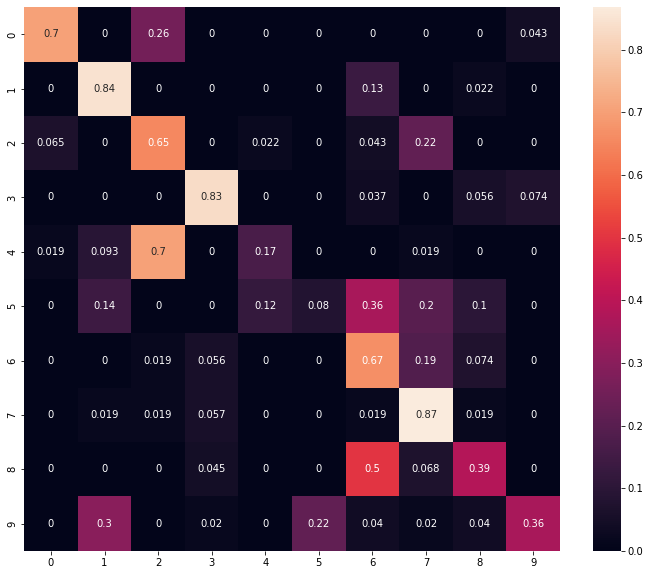

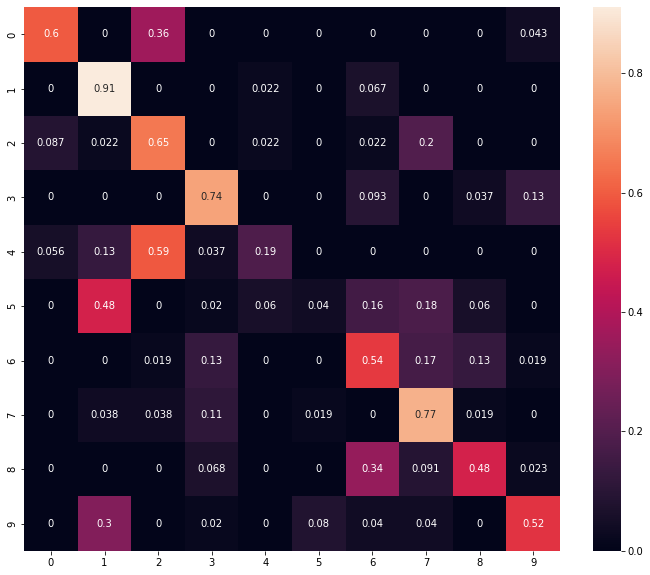

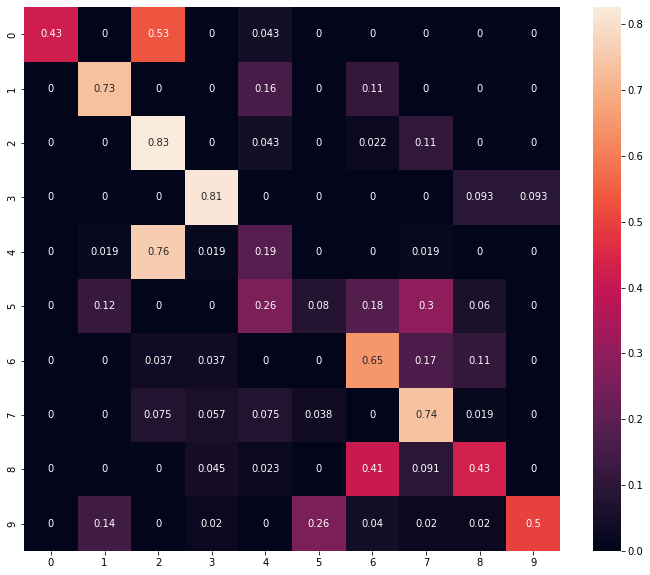

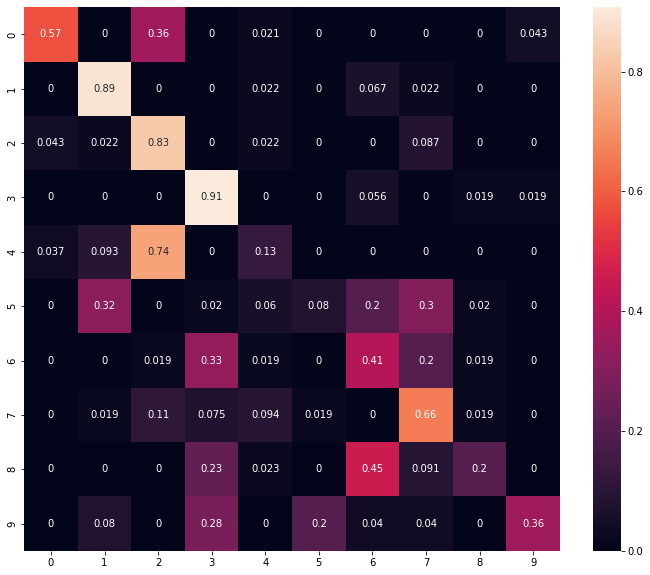

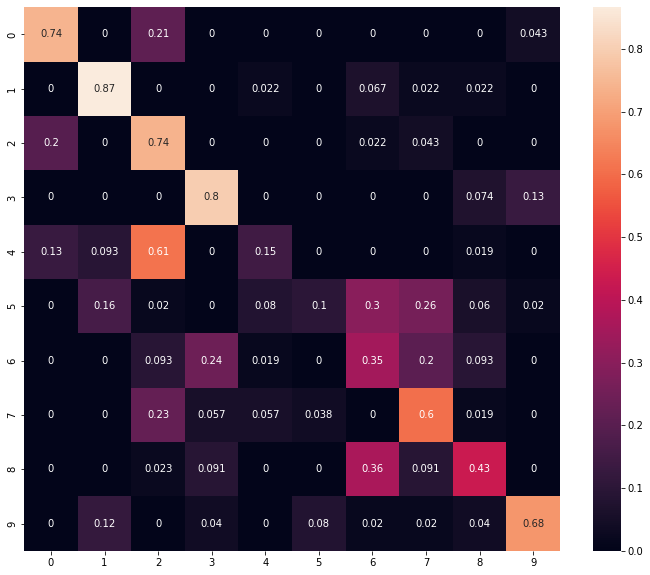

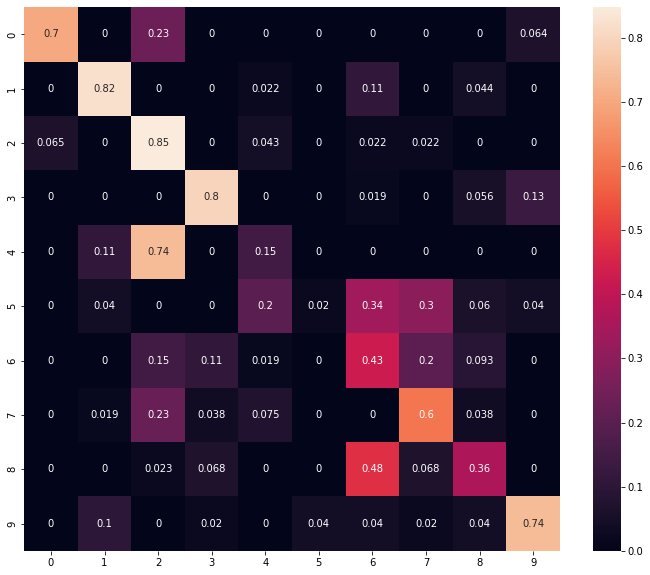

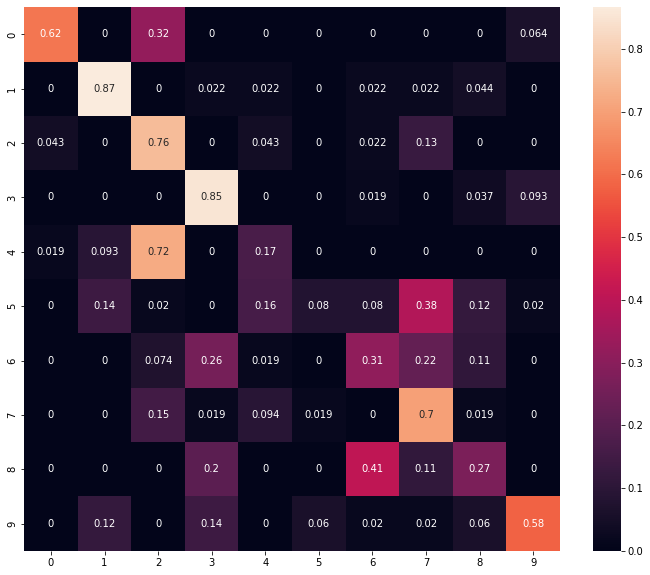

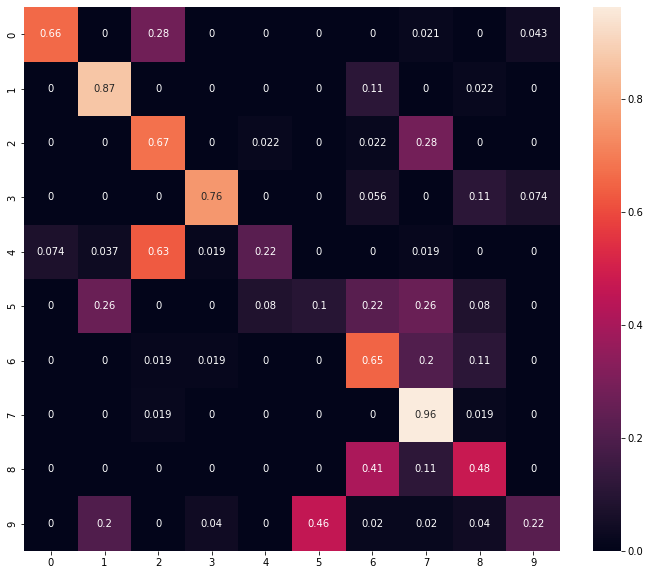

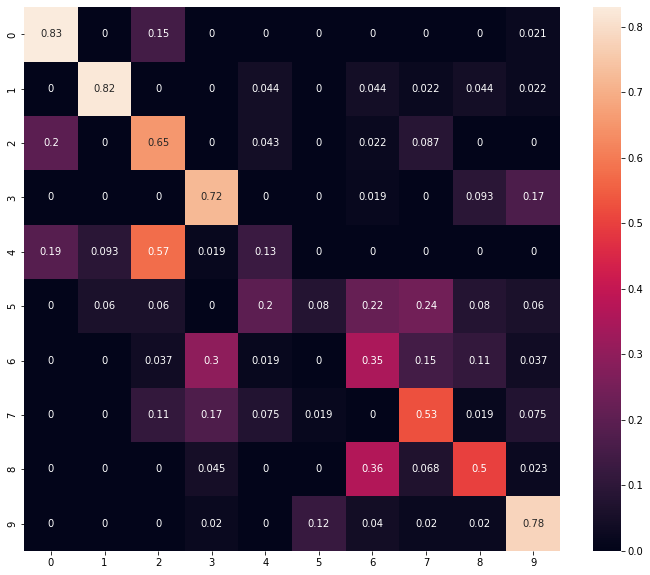

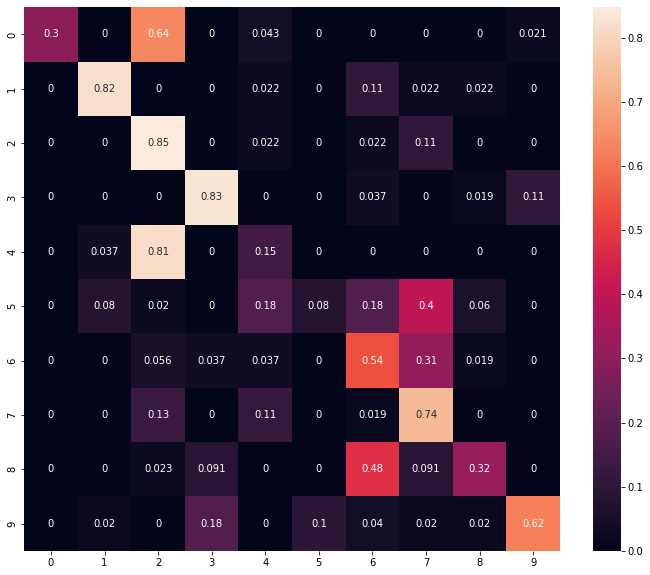

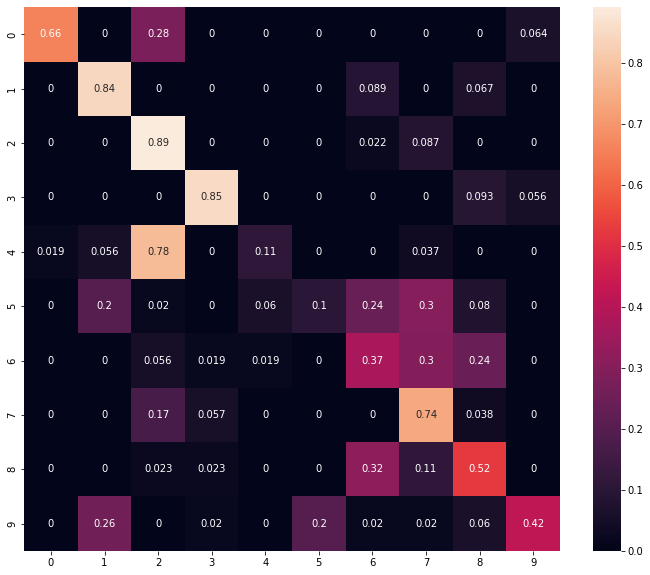

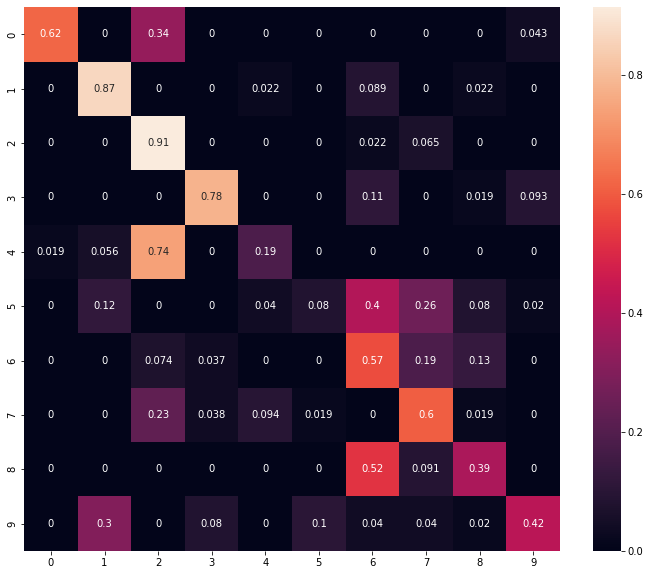

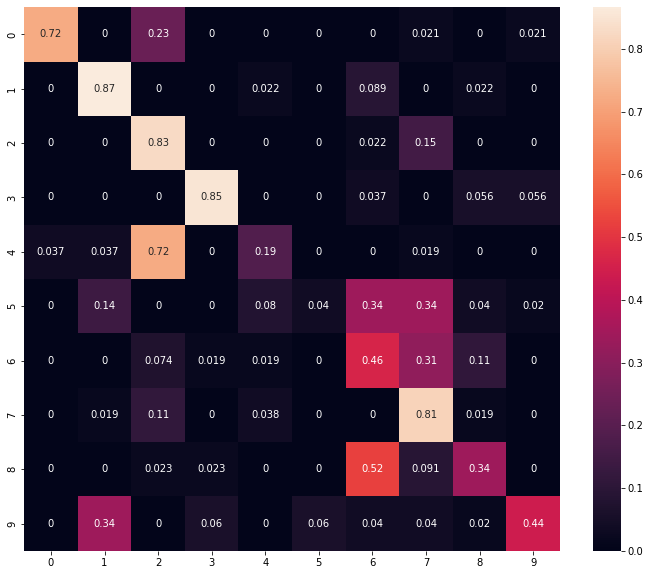

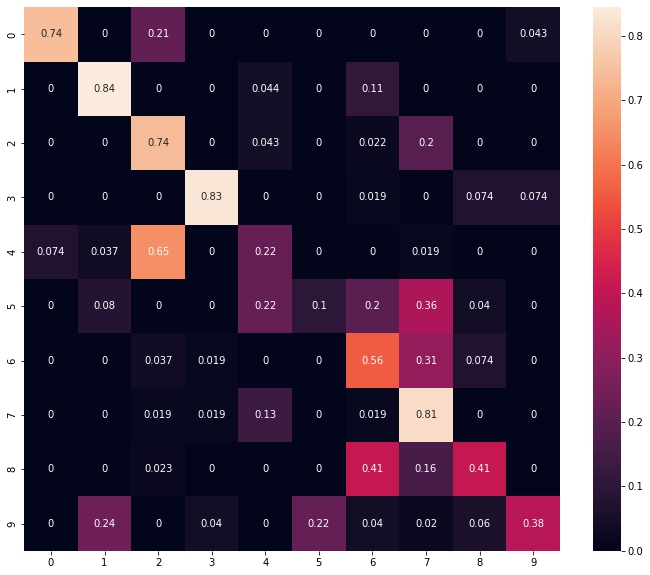

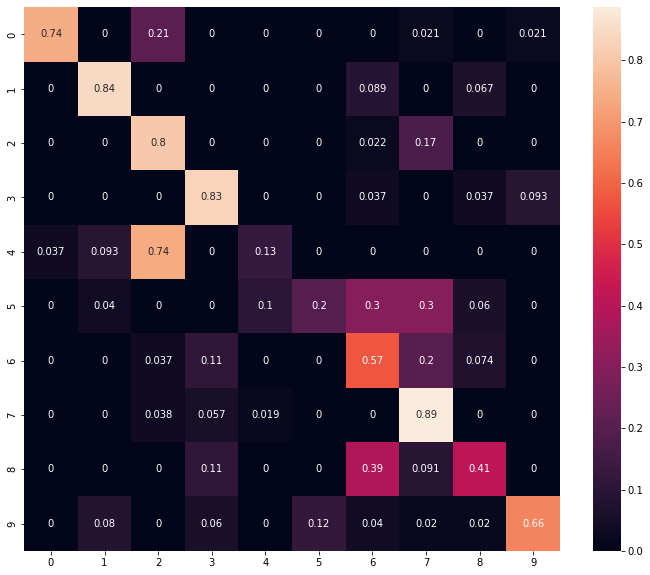

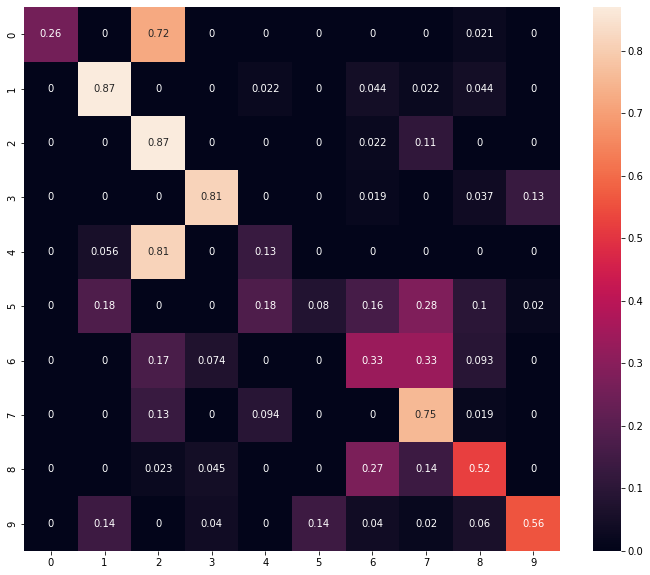

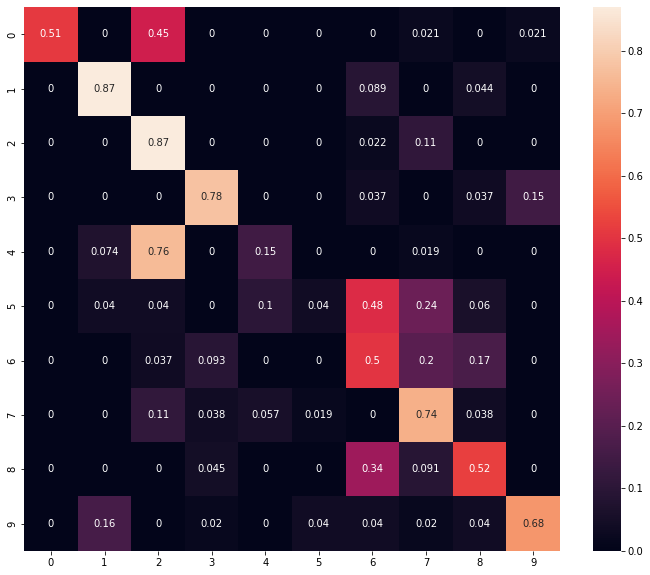

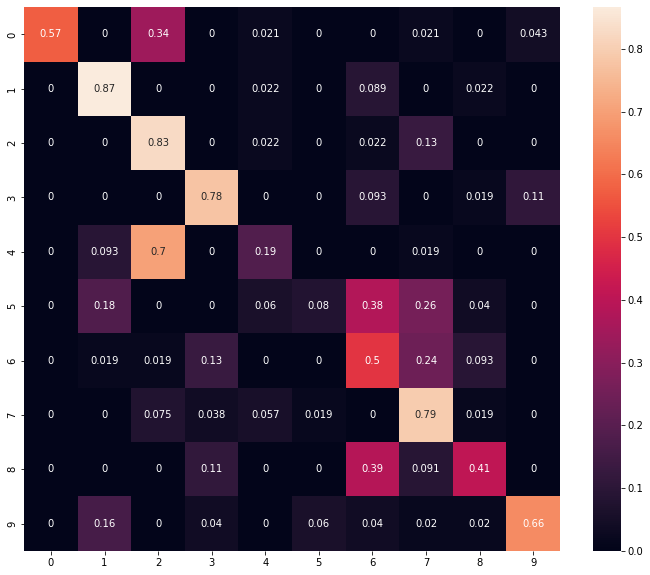

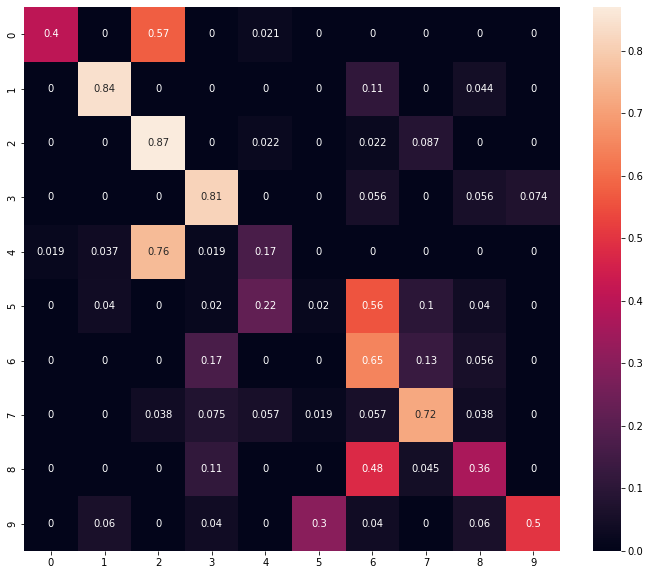

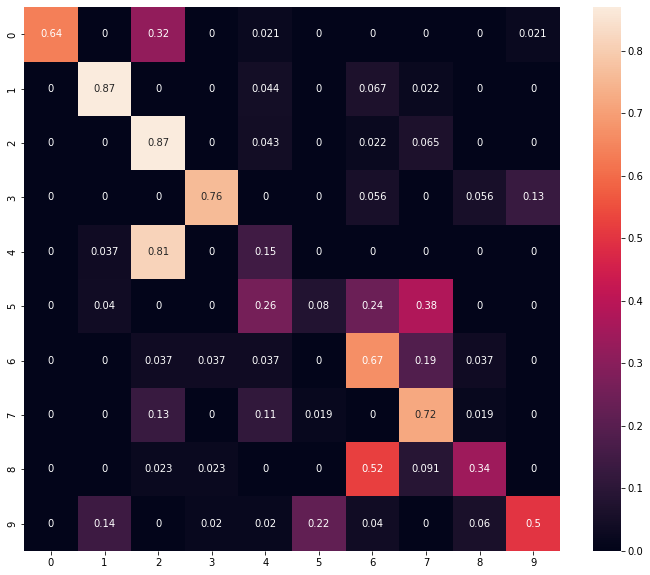

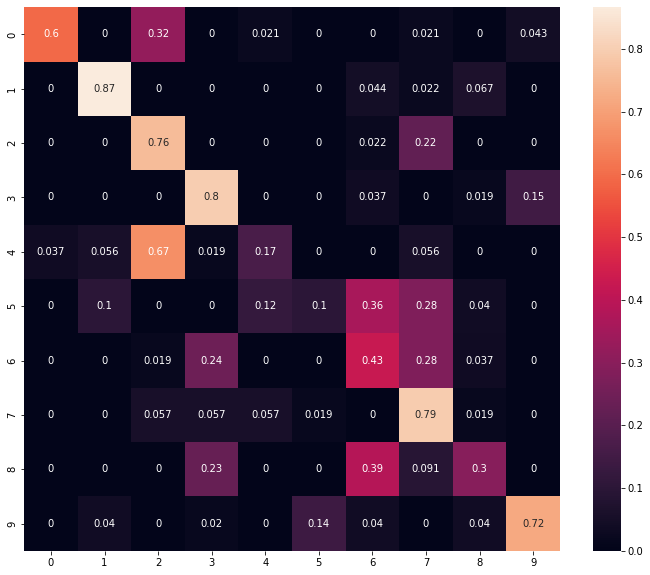

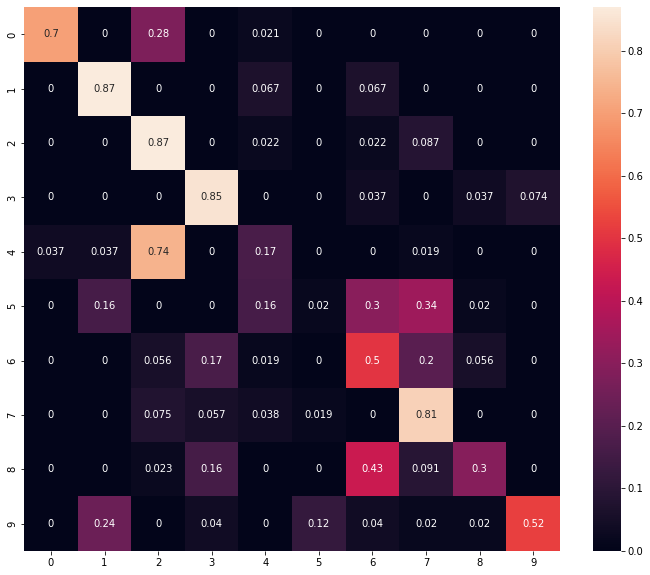

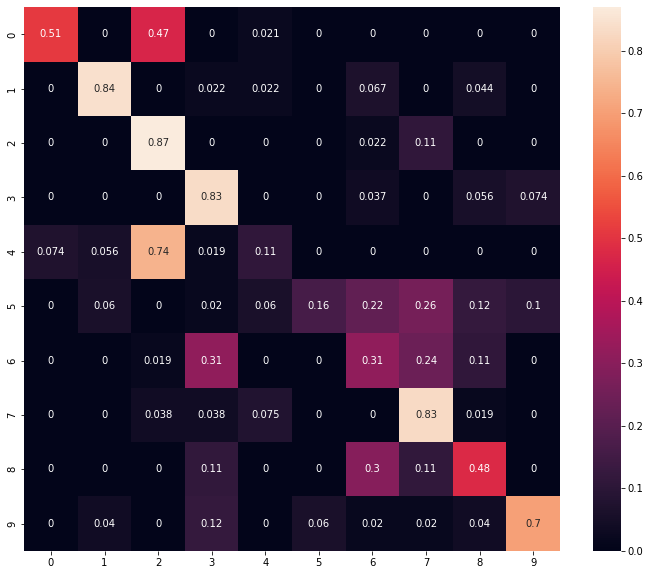

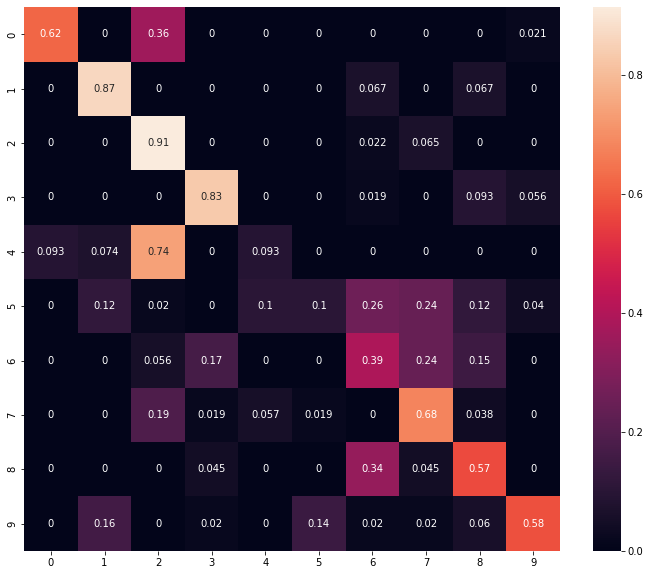

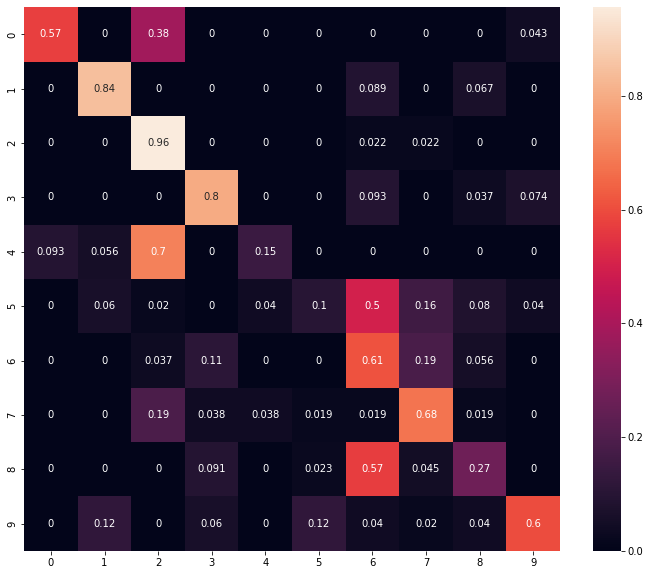

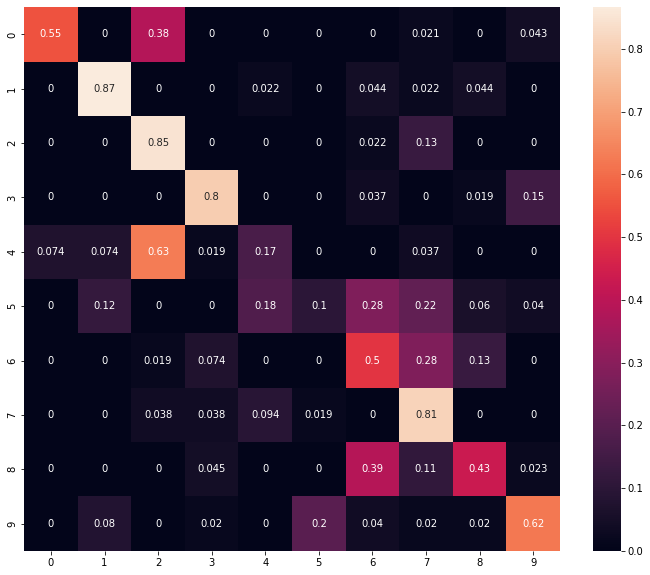

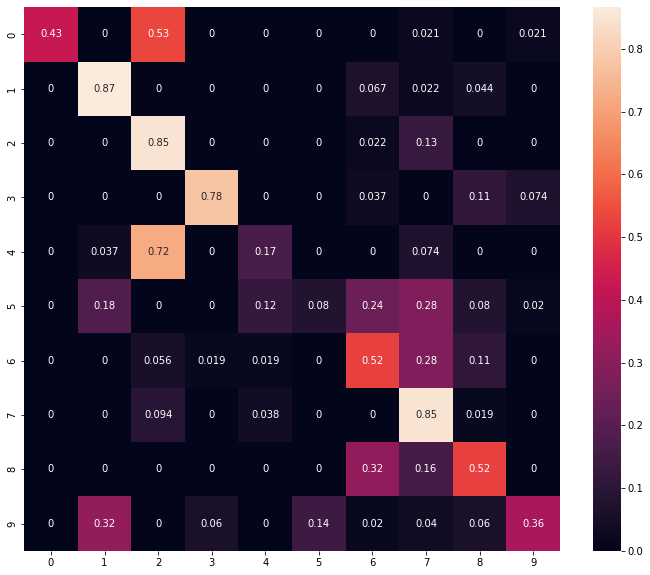

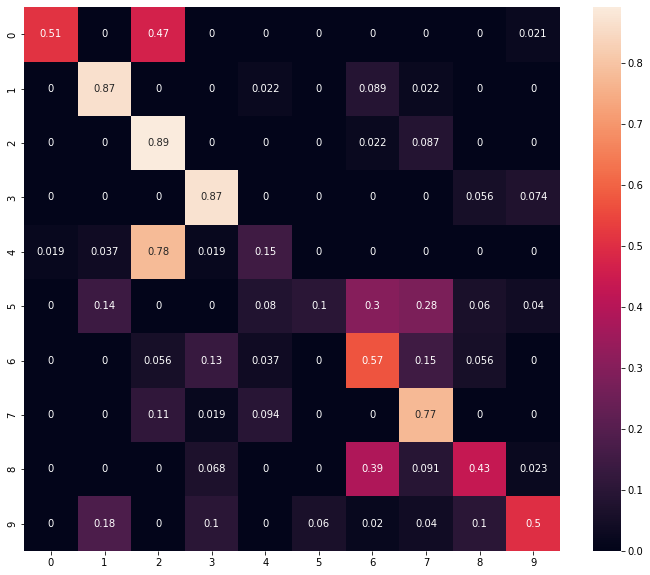

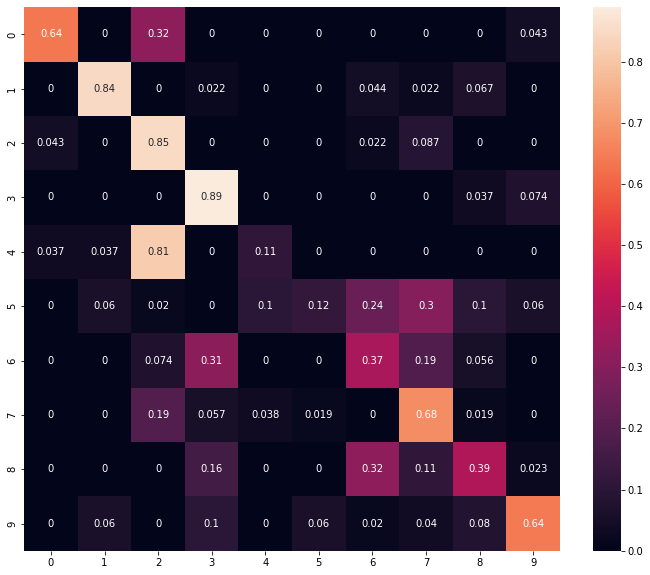

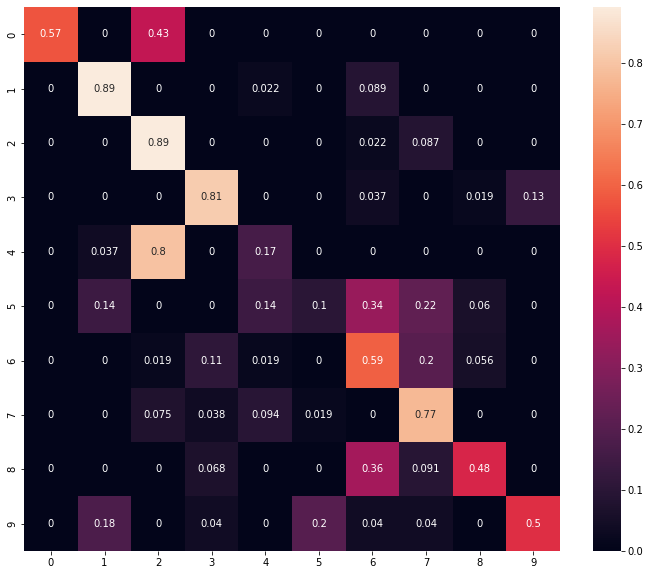

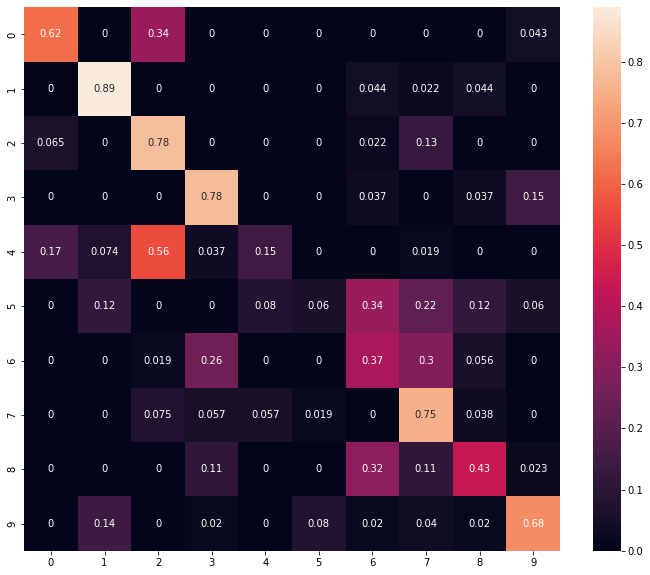

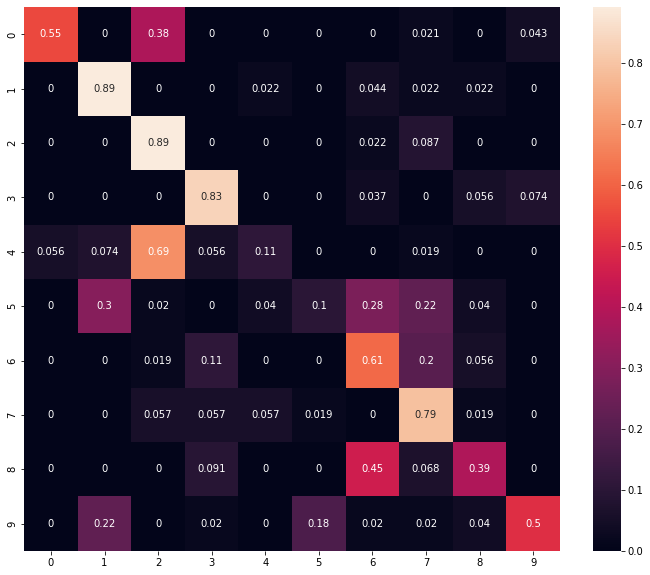

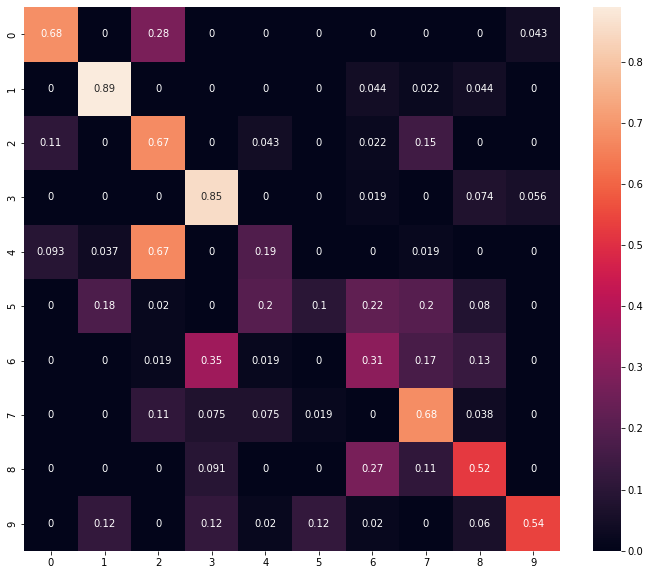

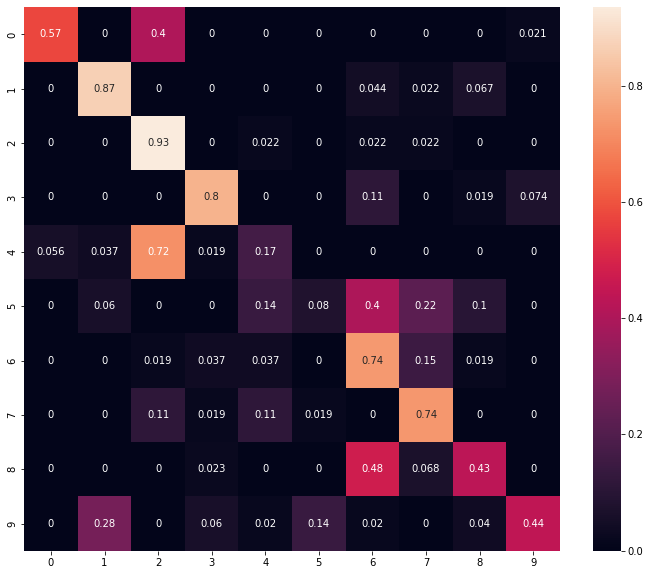

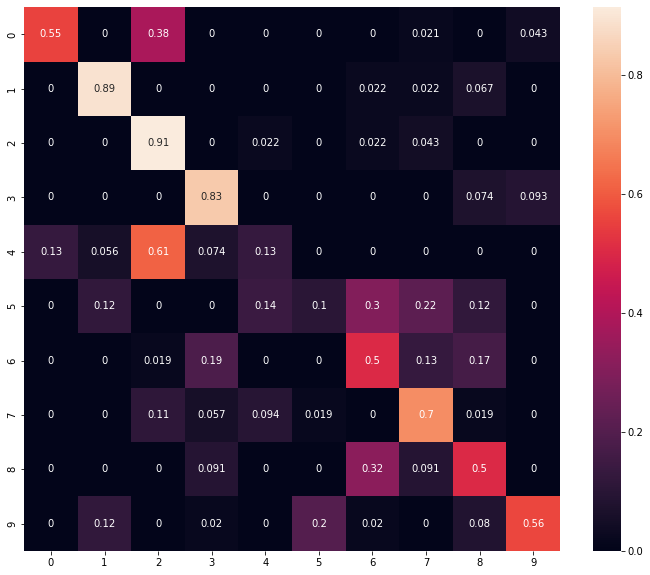

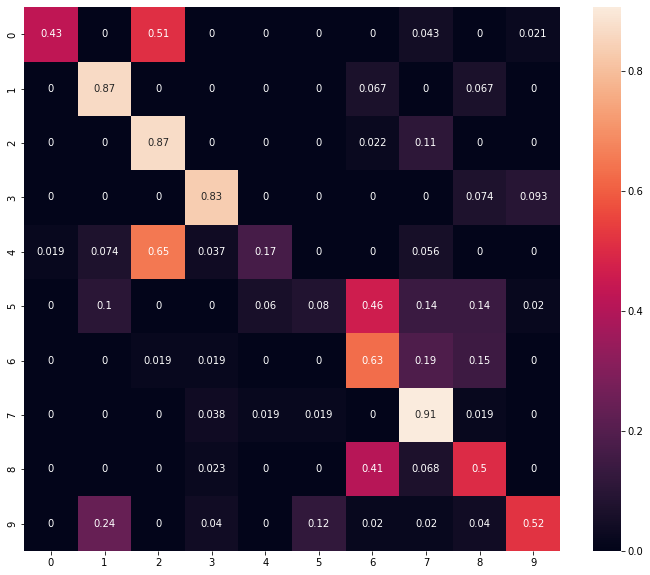

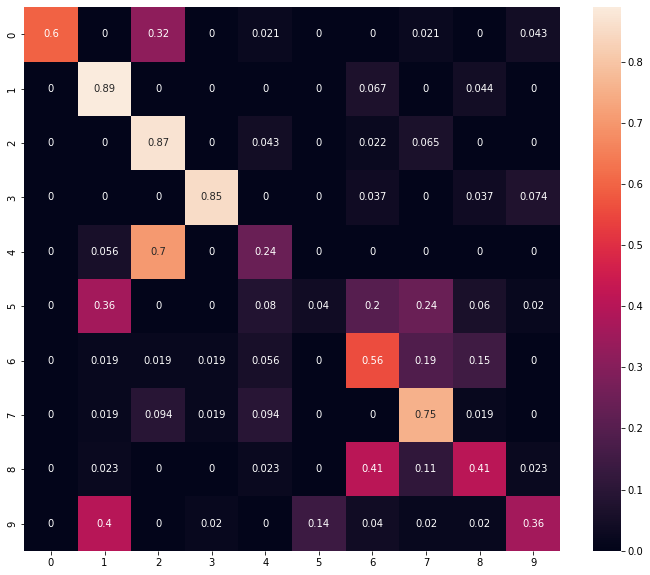

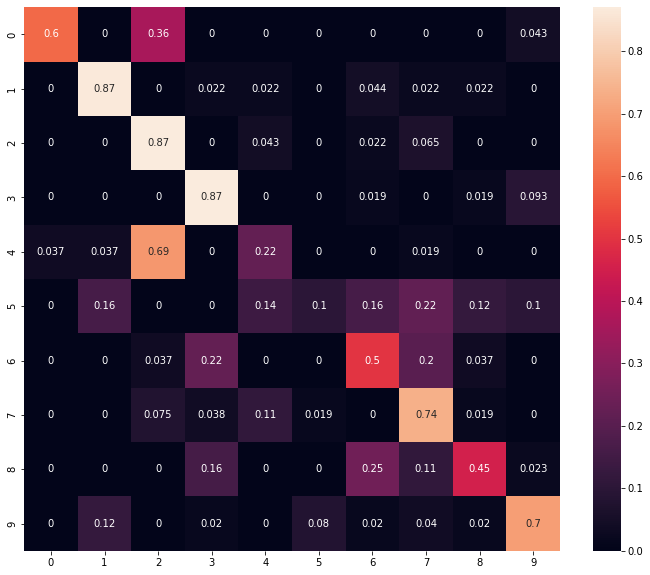

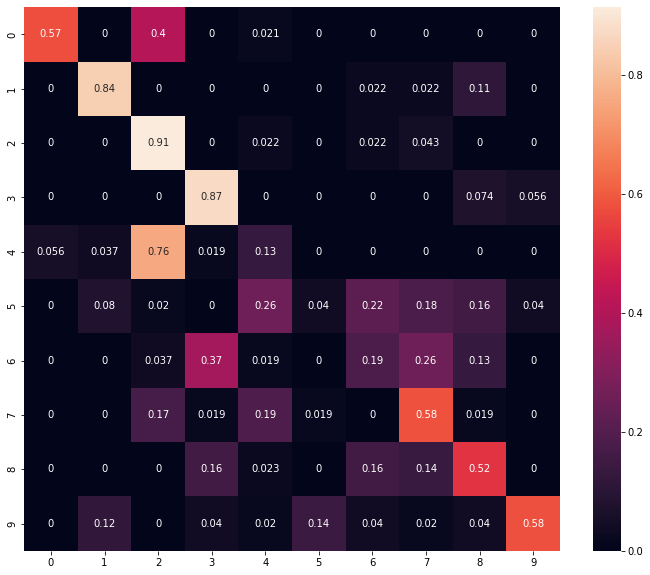

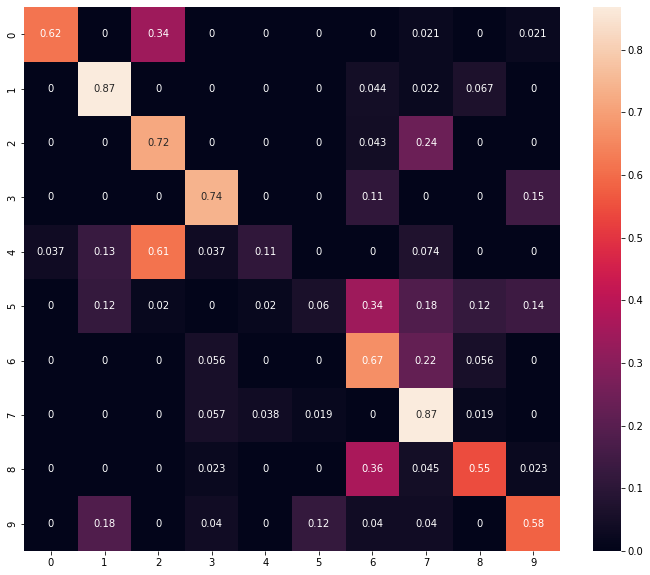

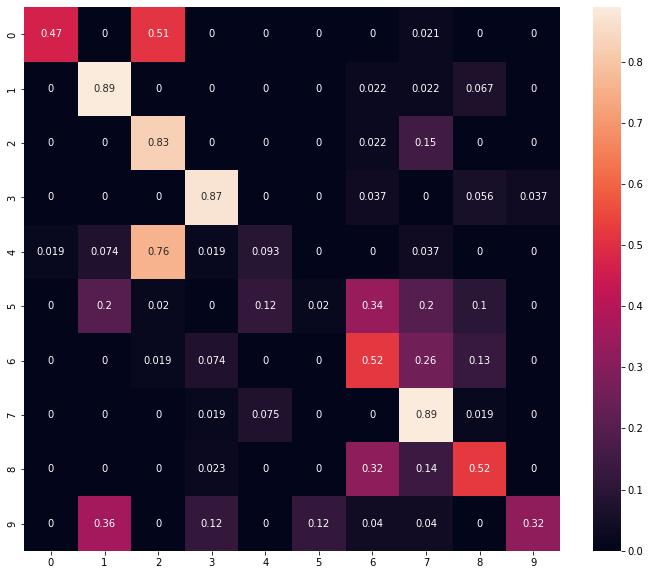

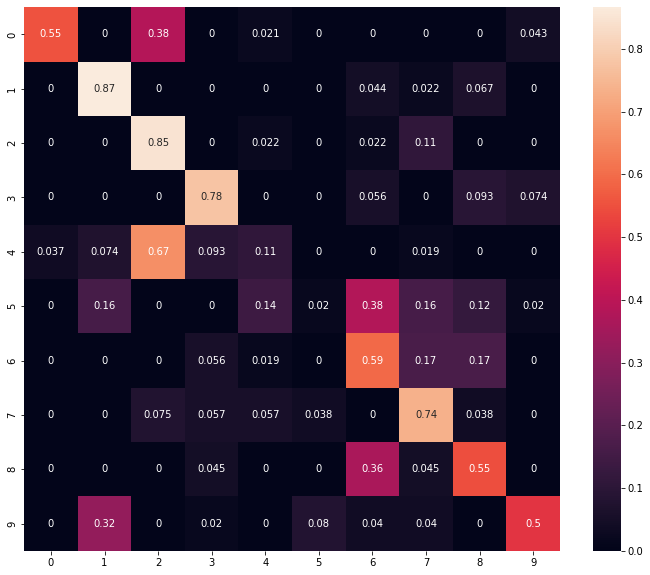

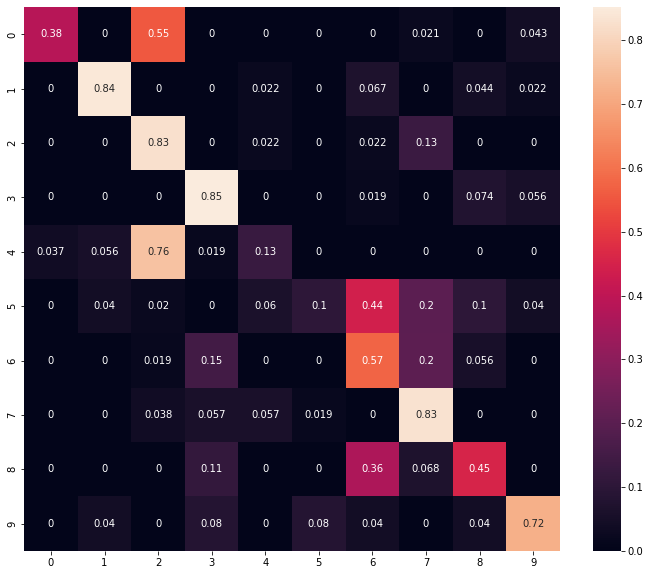

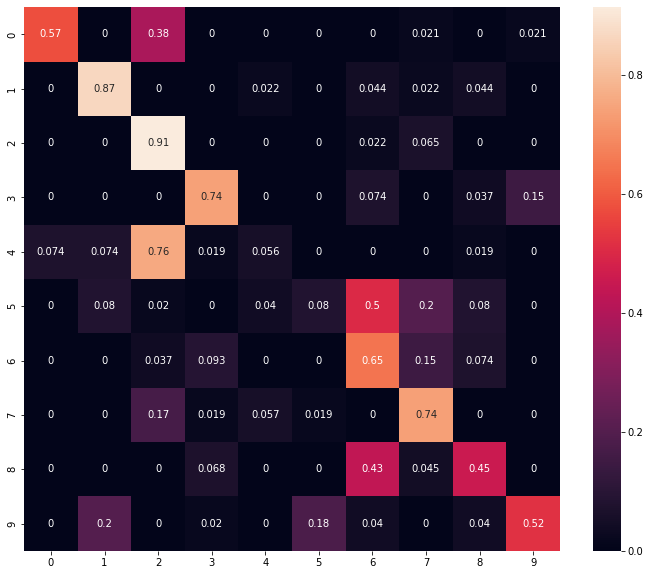

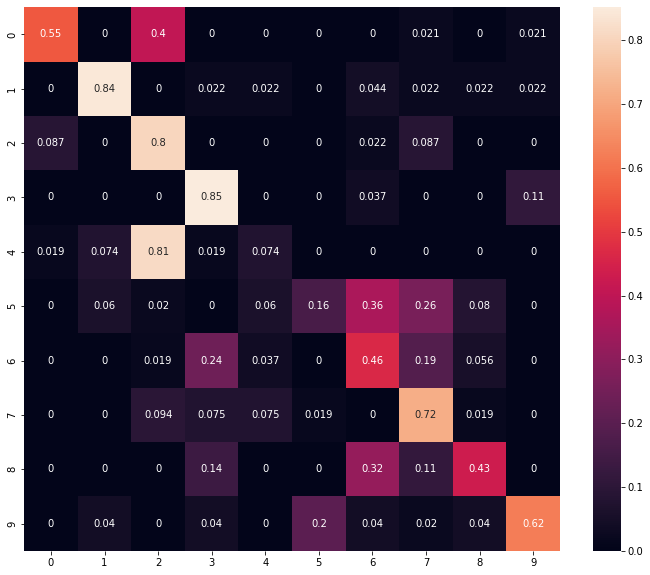

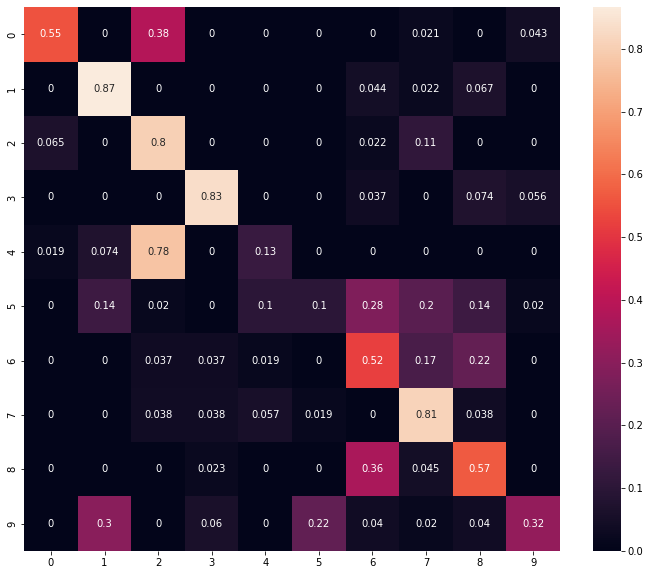

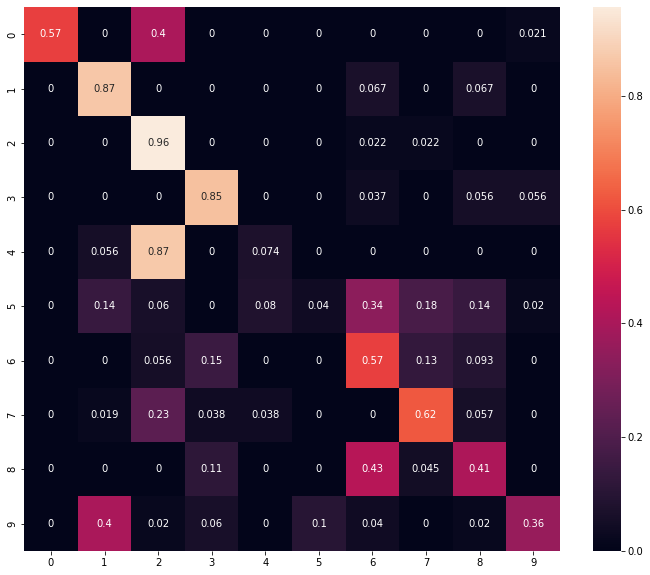

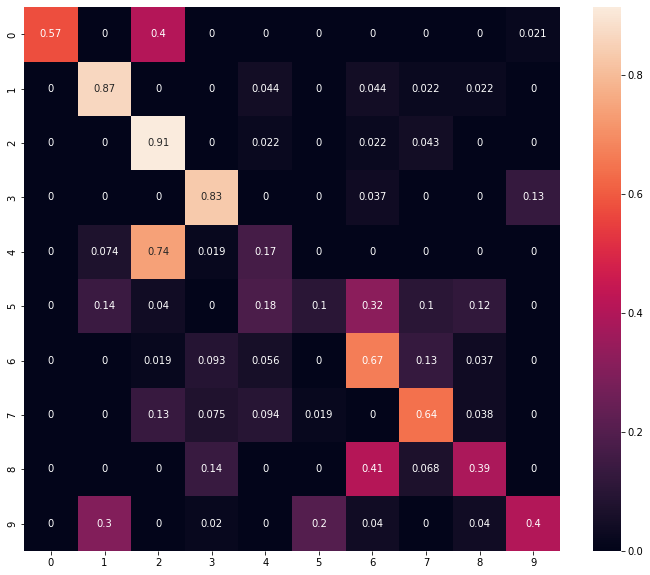

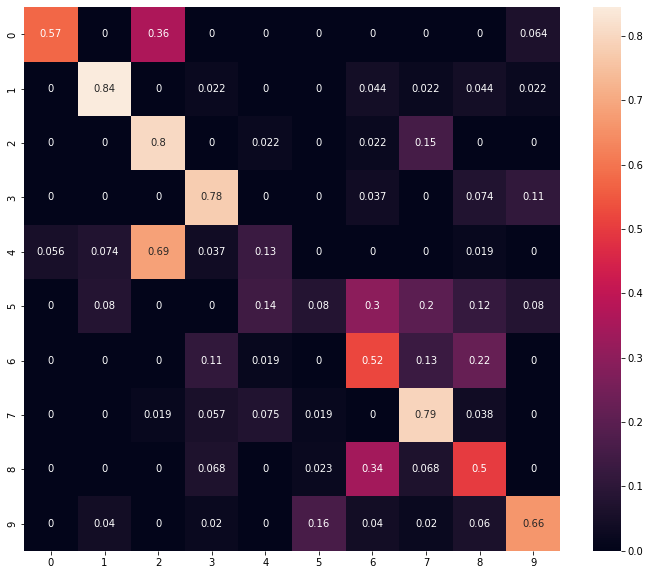

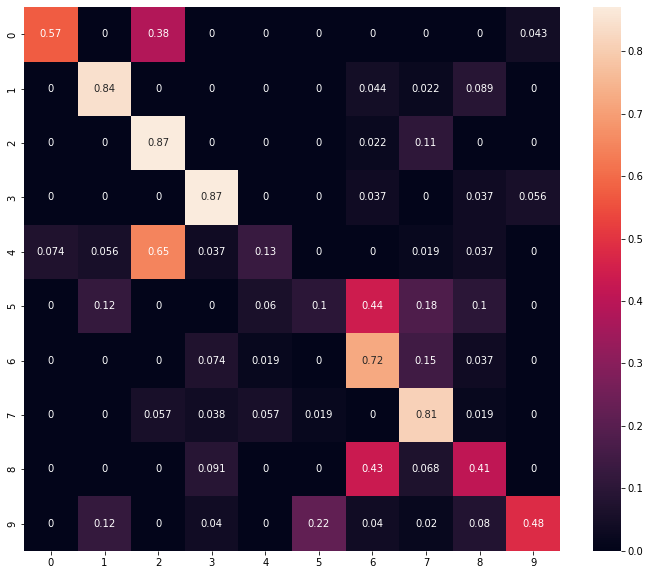

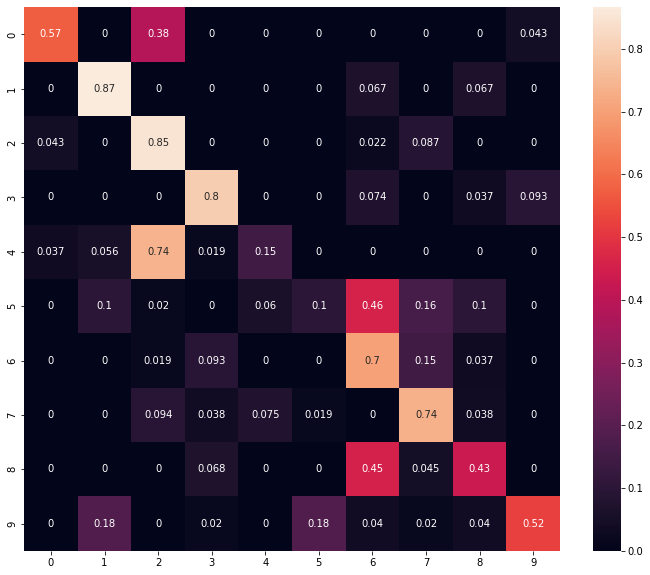

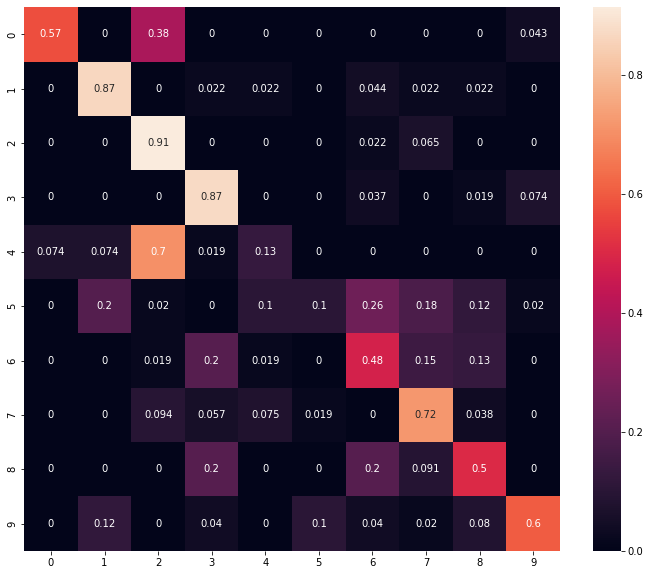

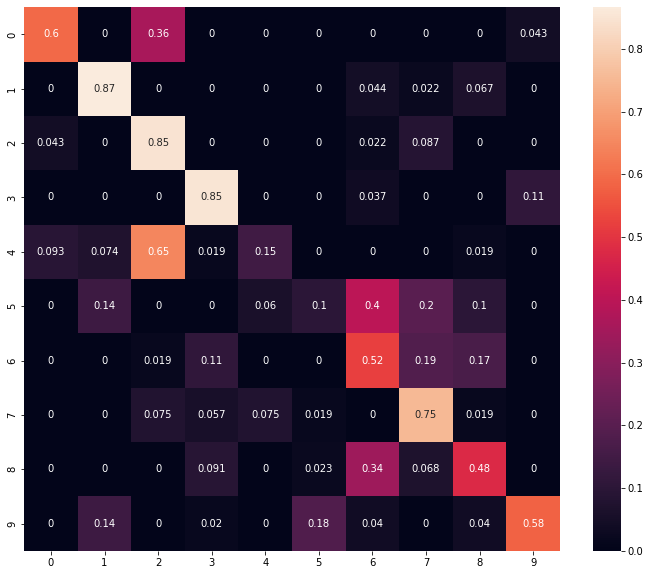

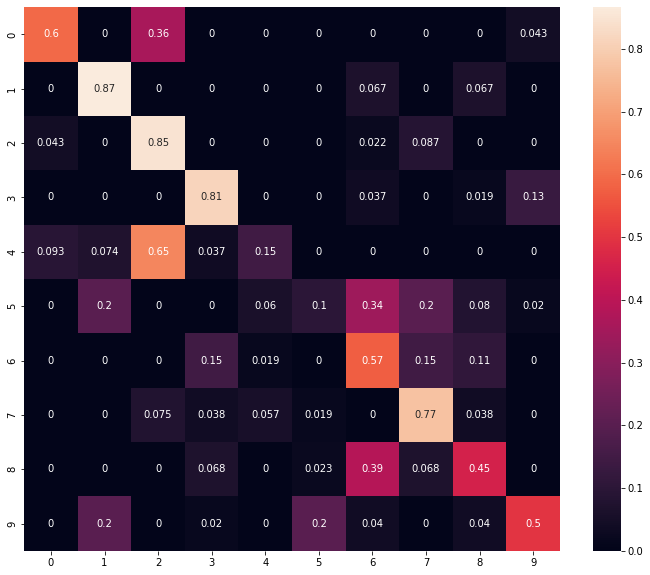

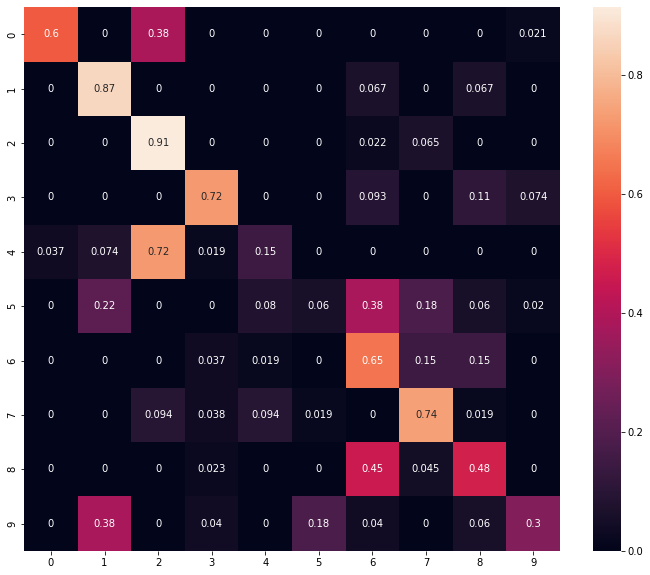

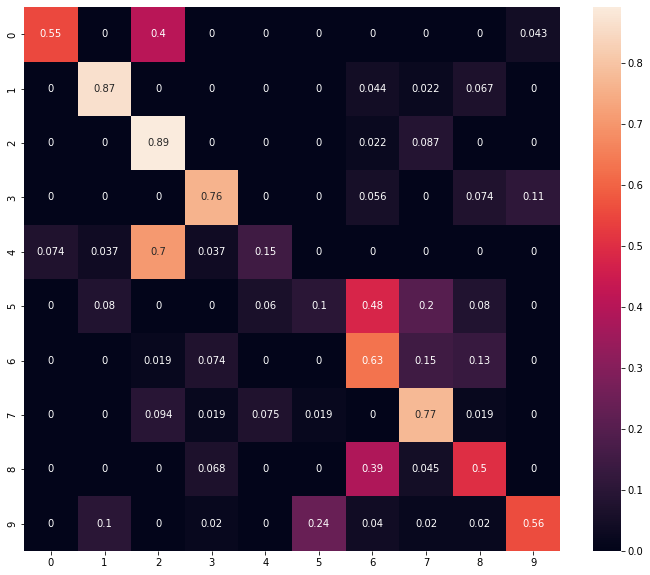

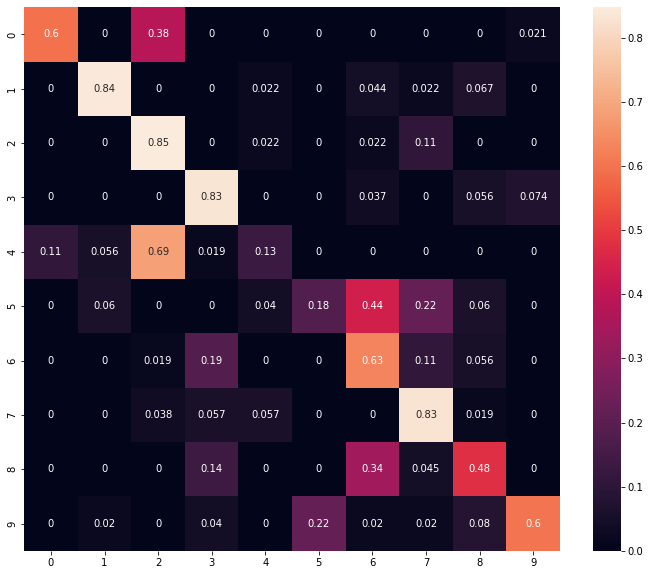

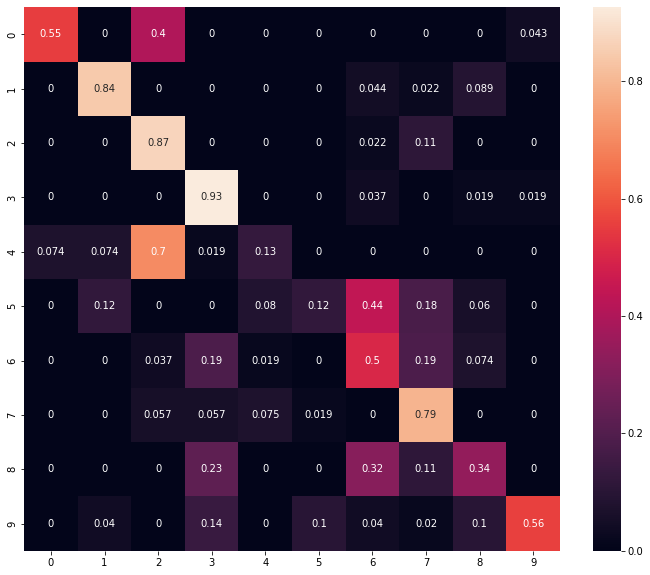

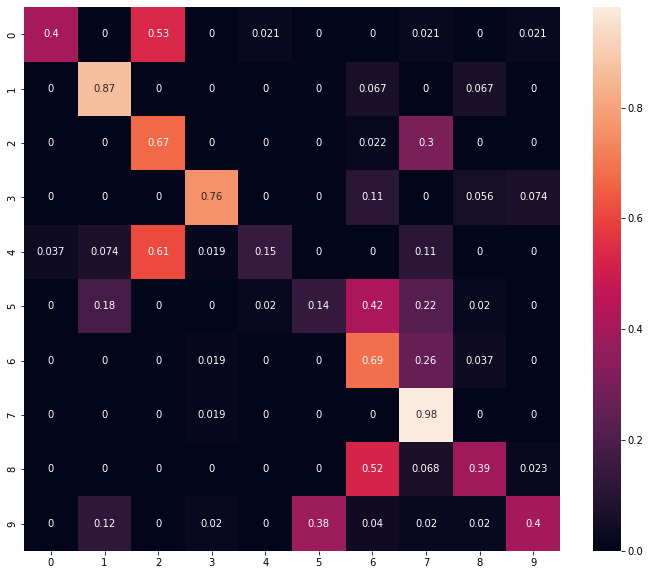

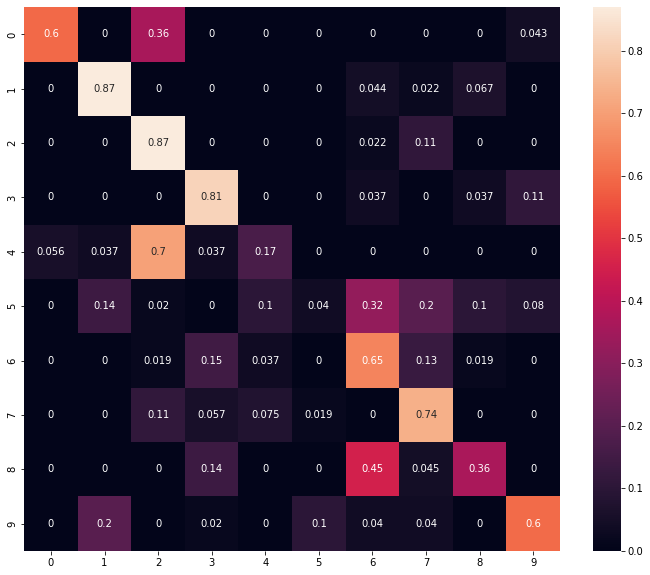

In [ ]:
input_dim = 13
hidden_dim = 32
capture_hidden_dim = np.zeros([10,hidden_dim])
layer_dim = 1  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10
num_epochs = 30
#model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)

# JUST PRINTING MODEL & PARAMETERS
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())
criterion = nn.NLLLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Number of steps to unroll
total_loss = 0
iter = 0
f1= F1Score(task="multiclass", num_classes=10).to(device)
for epoch in range(num_epochs):
    total_loss = 0
    for i, ( sound, labels) in enumerate(train_data_loader):
        model.train()
        # Load images as tensors with gradient accumulation abilities
        #sound = sound.view(-1, seq_dim, input_dim).requires_grad_()
        sound = sound.requires_grad_()
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs, hn = model(sound.to(device))
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs.to(device), labels.to(device))


        # Getting gradients w.r.t. parameters
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 20.0)
        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            model.eval()
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            F1 = 0
            ww = []
            ee=[]
            for images, labels in dev_data_loader:
                # Resize images
                #images = images.view(-1, seq_dim, input_dim)


                # Forward pass only to get logits/output
                outputs, hn = model(images.to(device))
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.to(device) == labels.to(device)).sum()


                ww = ww+ list(predicted.cpu().detach().numpy())
                ee = ee+ list(labels.cpu().detach().numpy())
                #predicted = torch.where(torch.sigmoid(outputs.data) > 0.5, 1, 0)
                f1_ = f1(predicted.to(device),labels.to(device))
                F1+=f1_.item()

            print(f"Test set accuracy = {100 * correct / len(dev_dataset)} %")
            f1_score = 100* F1/len(dev_dataset)
            print("f1 score", f1_score)
            cf_matrix = confusion_matrix(ee,ww)

            classes = (0,1,2,3,4,5,6,7,8,9)
            df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                            columns = [i for i in classes])
            plt.figure(figsize = (12,10))
            sn.heatmap(df_cm, annot=True)

            print(classification_report(ee, ww, labels=list(range(10))))



            accuracy = 100 * correct / total
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

497
Explained variation per principal component: [0.26547021 0.14929141 0.14040115 0.11118738 0.05678135 0.04491011]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 497 samples in 0.001s...
[t-SNE] Computed neighbors for 497 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 497 / 497
[t-SNE] Mean sigma: 1.227482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.206642
[t-SNE] KL divergence after 300 iterations: 0.445710


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

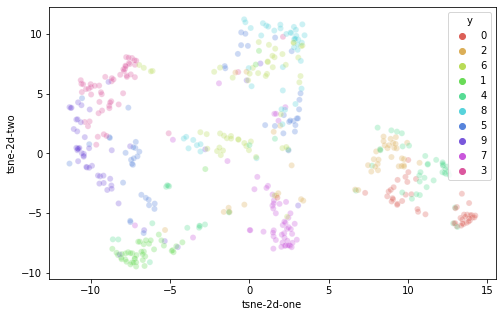

In [ ]:
capture_hidden_dim = np.zeros([len(dev_data_loader),hidden_dim*2])
labelss = []
#capture_hidden_dim[index] = hn.detach().numpy().squeeze(0)[0]
#labelss.append(labels.detach().numpy().squeeze(0))

model.eval()
o=0
total = 0
for index,(images, labels) in enumerate(dev_data_loader):
                # Resize images
                #images = images.view(-1, seq_dim, input_dim)
                # Forward pass only to get logits/output
                outputs, hn = model(images.to(device))
                capture_hidden_dim[index] = hn.cpu().detach().numpy().flatten()
                labelss.append(labels.detach().numpy().squeeze(0))
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.to(device) == labels.to(device)).sum()
print(total)
accuracy = 100 * correct / total
capture_hidden_dim = pd.DataFrame(capture_hidden_dim)
df_subset = pd.DataFrame()

pca = PCA(n_components=6)
pca_result = pca.fit_transform(capture_hidden_dim)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
df_subset['pca-three'] = pca_result[:,2]
df_subset['pca-four'] = pca_result[:,3]
df_subset['pca-five'] = pca_result[:,4]
df_subset['pca-six'] = pca_result[:,5]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)

df_subset1 = pd.DataFrame()

#df_subset1['tsne-2d-one'] = tsne_results[:,0]
#df_subset1['tsne-2d-two'] = tsne_results[:,1]

df_subset1['tsne-2d-one'] = tsne_results[:,0]
df_subset1['tsne-2d-two'] = tsne_results[:,1]

df_subset1["y"] = labelss
df_subset1["y"] = df_subset1['y'].apply(lambda i: str(i))
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset1,
    legend="full",
    alpha=0.3
)

## Task III (Open Ended)
1. Consider the case where we have speech data from a single speaker (e.g., george). Train your models on this subset of the data. What do you observe? How does this affect the model performance?

2. Even though a model is trained on a single speaker, we would like the model to generalizes to any speaker. To this end, one can use data augmentation techniques to artificially create more samples for each class. Some of these augmentations can be applied on the spectrogram (e.g., SpecAugment https://ai.googleblog.com/2019/04/specaugment-new-data-augmentation.html), and other can be applied on the raw waveform before creating the spectrogram such as pitch manipulation (https://github.com/facebookresearch/WavAugment). Explore the effect of one type of augmentation from each type. Report your observation and anaylze the confusion matrices.

3. Data augmentation techniques create different "views" of each training sample in a stochastic or determinstic approach. One can leaverage speech data augmentation to create views for training a neural network in a contrastive learning setting with margin-based objective function (for more info, read http://proceedings.mlr.press/v130/al-tahan21a/al-tahan21a.pdf). Implement at least one model using a contrastive loss based on different views of the training samples. Does this model improve over the model without contrastive learning? Report and discuss your observations.

For more information on the contrastive learning framework, you can refer to this paper
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9226466

In [ ]:
!pip install augment
!apt-get install libsox-fmt-all libsox-dev sox > /dev/null
! python -m pip install torchaudio > /dev/null
! python -m pip install git+https://github.com/facebookresearch/WavAugment.git > /dev/null

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for augment: filename=Augment-0.4-py3-none-any.whl size=4666 sha256=5155d492bb0090e80aae01854a009b7334607268f161d28c22791f2994d3fea5
  Stored in directory: /root/.cache/pip/wheels/5a/53/6c/b5bddd5e92101c59f38b14eefa2d23d8762257c90ff50c833a
Successfully built augment
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/WavAugment.git /tmp/pip-req-build-9zde9_d6


In [ ]:
import torch
import augment
import numpy as np
import IPython.display as ipd

In [ ]:
x, sr = librosa.load('/content/speech_data/0_george_10.wav', sr=SAMPLING_RATE) #,
ipd.Audio(x, rate=sr)

In [ ]:

class SDRDataset_2(Dataset):
    def __init__(self, metadata, type):
      self.d = 0
      self.metadata = metadata[metadata['split'] == type]
      if(type == 'TRAIN'):
        self.d = 1
    def __len__(self):
      return len(self.metadata)
    def __getitem__(self, idx):

      audio_file = self.metadata.iloc[idx]['identifier']
      digit = self.metadata.iloc[idx]['label']
      signal, sr = librosa.load(os.path.join("./speech_data",audio_file) + ".wav", sr=8000)

      if(self.d == 1):
        random_pitch_shift = lambda: np.random.randint(-400, +400)
        # the pitch will be changed by a shift somewhere between (-400, +400)
        random_pitch_shift_effect = augment.EffectChain().pitch("-q", random_pitch_shift).rate(sr)
        # -q flag enables faster, but lower quality processing
        random_room_size = lambda: np.random.randint(0, 101)
        noise_generator = lambda: torch.zeros_like(torch.from_numpy(signal)).uniform_()


        combination = augment.EffectChain() \
          .pitch("-q", random_pitch_shift).rate(sr) \
          .reverb(50, 50, random_room_size).channels(1) \
          .additive_noise(noise_generator, snr=15)

        combination1 = augment.EffectChain() \
          .pitch("-q", random_pitch_shift).rate(sr) \
          .reverb(50, 50, random_room_size).channels(1)
        try:
          signal = combination.apply(torch.from_numpy(signal), src_info={'rate': sr}, target_info={'rate': sr})
          mel_spectrogram = extract_melspectrogram(signal.reshape(-1).numpy(), sr, num_mels=13)

        except:
          signal = combination1.apply(torch.from_numpy(signal), src_info={'rate': sr}, target_info={'rate': sr})
          mel_spectrogram = extract_melspectrogram(signal.reshape(-1).numpy(), sr, num_mels=13)
      else:
          mel_spectrogram = extract_melspectrogram(signal.reshape(-1), sr, num_mels=13)


      return torch.tensor(mel_spectrogram.T, dtype=torch.float32), torch.tensor(digit, dtype=torch.long)

In [ ]:

class SDRDataset_1(Dataset):
    def __init__(self, metadata, type):
      self.d = 0
      self.metadata = metadata[metadata['split'] == type]
      self.k = SpecAugmentTorch( 10 , 5 ,  1  , 20 , 1.0 , 1, batch = 1)
      if(type == 'TRAIN'):
        self.d = 1
    def __len__(self):
      return len(self.metadata)
    def __getitem__(self, idx):
      audio_file = self.metadata.iloc[idx]['identifier']
      digit = self.metadata.iloc[idx]['label']
      signal, sr = librosa.load(os.path.join("./speech_data",audio_file) + ".wav", sr=8000)
      mel_spectrogram = extract_melspectrogram(signal, sr, num_mels=13)
      if(self.d == 1):
        mel_spectrogram = self.k(np.expand_dims(np.expand_dims(mel_spectrogram, axis = 0), axis = 0))
        mel_spectrogram = mel_spectrogram.reshape(13, -1)
      return torch.tensor(mel_spectrogram.T, dtype=torch.float32), torch.tensor(digit, dtype=torch.long)

In [ ]:
train_dataset = SDRDataset_2(sdr_df[sdr_df['speaker'] == 'theo' ], type = "TRAIN")
train_data_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
dev_dataset = SDRDataset_2(sdr_df, type = "DEV")
dev_data_loader = DataLoader(dev_dataset, batch_size=1, shuffle=True)

LSTMModel(
  (lstm): LSTM(13, 32, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=64, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=1)
)
10
torch.Size([128, 13])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 13])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([10, 64])
torch.Size([10])
Test set accuracy = 15.291749954223633 %
f1 score 15.29175050301811
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.16      0.87      0.27        45
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        54
           4       0.14      0.02      0.03        54
           5       0.14      0.30      0.19        50
           6       0.00      0.00      0.00        54
           7       0.15      0.40      0.21        53
           8       0.00      0.00      0.00        44
           9       0.00   

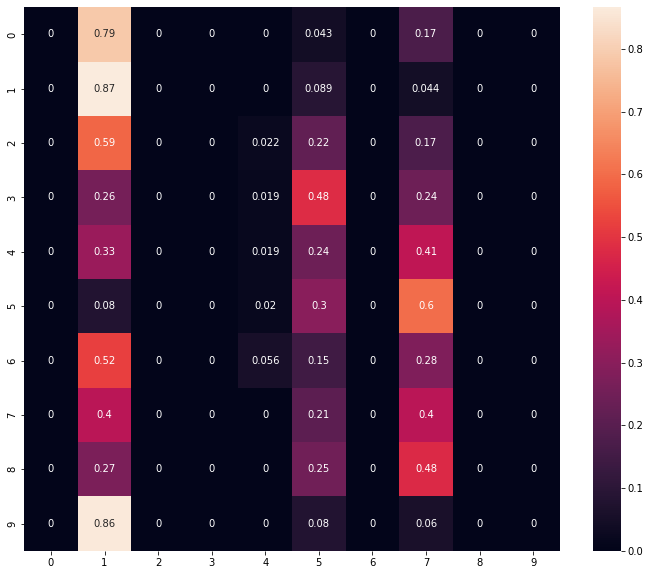

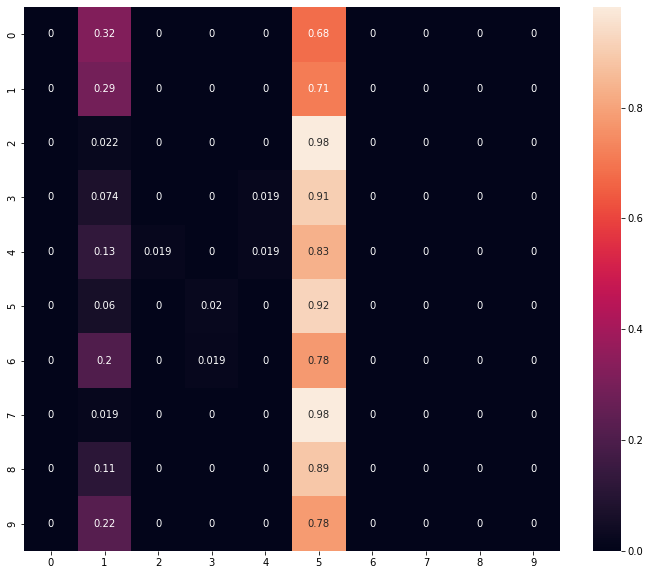

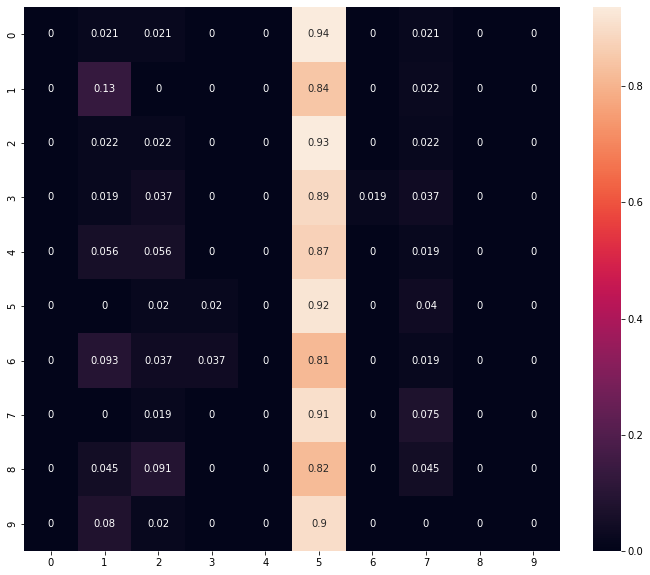

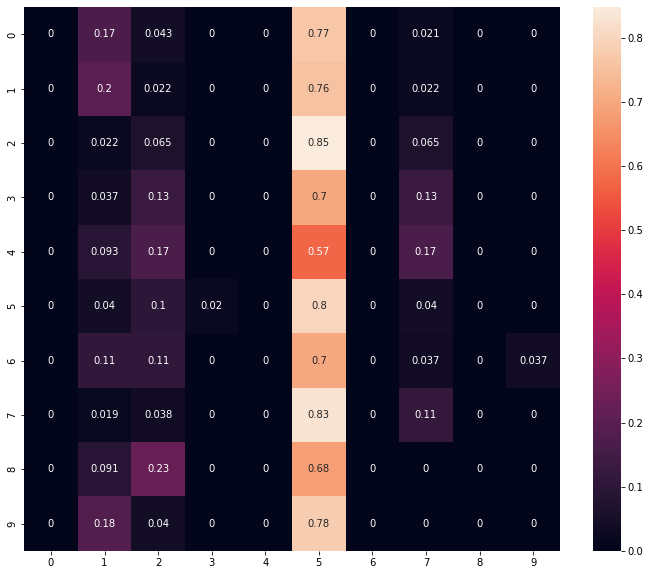

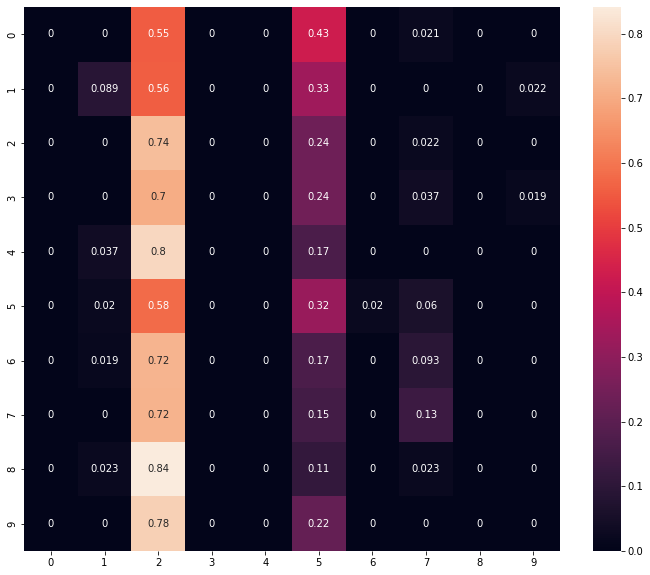

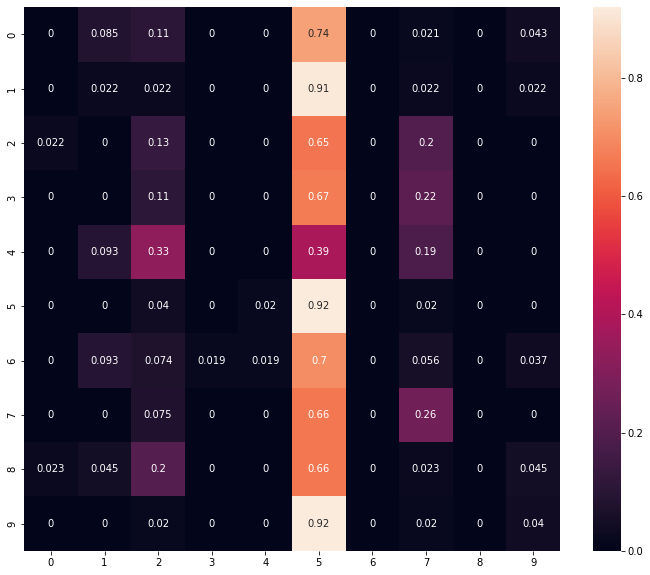

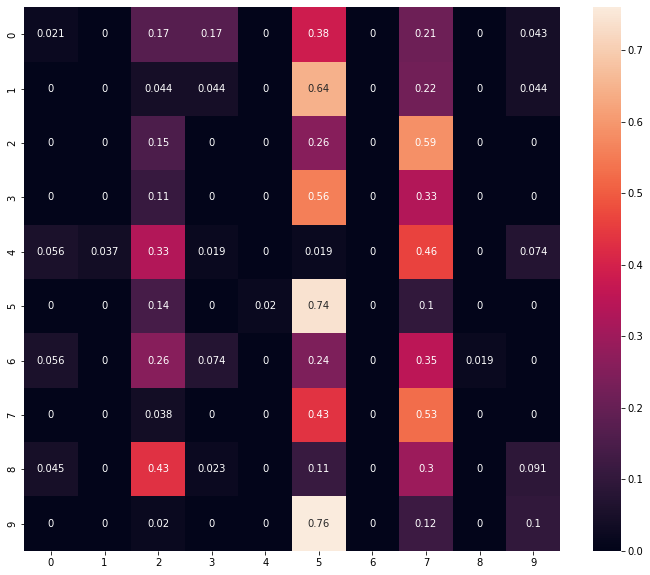

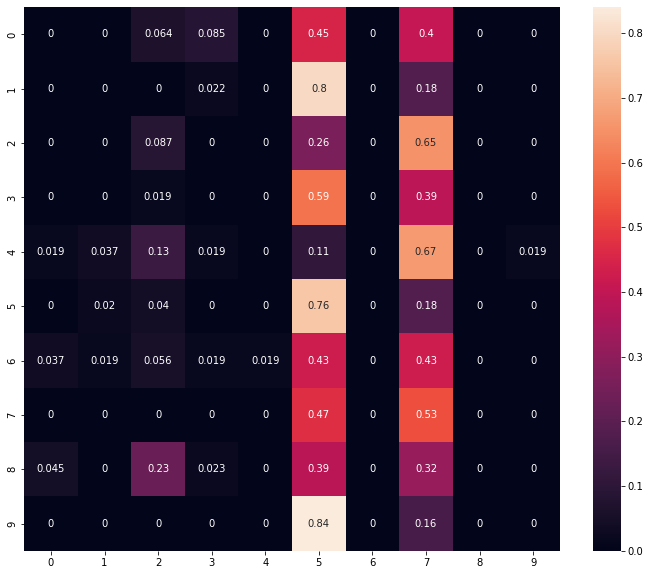

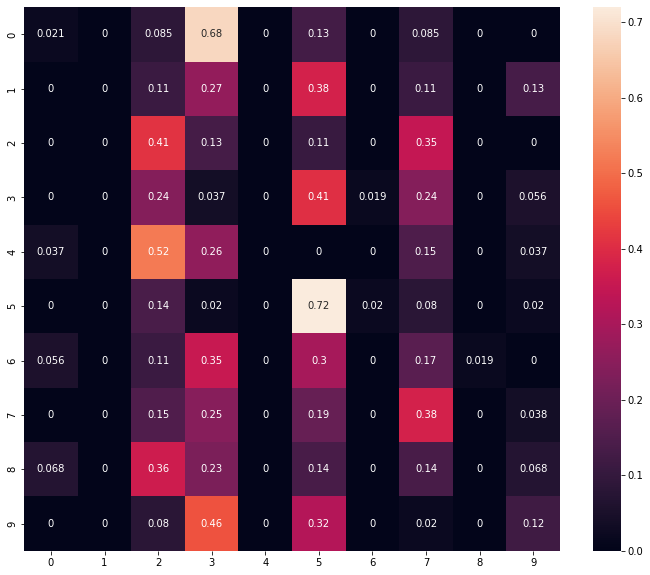

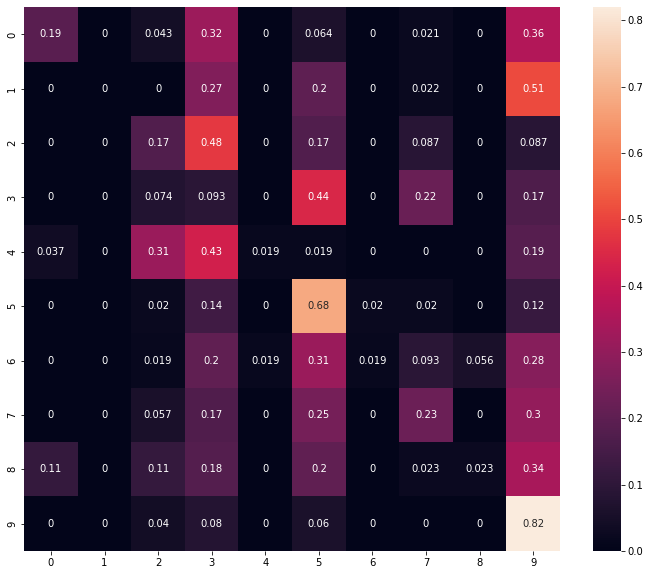

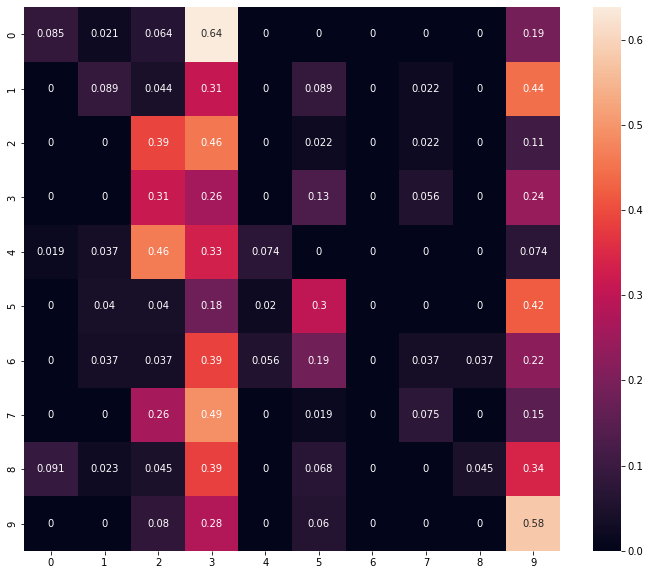

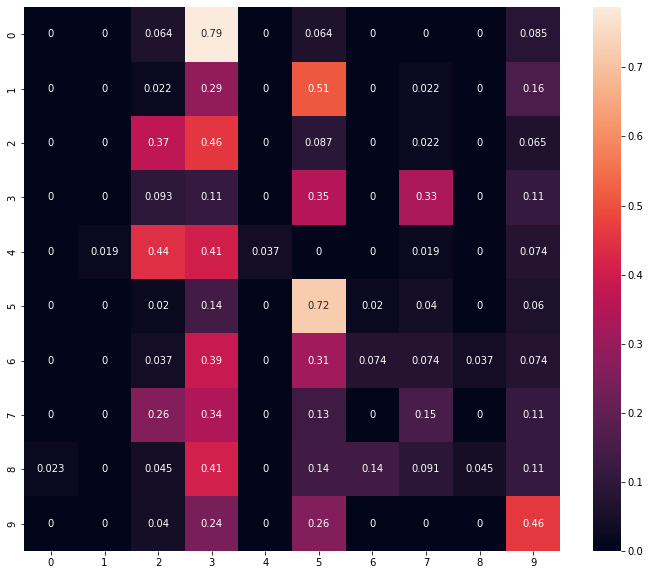

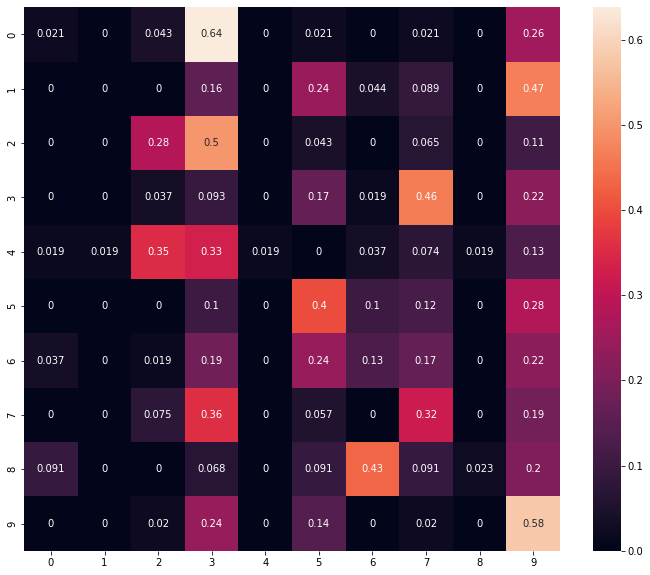

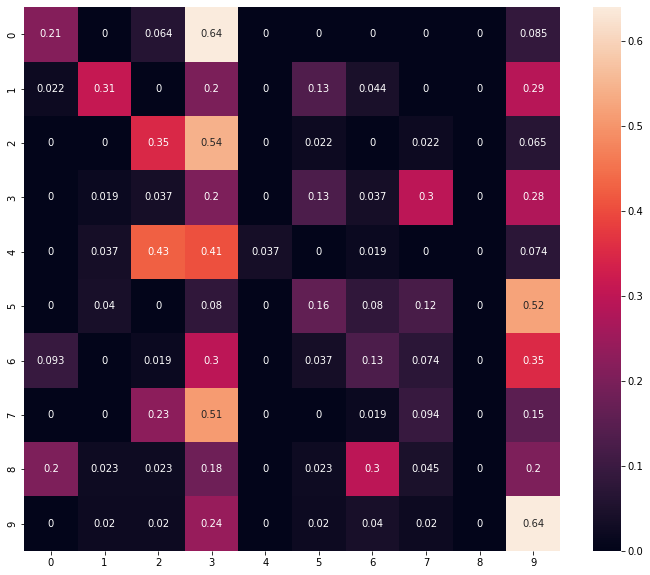

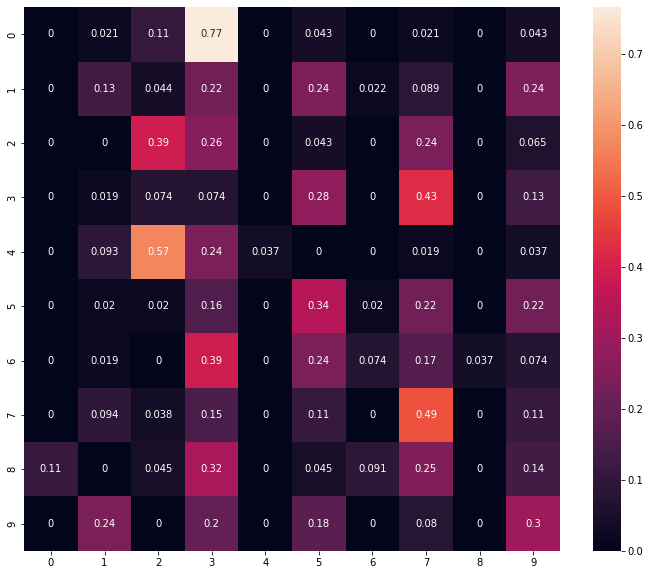

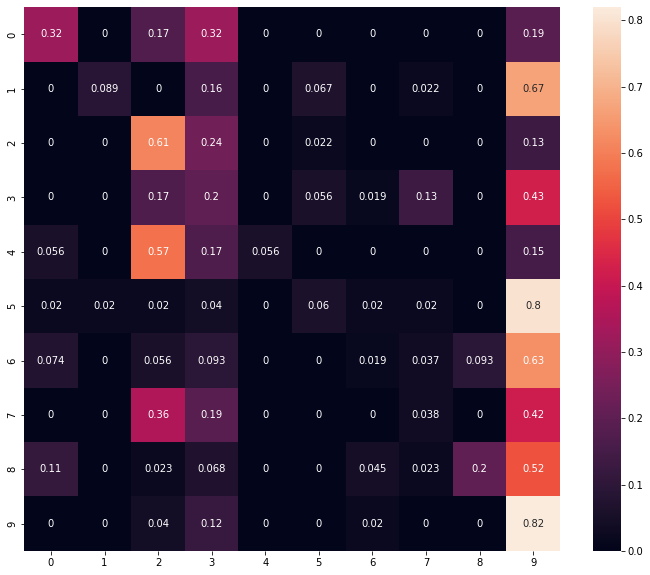

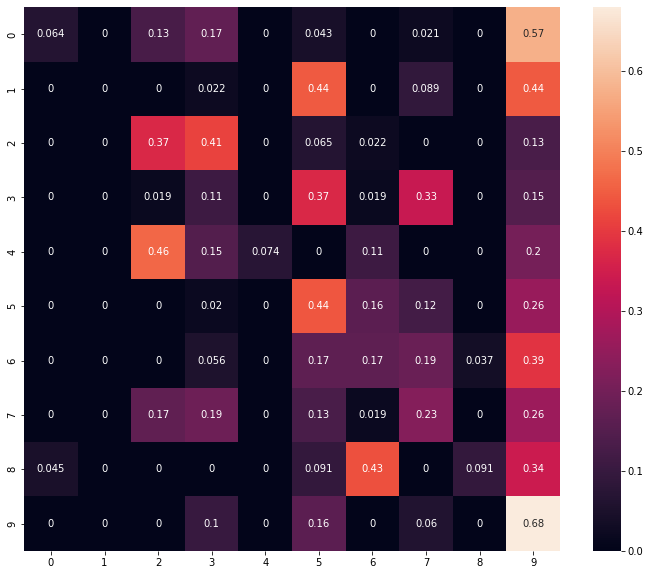

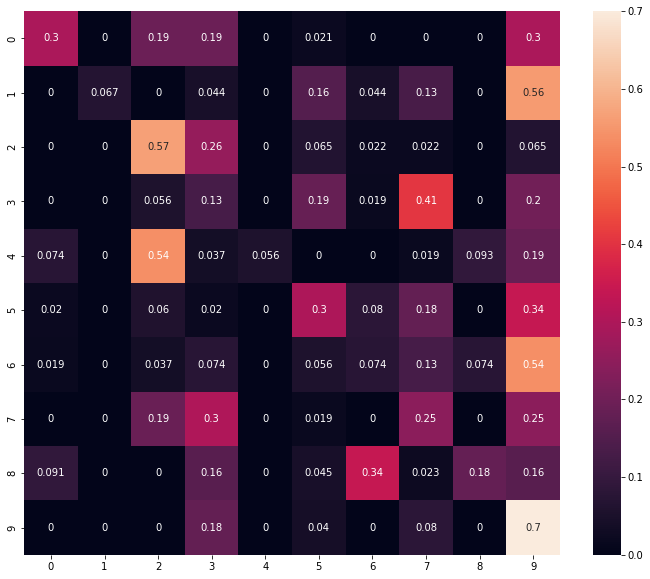

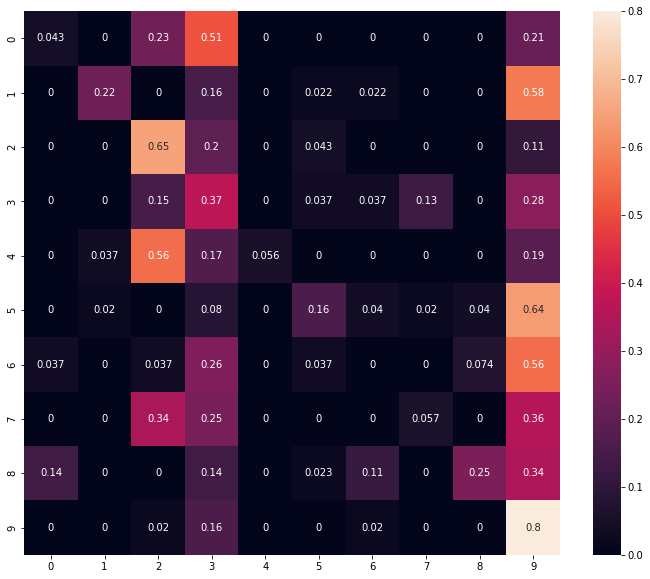

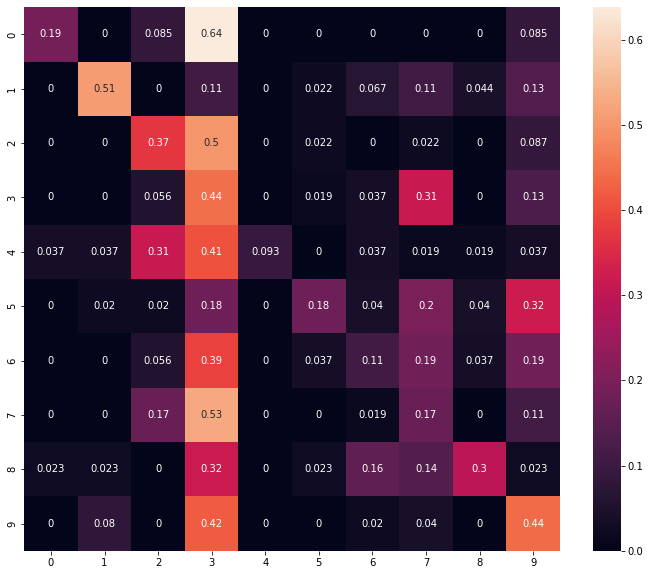

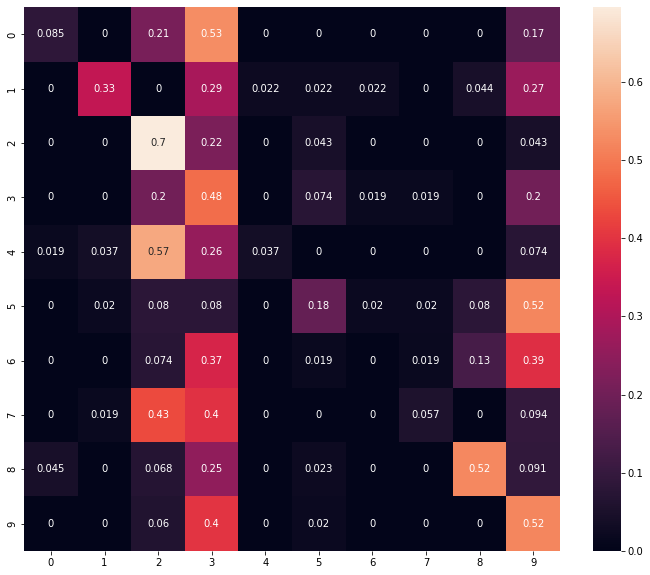

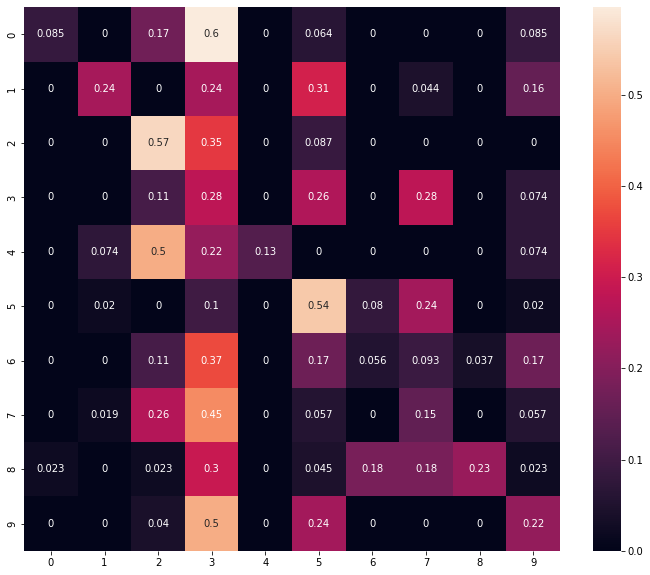

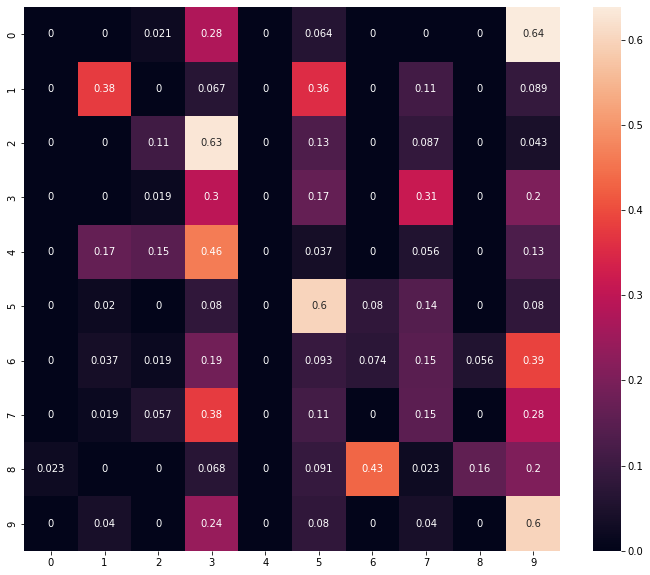

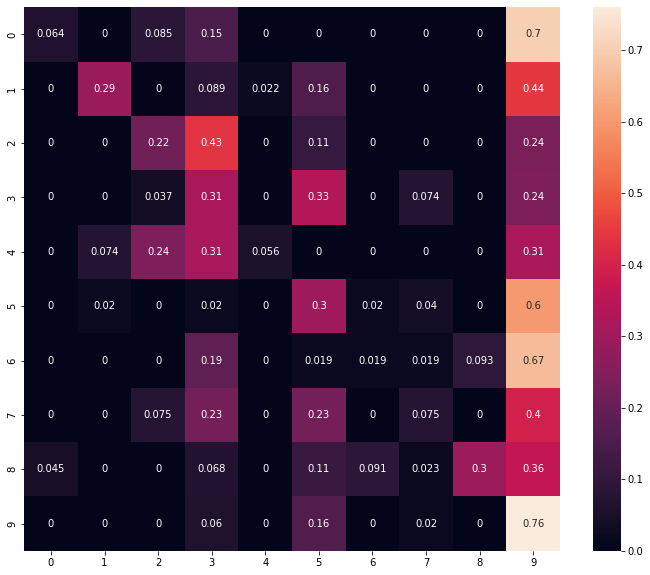

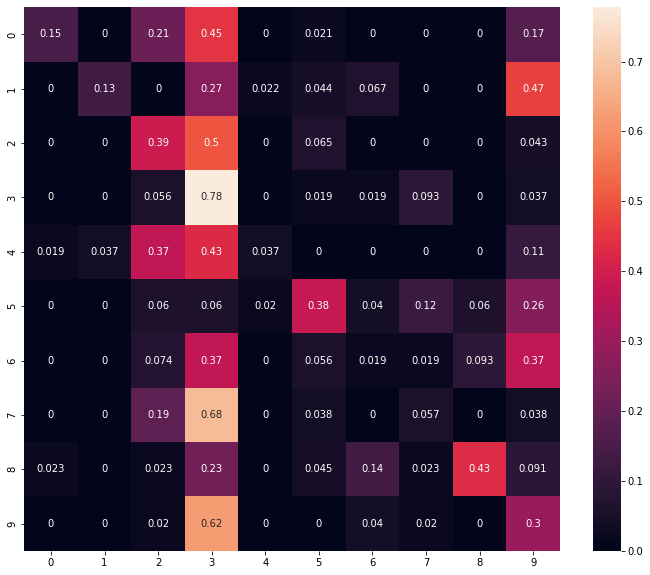

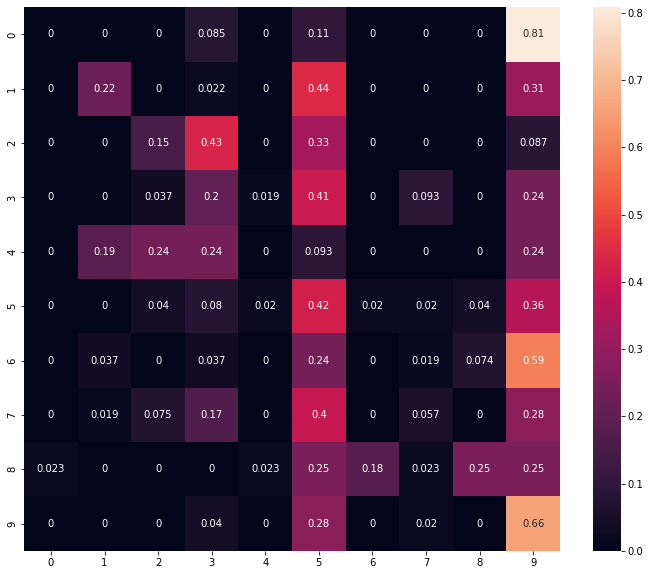

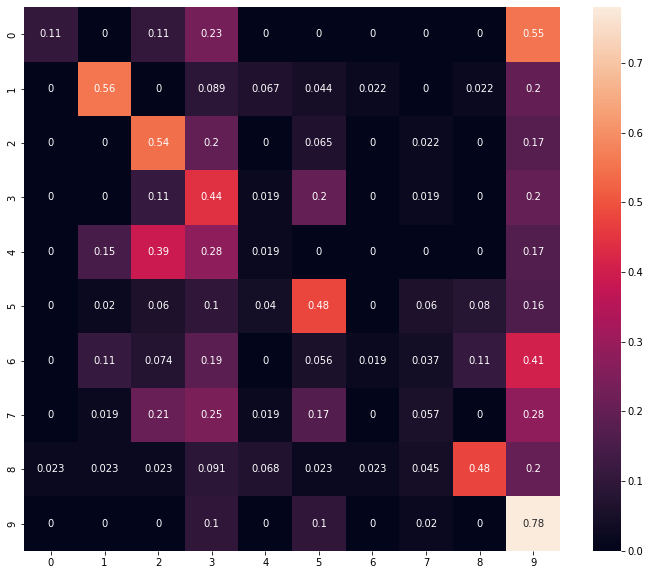

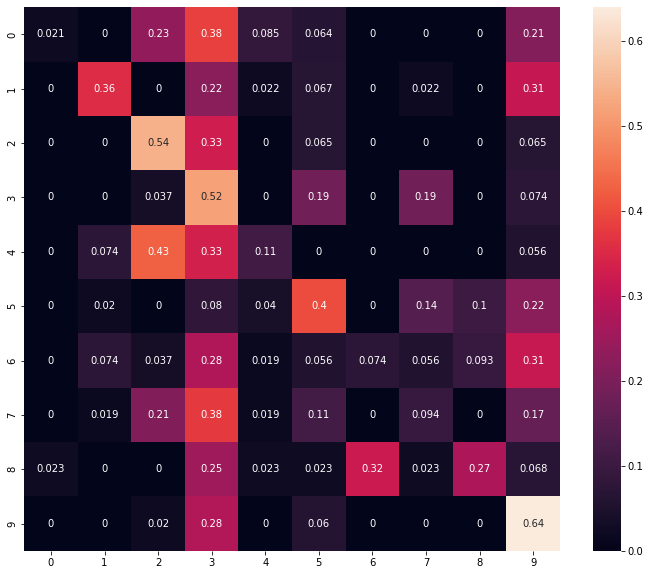

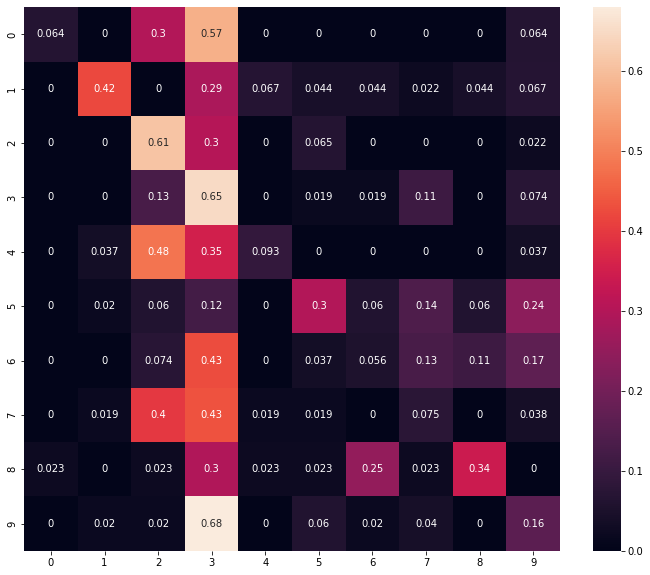

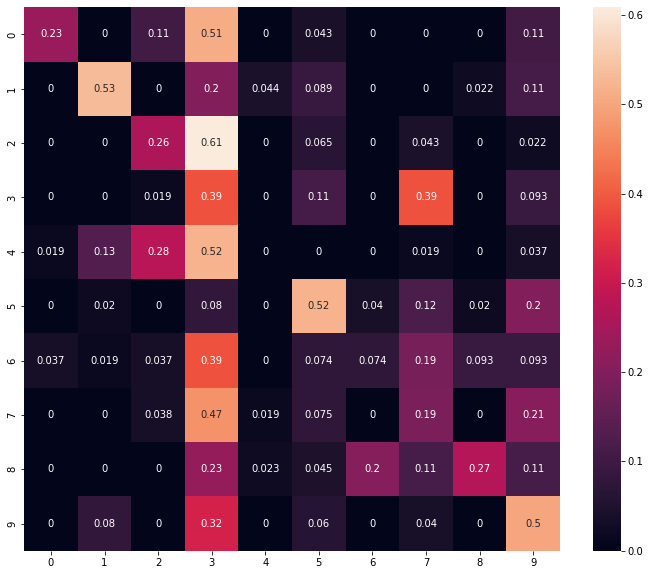

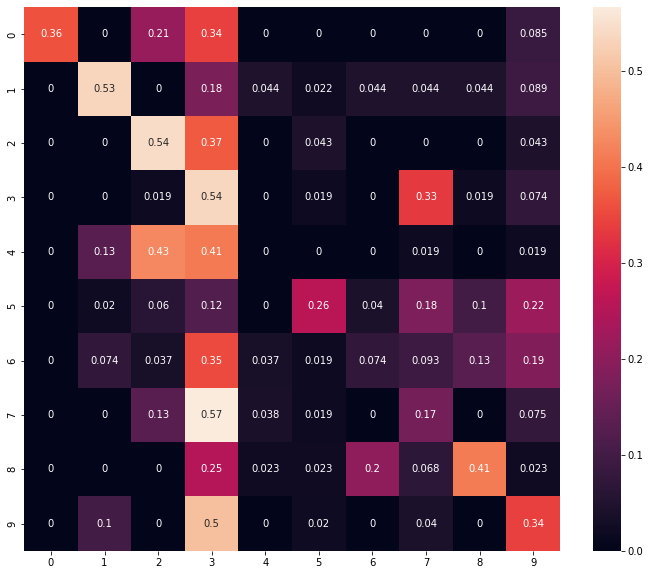

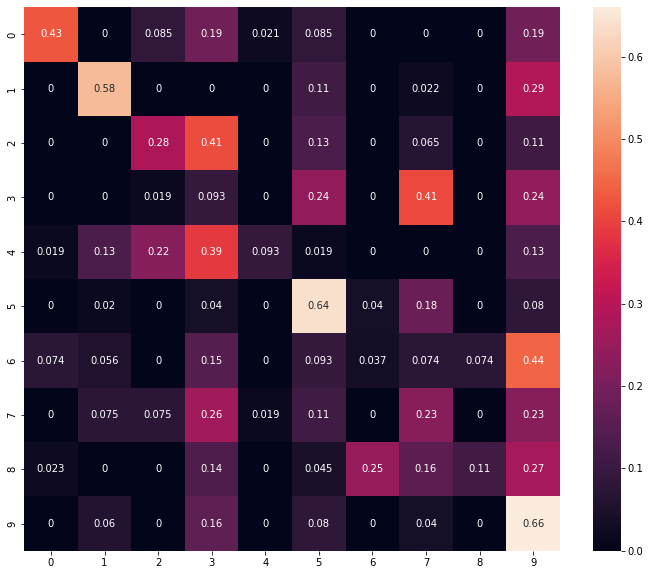

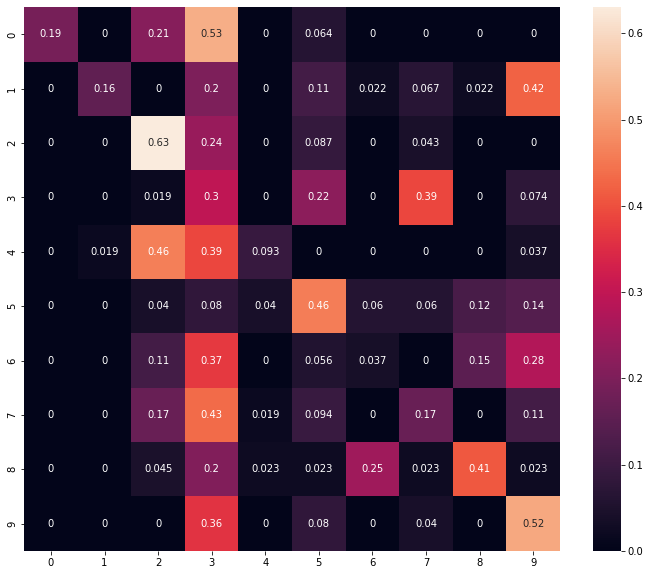

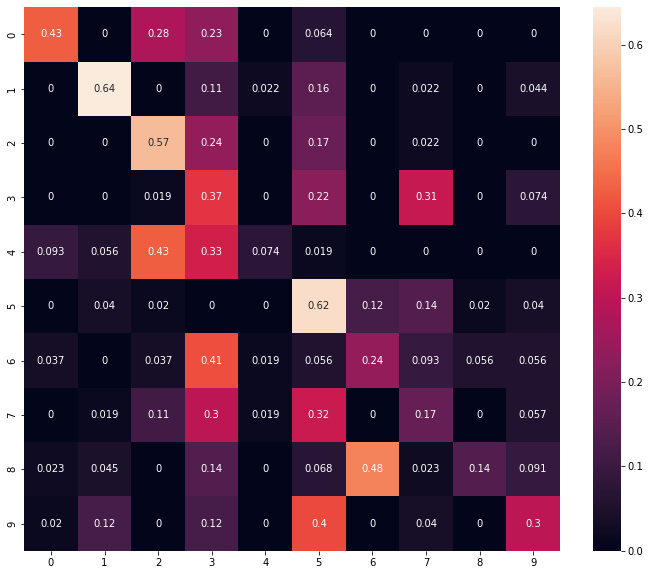

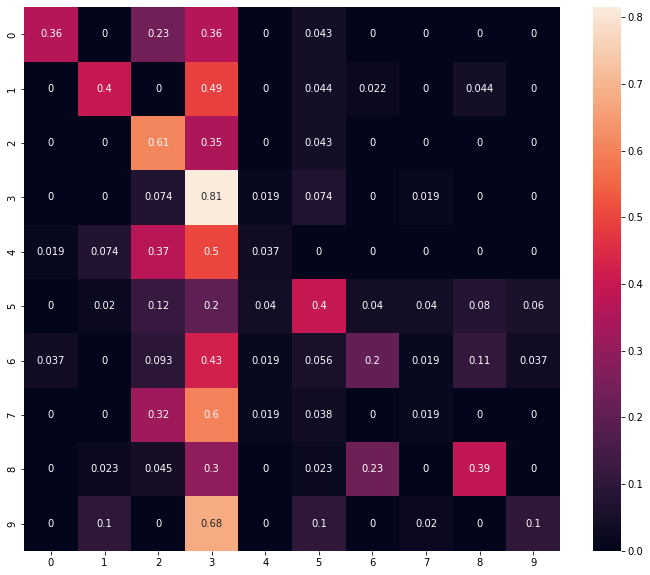

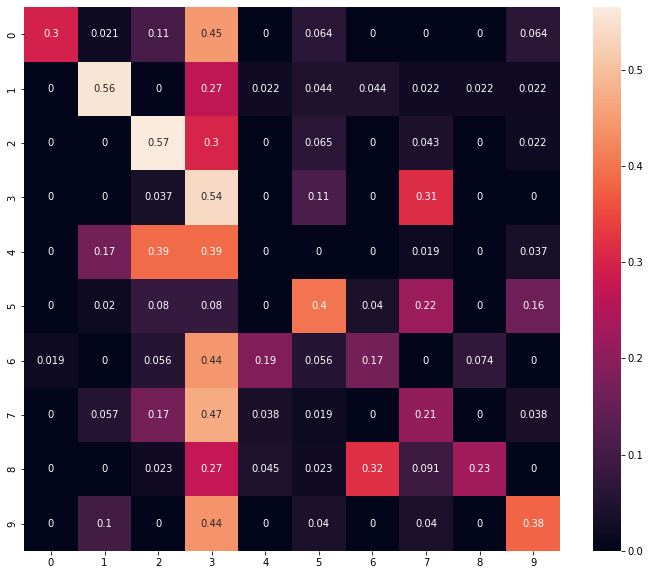

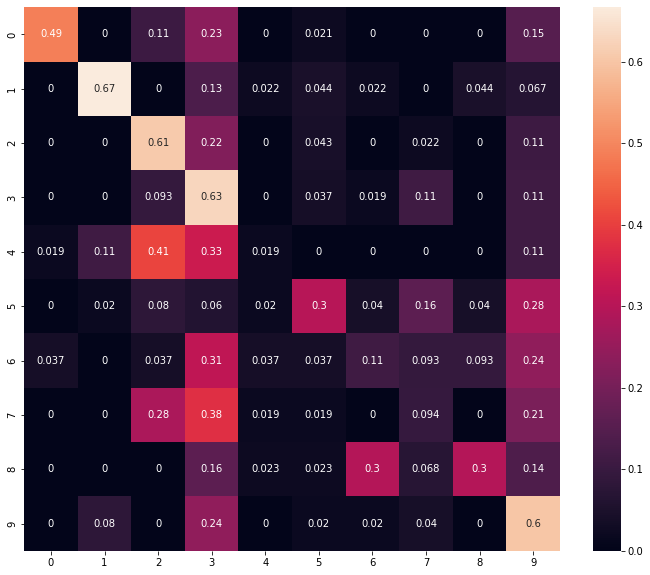

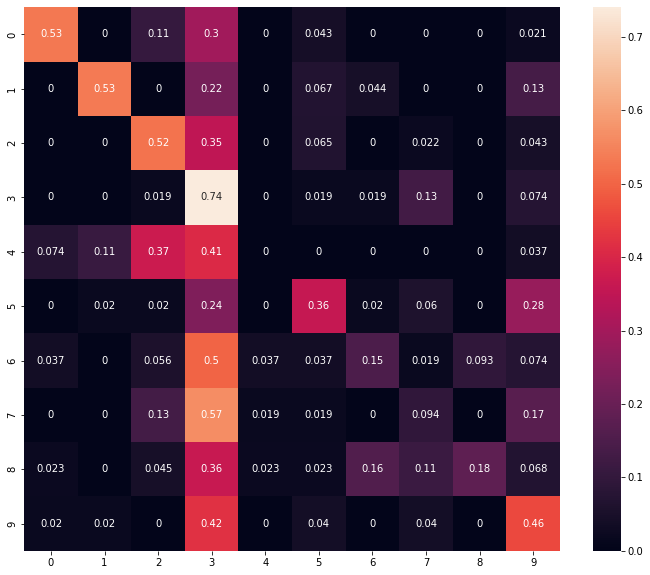

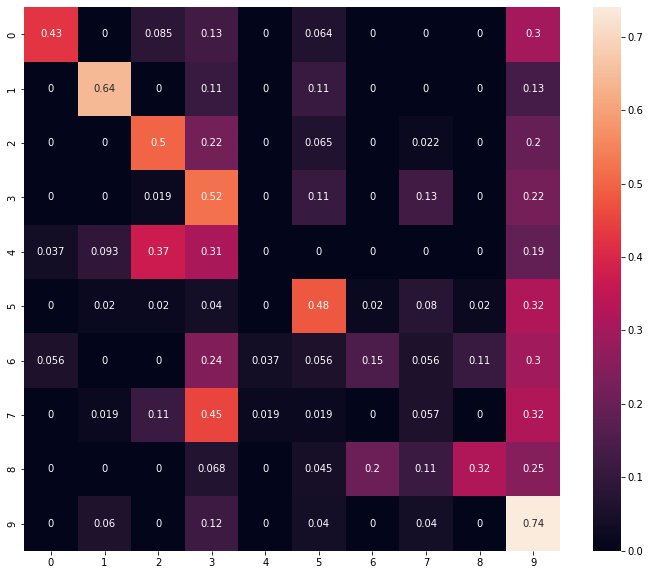

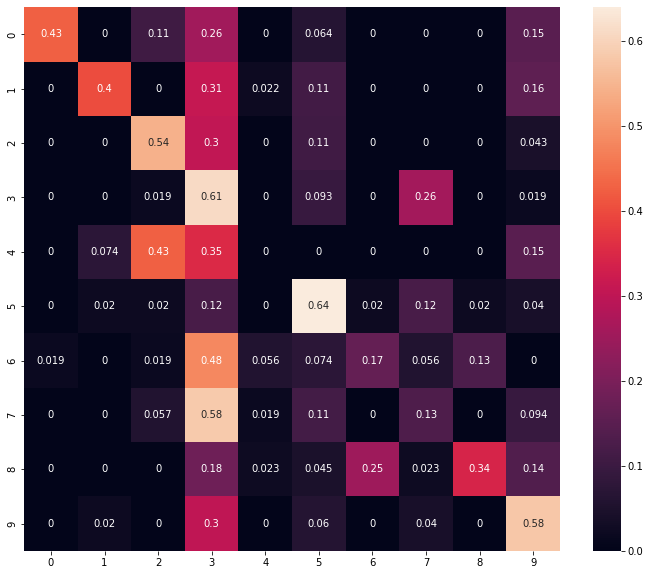

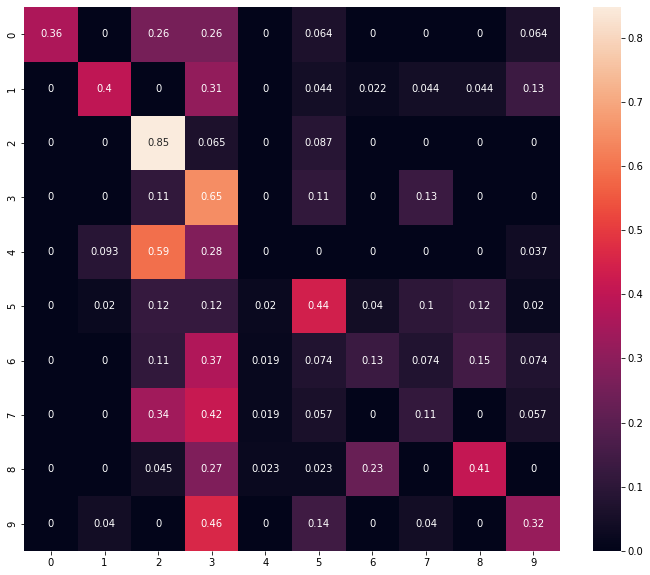

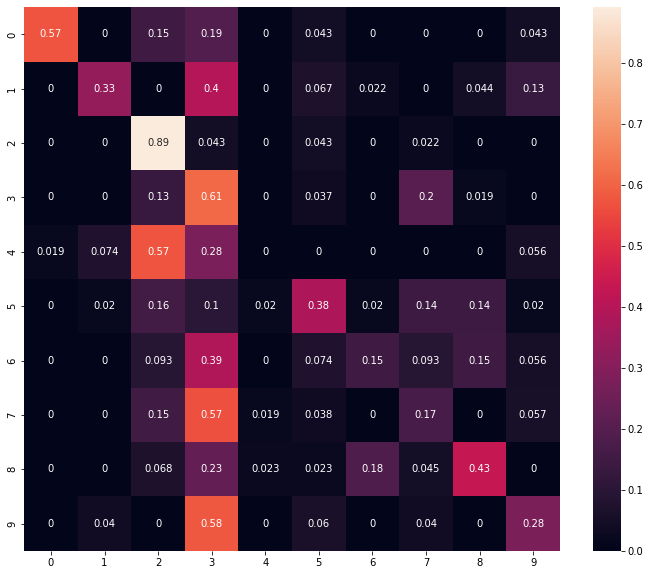

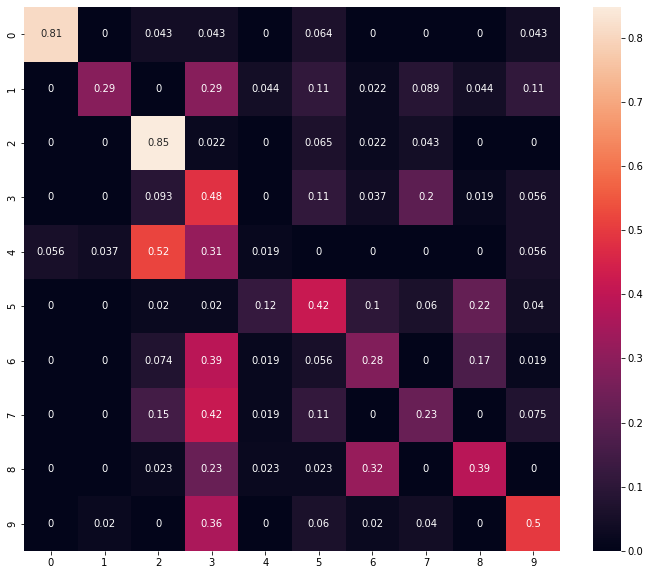

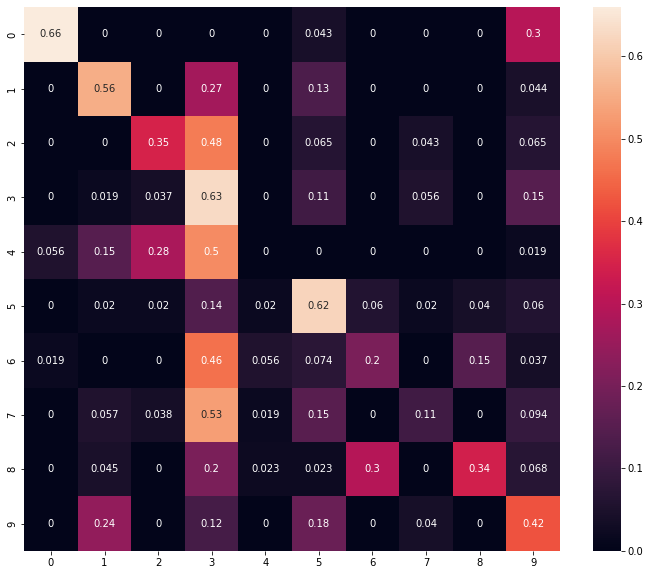

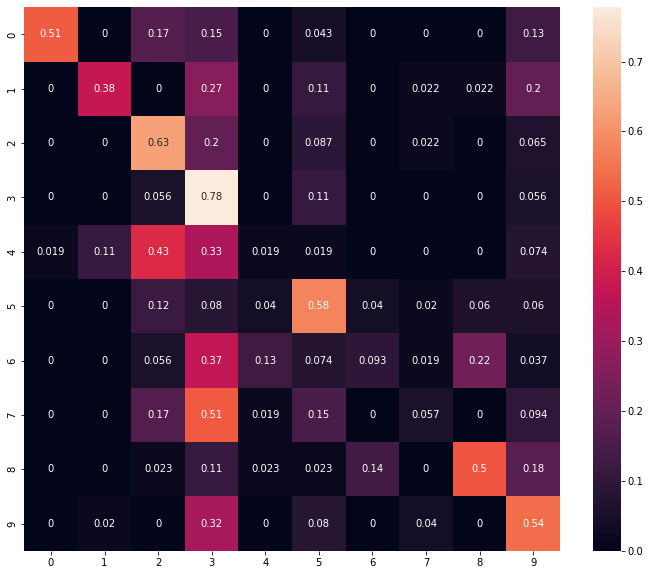

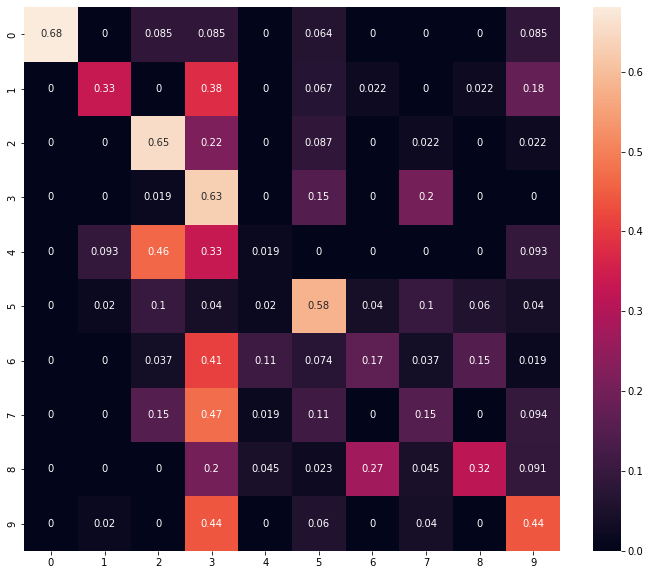

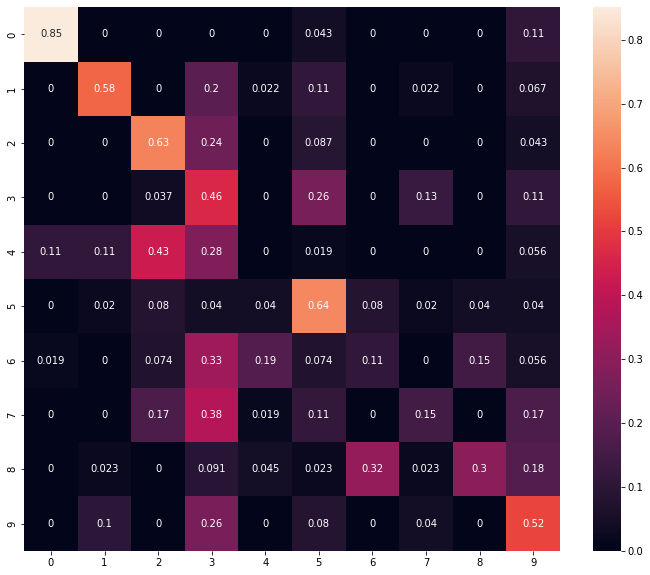

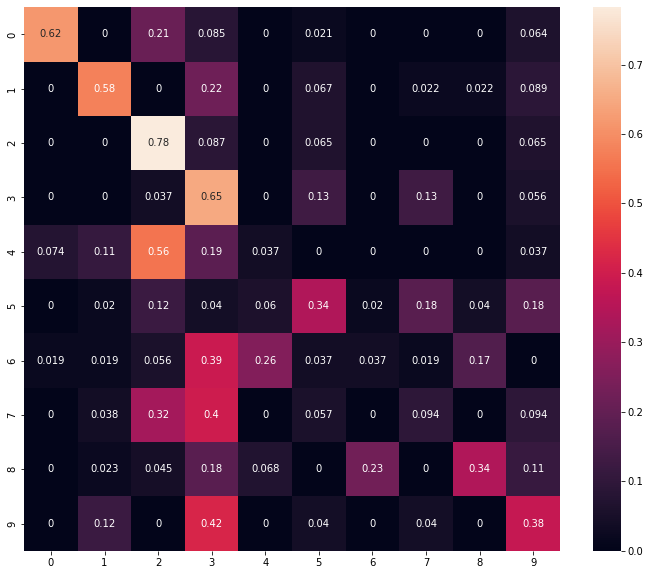

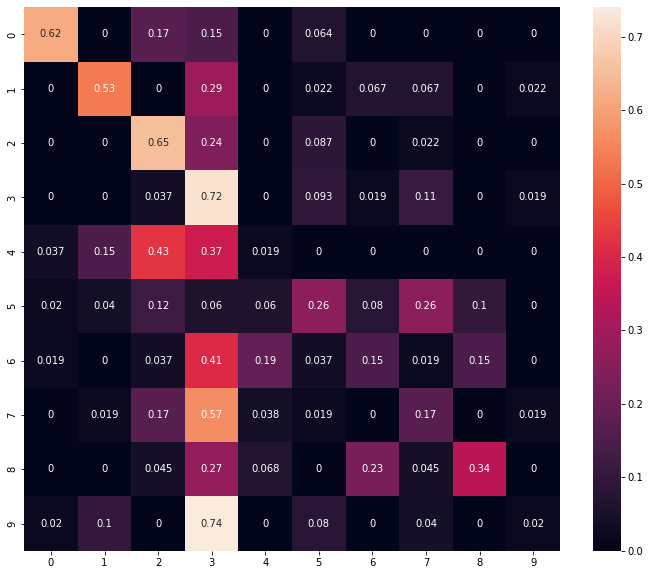

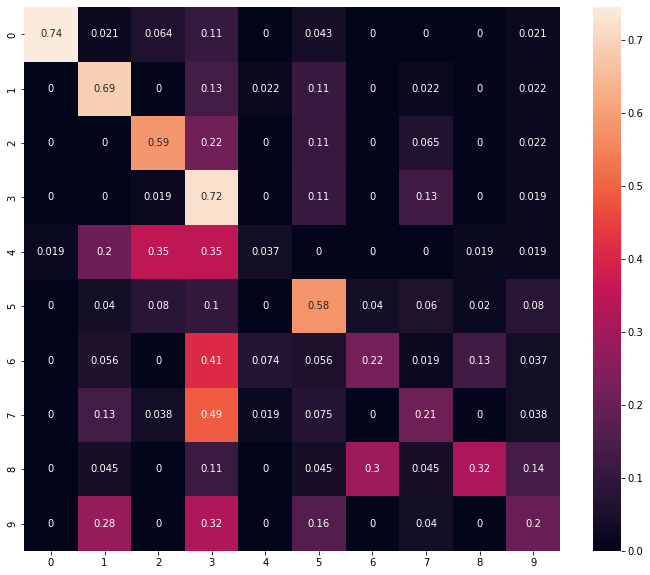

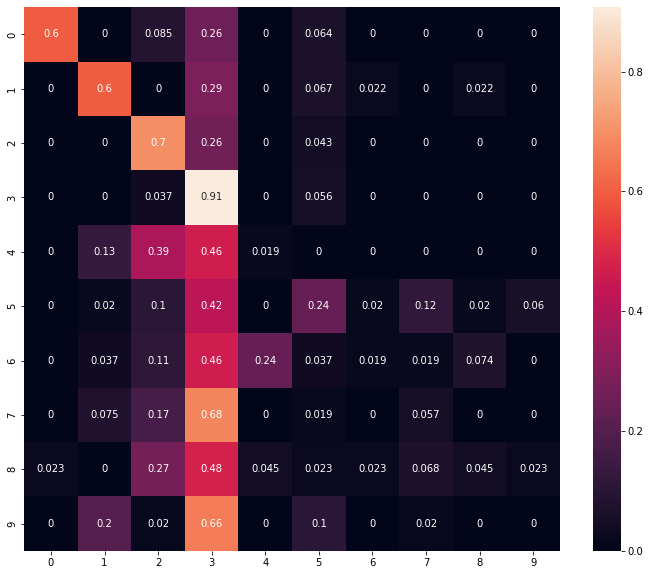

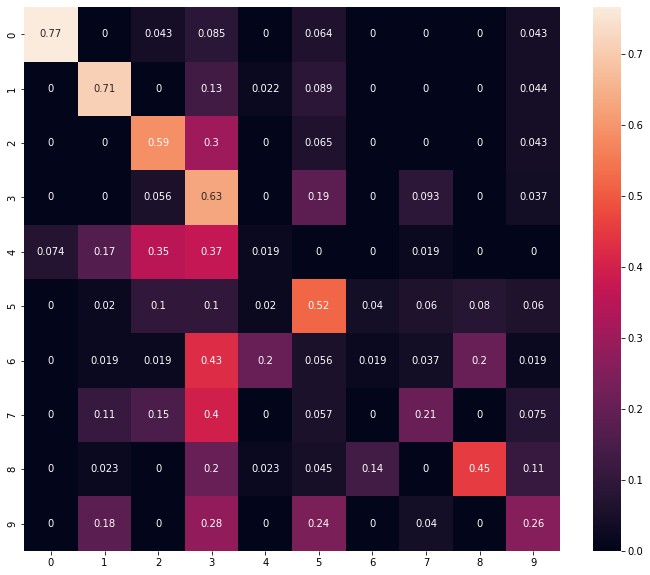

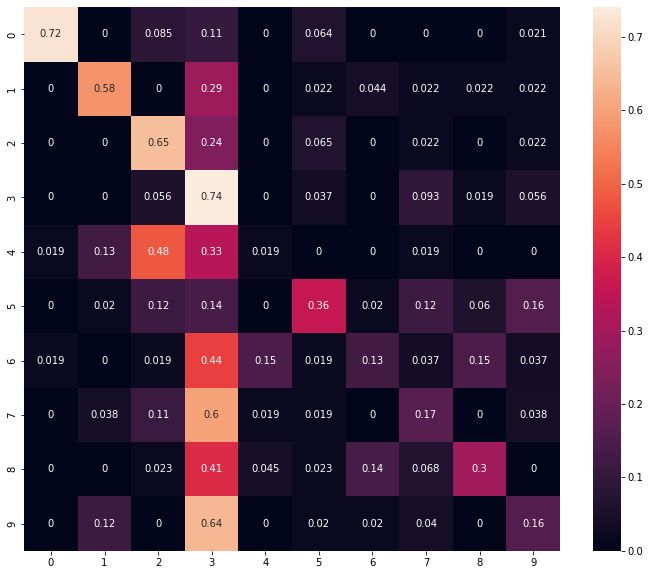

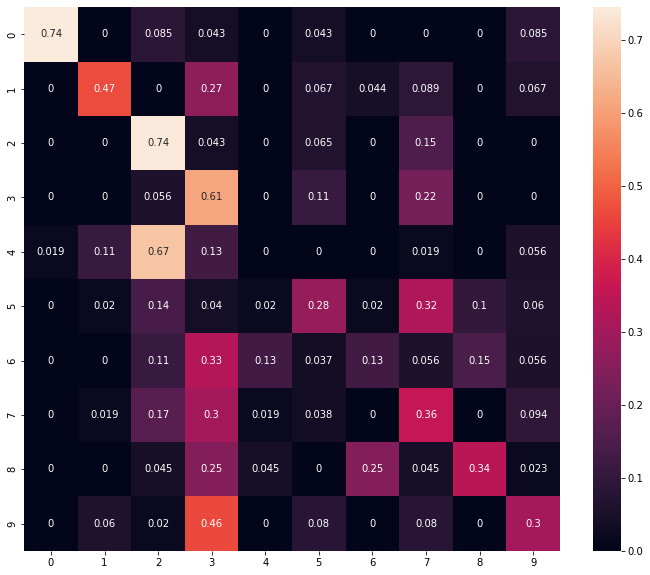

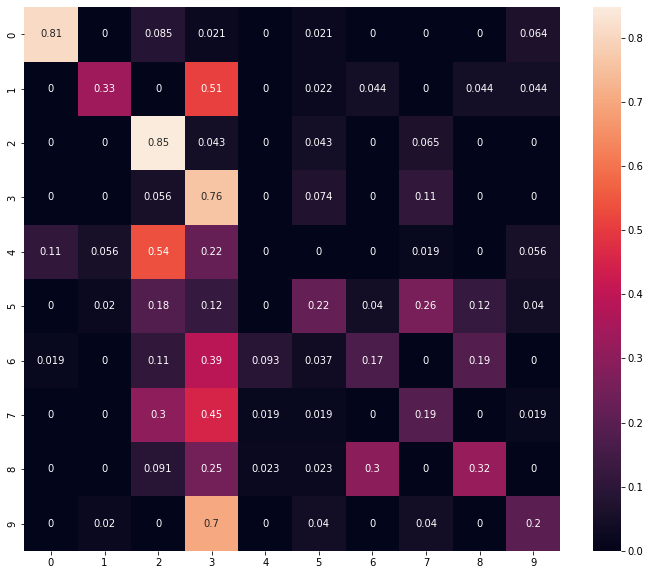

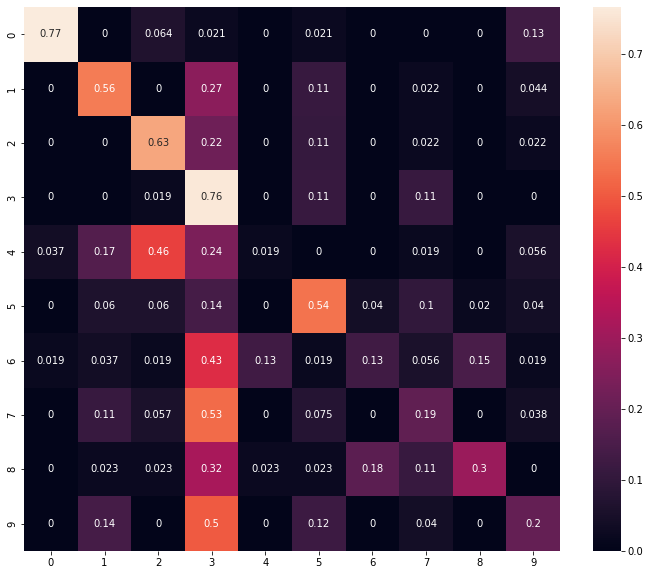

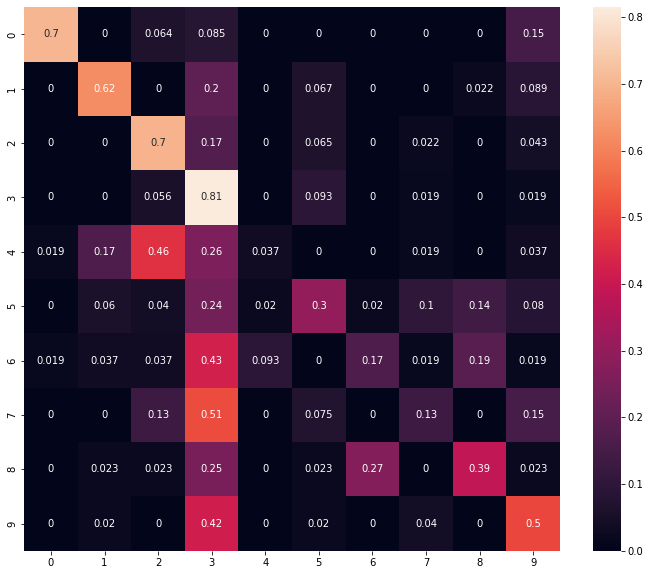

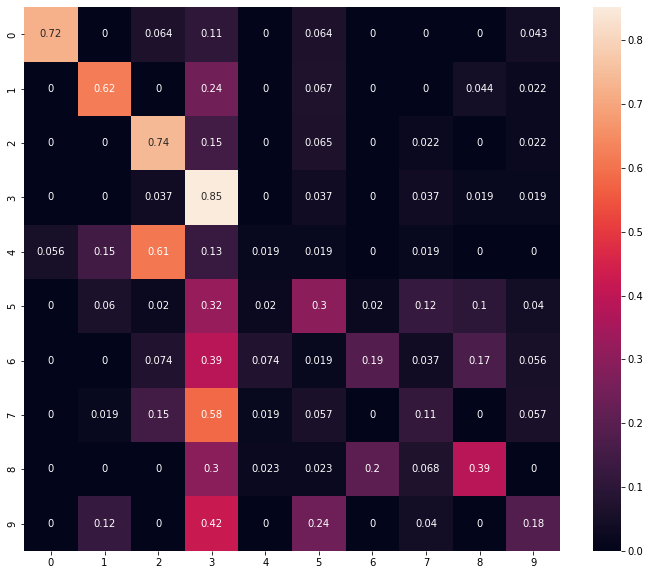

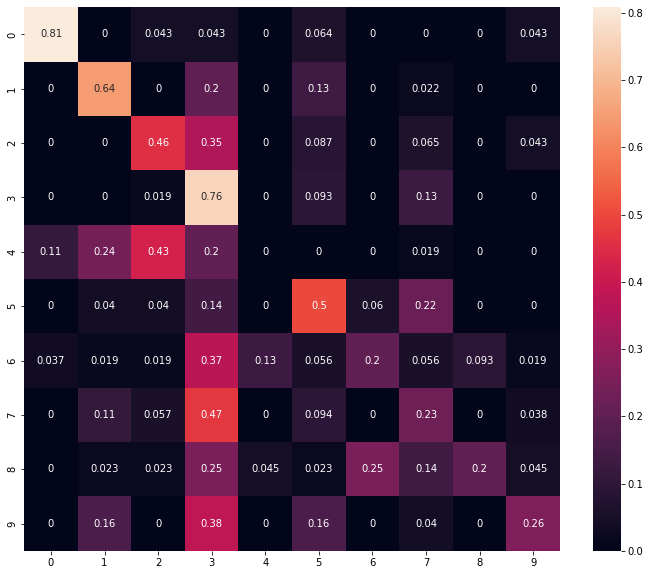

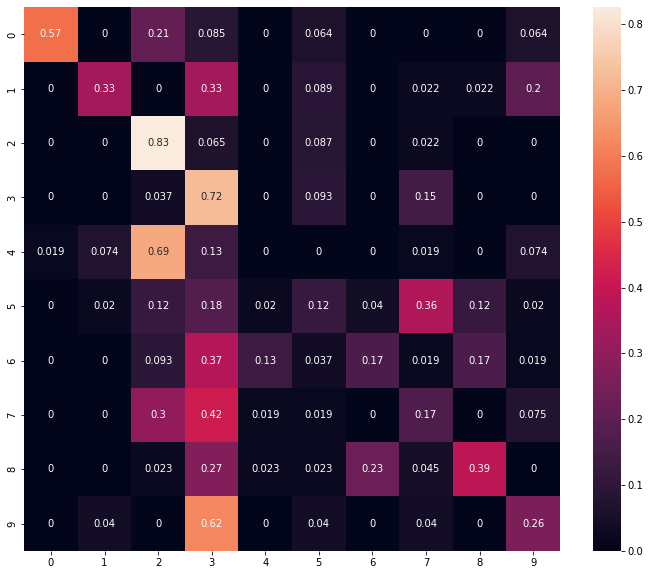

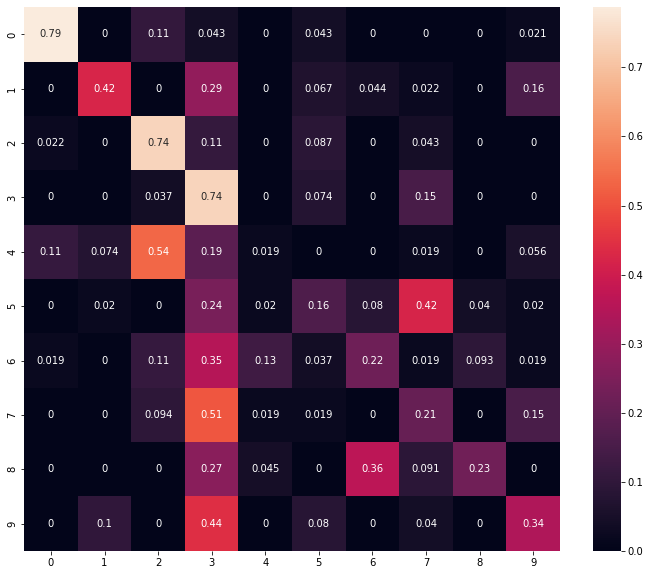

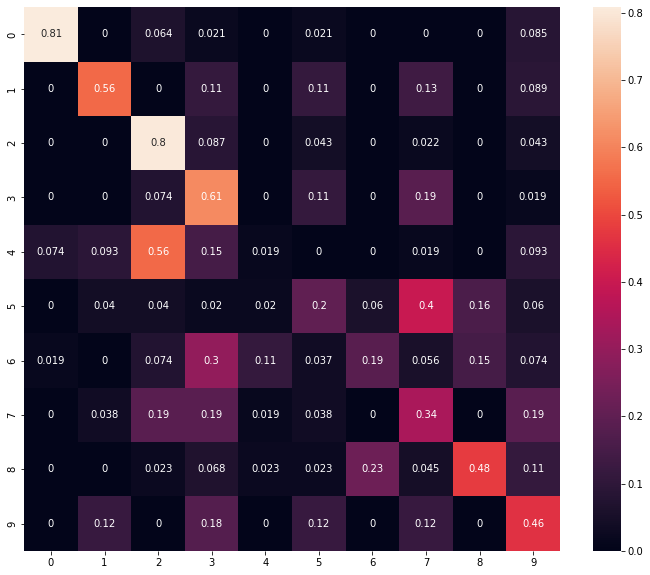

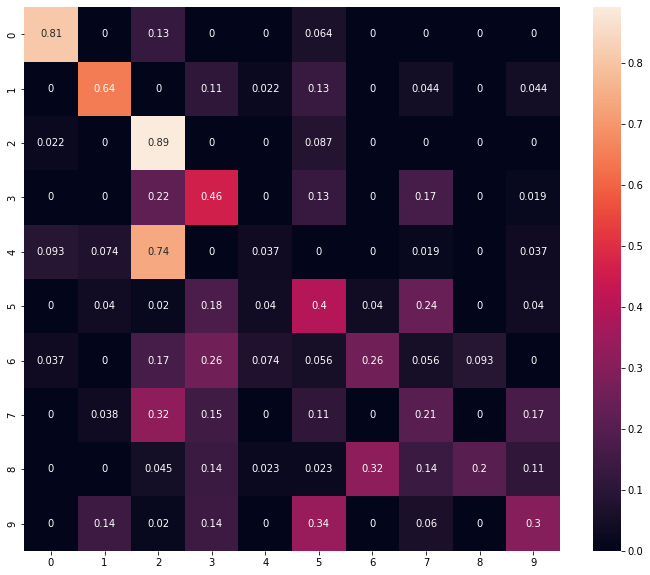

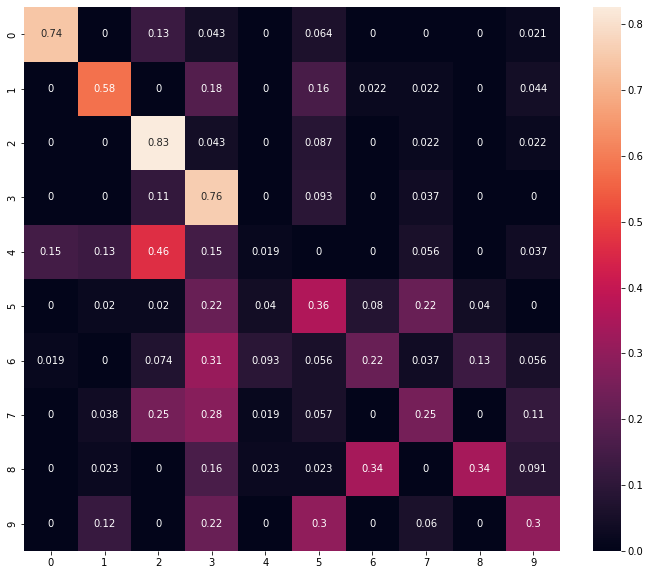

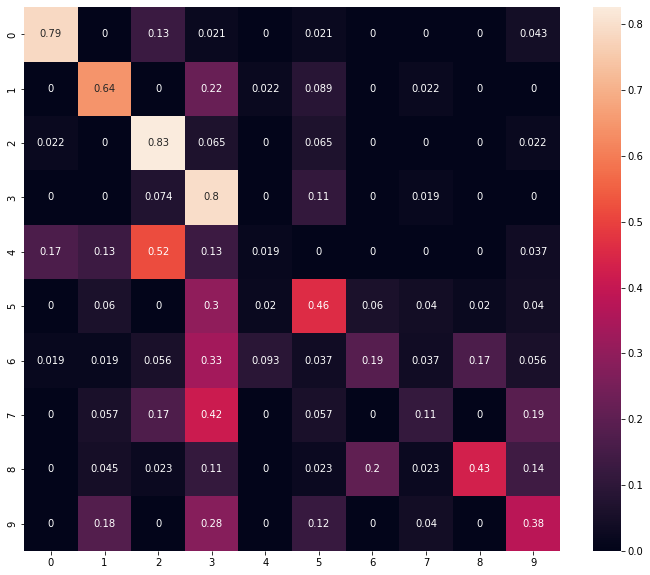

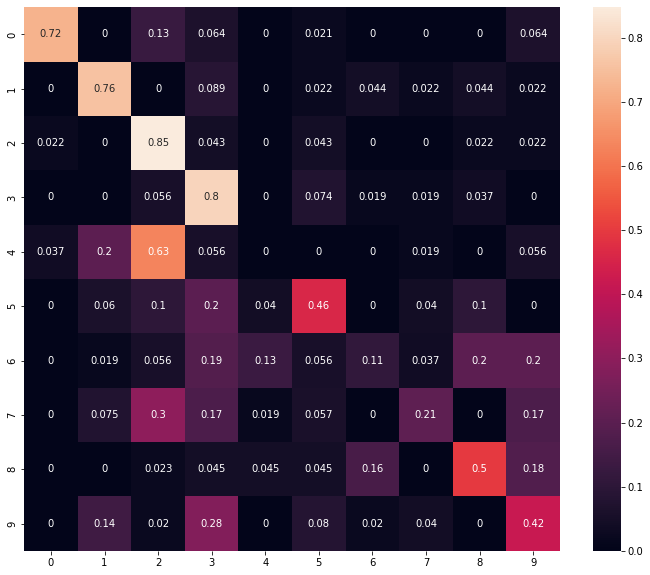

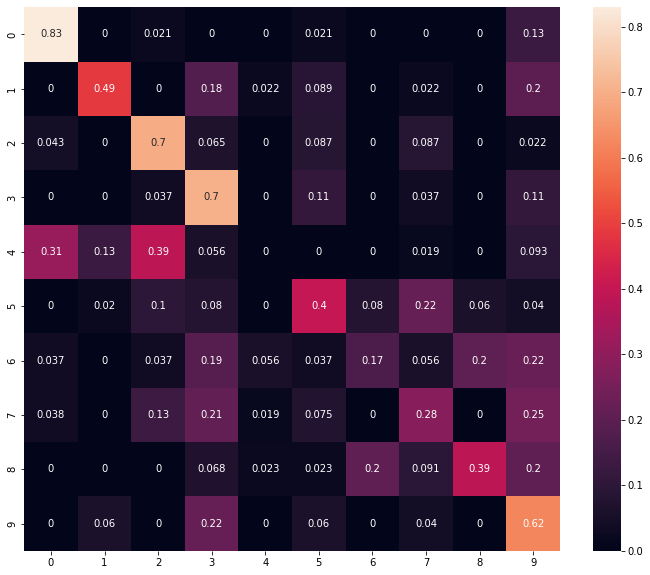

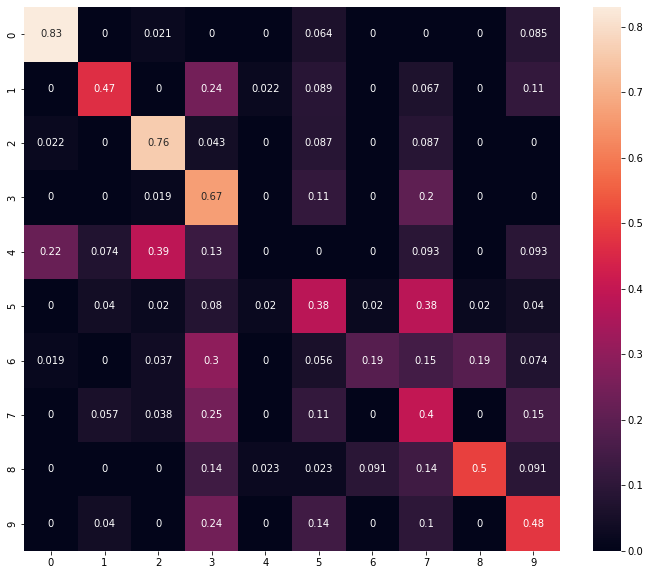

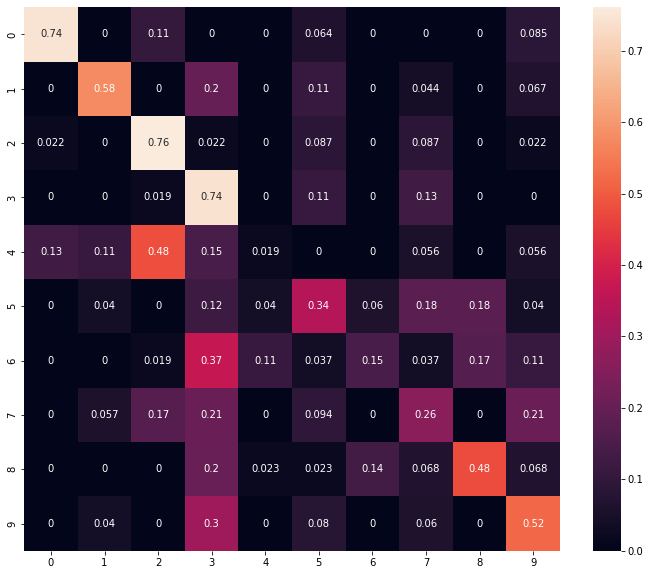

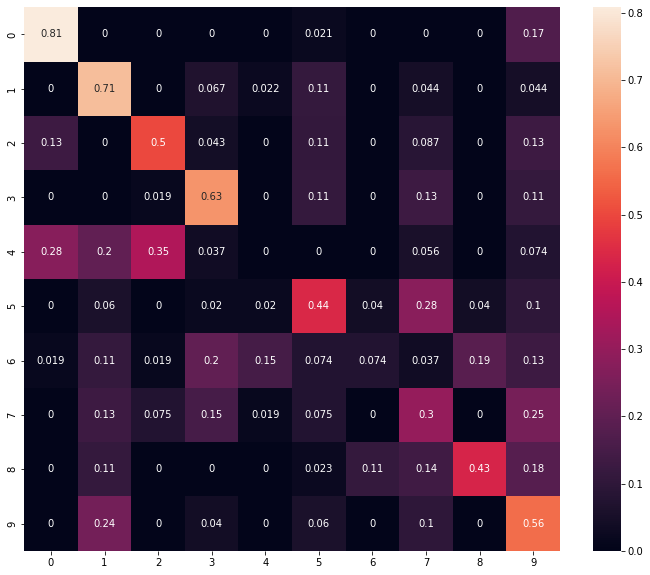

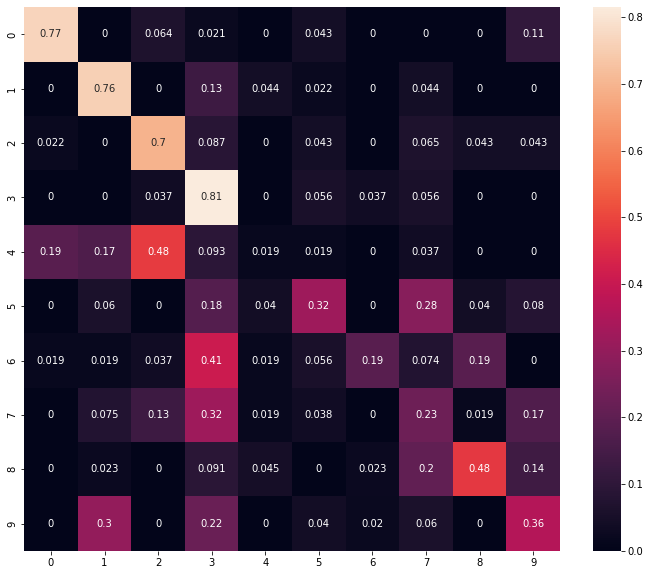

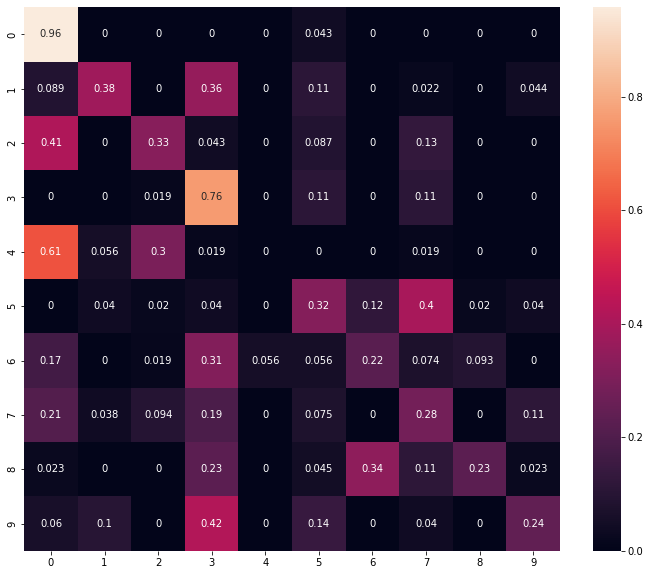

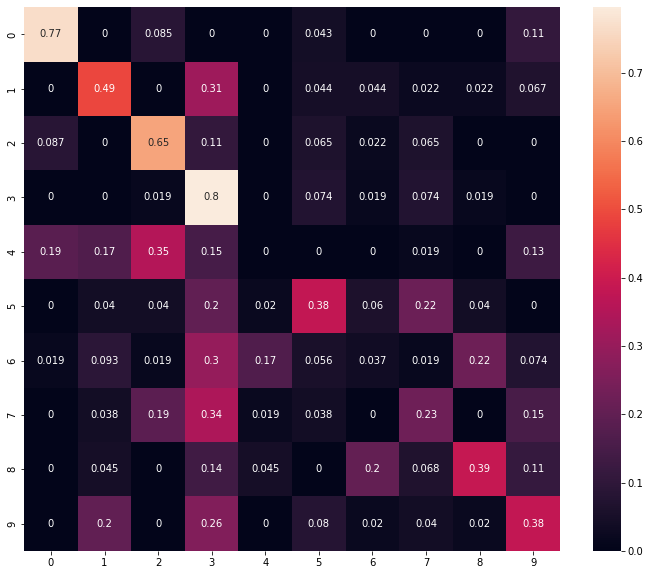

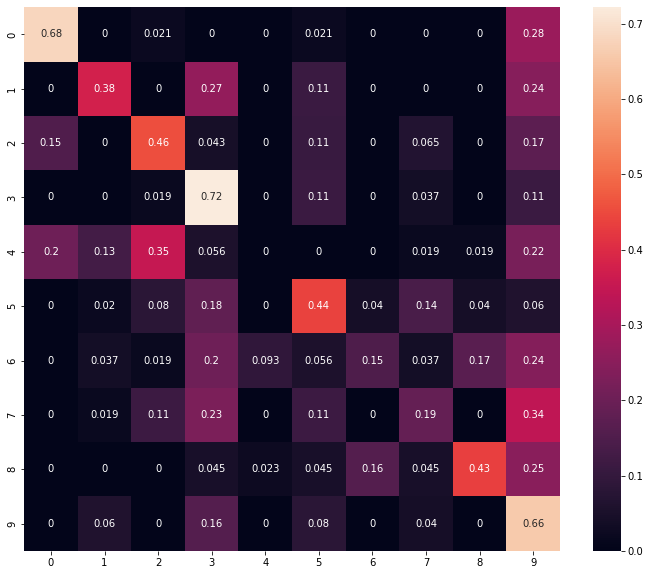

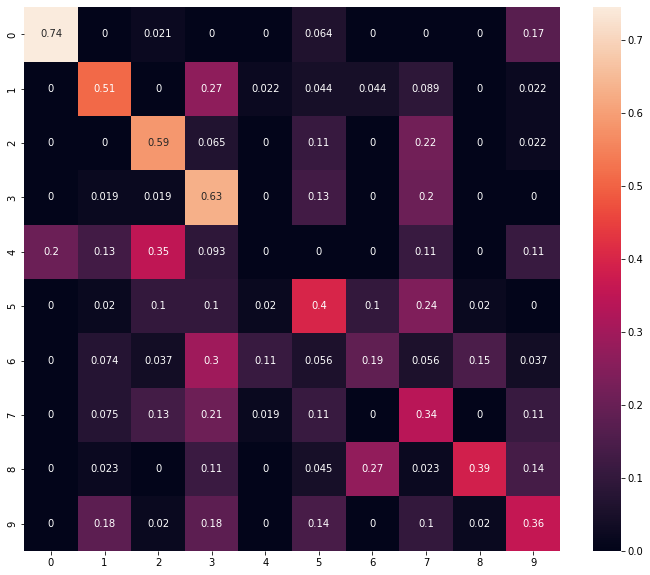

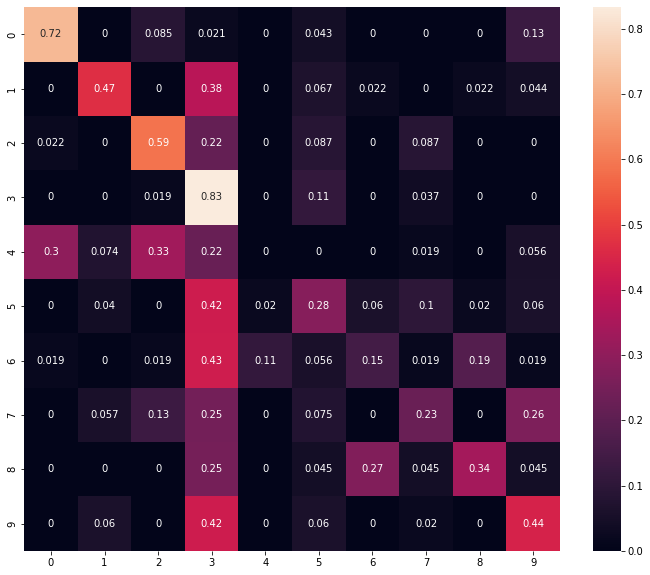

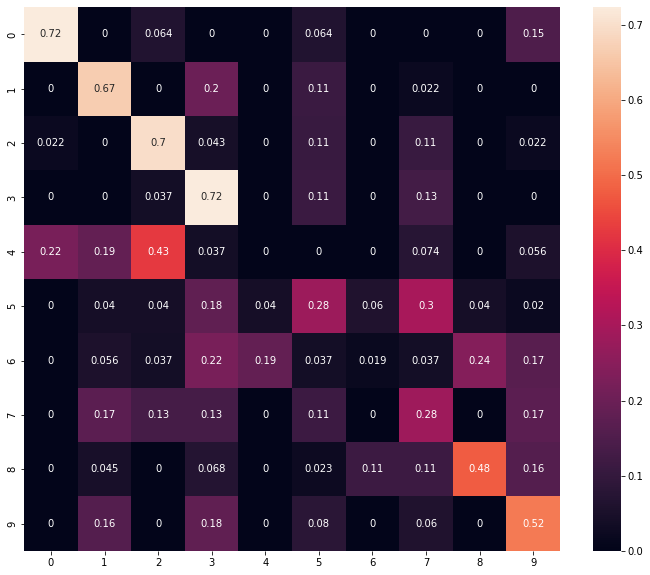

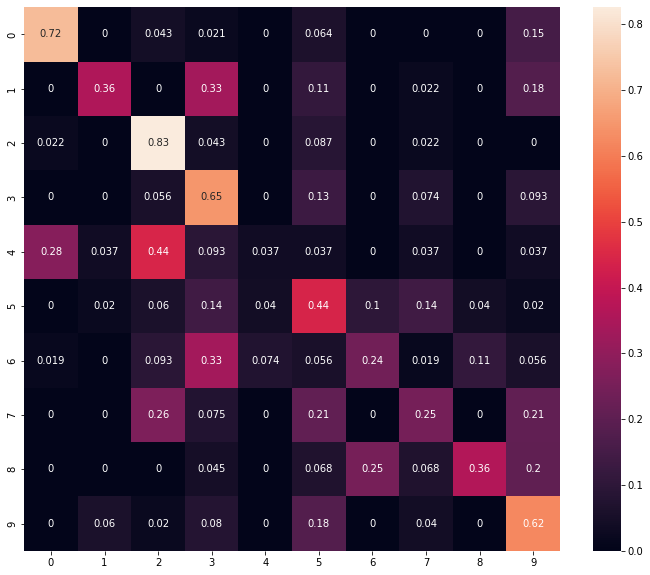

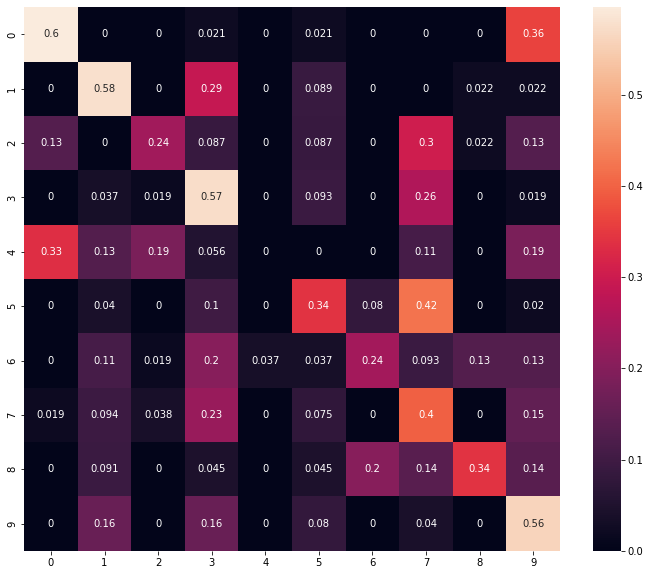

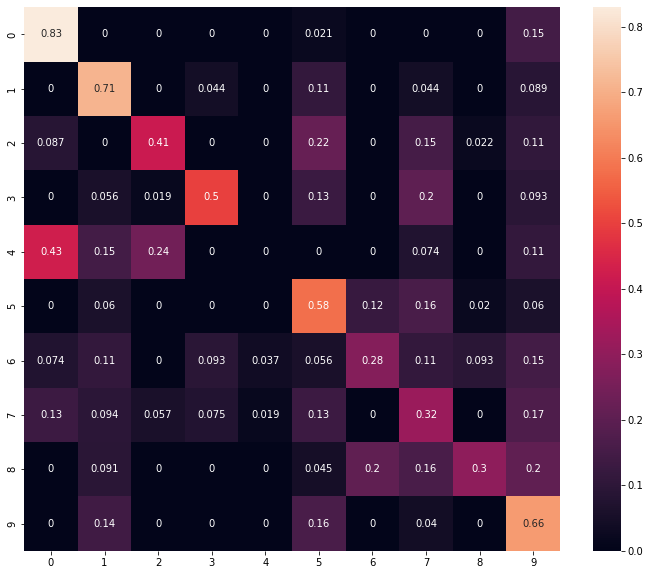

In [ ]:

#using augmentation type 1 which is changing the melspectrogram input_dim = 13
hidden_dim = 32
input_dim = 13
capture_hidden_dim = np.zeros([10,hidden_dim])
layer_dim = 1  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10
num_epochs = 80
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)

# JUST PRINTING MODEL & PARAMETERS
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())
criterion = nn.NLLLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Number of steps to unroll
total_loss = 0
iter = 0
f1= F1Score(task="multiclass", num_classes=10).to(device)
for epoch in range(num_epochs):
    total_loss = 0
    for i, ( sound, labels) in enumerate(train_data_loader):
        model.train()
        # Load images as tensors with gradient accumulation abilities
        #sound = sound.view(-1, seq_dim, input_dim).requires_grad_()
        sound = sound.requires_grad_()
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs, hn = model(sound.to(device))
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs.to(device), labels.to(device))


        # Getting gradients w.r.t. parameters
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 20.0)
        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            model.eval()
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            F1 = 0
            ww = []
            ee=[]
            for images, labels in dev_data_loader:
                # Resize images
                #images = images.view(-1, seq_dim, input_dim)


                # Forward pass only to get logits/output
                outputs, hn = model(images.to(device))
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.to(device) == labels.to(device)).sum()


                ww = ww+ list(predicted.cpu().detach().numpy())
                ee = ee+ list(labels.cpu().detach().numpy())
                #predicted = torch.where(torch.sigmoid(outputs.data) > 0.5, 1, 0)
                f1_ = f1(predicted.to(device),labels.to(device))
                F1+=f1_.item()

            print(f"Test set accuracy = {100 * correct / len(dev_dataset)} %")
            f1_score = 100* F1/len(dev_dataset)
            print("f1 score", f1_score)
            cf_matrix = confusion_matrix(ee,ww)

            classes = (0,1,2,3,4,5,6,7,8,9)
            df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                            columns = [i for i in classes])
            plt.figure(figsize = (12,10))
            sn.heatmap(df_cm, annot=True)

            print(classification_report(ee, ww, labels=list(range(10))))



            accuracy = 100 * correct / total
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [ ]:
train_dataset = SDRDataset_2(sdr_df[sdr_df['speaker'] == 'theo' ], type = "TRAIN")
train_data_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
dev_dataset = SDRDataset_2(sdr_df, type = "DEV")
dev_data_loader = DataLoader(dev_dataset, batch_size=1, shuffle=True)

In [ ]:

#using augmentation type 2 which is changing the melspectrogram input_dim = 13
hidden_dim = 32
capture_hidden_dim = np.zeros([10,hidden_dim])
layer_dim = 1  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 10
num_epochs = 30
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim).to(device)

# JUST PRINTING MODEL & PARAMETERS
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())
criterion = nn.NLLLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Number of steps to unroll
total_loss = 0
iter = 0
f1= F1Score(task="multiclass", num_classes=10).to(device)
for epoch in range(num_epochs):
    total_loss = 0
    for i, ( sound, labels) in enumerate(train_data_loader):
        model.train()
        # Load images as tensors with gradient accumulation abilities
        #sound = sound.view(-1, seq_dim, input_dim).requires_grad_()
        sound = sound.requires_grad_()
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # outputs.size() --> 100, 10
        outputs, hn = model(sound.to(device))
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs.to(device), labels.to(device))


        # Getting gradients w.r.t. parameters
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 20.0)
        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            model.eval()
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            F1 = 0
            ww = []
            ee=[]
            for images, labels in dev_data_loader:
                # Resize images
                #images = images.view(-1, seq_dim, input_dim)


                # Forward pass only to get logits/output
                outputs, hn = model(images.to(device))
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.to(device) == labels.to(device)).sum()


                ww = ww+ list(predicted.cpu().detach().numpy())
                ee = ee+ list(labels.cpu().detach().numpy())
                #predicted = torch.where(torch.sigmoid(outputs.data) > 0.5, 1, 0)
                f1_ = f1(predicted.to(device),labels.to(device))
                F1+=f1_.item()

            print(f"Test set accuracy = {100 * correct / len(dev_dataset)} %")
            f1_score = 100* F1/len(dev_dataset)
            print("f1 score", f1_score)
            cf_matrix = confusion_matrix(ee,ww)

            classes = (0,1,2,3,4,5,6,7,8,9)
            df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                            columns = [i for i in classes])
            plt.figure(figsize = (12,10))
            sn.heatmap(df_cm, annot=True)

            print(classification_report(ee, ww, labels=list(range(10))))



            accuracy = 100 * correct / total
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

# contrastive learning model


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cuda


In [ ]:
class ContrastiveLoss(torch.nn.Module):
    """
    Source: https://gist.github.com/dimartinot/80abaabaea9a6ef3d9ab0ab199927ee4#file-contrastive_loss-py
    TODO: rewrite
    """

    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, dist, label):

        loss = torch.mean(1/2*(label) * torch.pow(dist, 2) +
                                      1/2*(1-label) * torch.pow(torch.clamp(self.margin - dist, min=0.0), 2))

        return loss

In [ ]:
class Contrastive(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            #Input = 3 x 32 x 32, Output = 32 x 32 x 32
            torch.nn.Conv2d(in_channels = 4, out_channels = 32, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 32 x 32 x 32, Output = 32 x 16 x 16
            torch.nn.MaxPool2d(kernel_size=2),

            #Input = 32 x 16 x 16, Output = 64 x 16 x 16
            torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 16 x 16, Output = 64 x 8 x 8
            torch.nn.MaxPool2d(kernel_size=2),

            #Input = 64 x 8 x 8, Output = 64 x 8 x 8
            torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 8 x 8, Output = 64 x 4 x 4
            torch.nn.MaxPool2d(kernel_size=2),

            torch.nn.Flatten(),
            torch.nn.Linear(64*8*8, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 128)
        )

        self.final_class =  nn.Linear(128, 10)


    def forward(self, x):
        op =  self.model(x)
        op1 = self.final_class(op)
        return op, op1.type(torch.FloatTensor)

In [ ]:
os.makedirs("./temp")

In [ ]:

class Contrastive_Dataset(Dataset):
    """
    Src: https://stackoverflow.com/questions/65112063/ive-2-folders-one-image-in-1-folder-and-another-in-another-folder-i-have-to-co

    Note: Code rewritten.
    """
    def __init__(self,metadata, type):

      self.d = 0
      self.metadata = metadata[metadata['split'] == type]
      if(type == 'TRAIN'):
        self.d = 1
      self.k = SpecAugmentTorch( 10 , 5 ,  1  , 20 , 1.0 , 1, batch = 1)


    def __getitem__(self, idx):

      audio_file = self.metadata.iloc[idx]['identifier']
      digit = self.metadata.iloc[idx]['label']
      signal_1, sr = librosa.load(os.path.join("./speech_data",audio_file) + ".wav", sr=8000)
      mel_spectrogram_1 = extract_melspectrogram(signal_1, sr, num_mels=13)


      if(self.d == 1):
        choose_aug = np.random.randint(0,2) # 0 or 1
        choose_class = np.random.randint(0,2) # 0 or 1

        if choose_class:
          # class 1 is same class image
            while True:
                other_img = self.metadata.sample(1)
                new_random_image = other_img['label'].values[0]
                if digit == new_random_image:
                    break
        else:
            while True:
                other_img = self.metadata.sample(1)
                new_random_image = other_img['label'].values[0]
                if digit != new_random_image:
                    break


        label_image_one = digit
        label_image_two = other_img['label'].values[0]
        signal_2, sr = librosa.load(os.path.join("./speech_data",other_img['identifier'].values[0]) + ".wav", sr=8000)


        if choose_aug:
          mel_spectrogram_1 = self.k(np.expand_dims(np.expand_dims(mel_spectrogram_1, axis = 0), axis = 0))
          mel_spectrogram_1 = (mel_spectrogram_1.reshape(13, -1))
          mel_spectrogram_1 = mel_spectrogram_1.cpu().numpy()

          mel_spectrogram_2 = extract_melspectrogram(signal_2, sr, num_mels=13)
          mel_spectrogram_2 = self.k(np.expand_dims(np.expand_dims(mel_spectrogram_2, axis = 0), axis = 0))
          mel_spectrogram_2 = (mel_spectrogram_2.reshape(13, -1))
          mel_spectrogram_2 = mel_spectrogram_2.cpu().numpy()

        else:

              random_pitch_shift = lambda: np.random.randint(-400, +400)
              # the pitch will be changed by a shift somewhere between (-400, +400)
              random_pitch_shift_effect = augment.EffectChain().pitch("-q", random_pitch_shift).rate(sr)
              # -q flag enables faster, but lower quality processing
              random_room_size = lambda: np.random.randint(0, 101)
              noise_generator_1 = lambda: torch.zeros_like(torch.from_numpy(signal_1)).uniform_()
              noise_generator_2 = lambda: torch.zeros_like(torch.from_numpy(signal_2)).uniform_()

              combination_1 = augment.EffectChain() \
              .pitch("-q", random_pitch_shift).rate(sr) \
              .reverb(50, 50, random_room_size).channels(1) \
              .additive_noise(noise_generator_1, snr=15)

              combination_2 = augment.EffectChain() \
              .pitch("-q", random_pitch_shift).rate(sr) \
              .reverb(50, 50, random_room_size).channels(1) \
              .additive_noise(noise_generator_2, snr=15)

              combination_3 = augment.EffectChain() \
              .pitch("-q", random_pitch_shift).rate(sr) \
              .reverb(50, 50, random_room_size).channels(1)


              try:
                signal_1 = combination_1.apply(torch.from_numpy(signal_1), src_info={'rate': sr}, target_info={'rate': sr})
              except:
                signal_1 = combination_3.apply(torch.from_numpy(signal_1), src_info={'rate': sr}, target_info={'rate': sr})
              try:
                signal_2 = combination_2.apply(torch.from_numpy(signal_2), src_info={'rate': sr}, target_info={'rate': sr})
              except:
                signal_2 = combination_3.apply(torch.from_numpy(signal_2), src_info={'rate': sr}, target_info={'rate': sr})


              mel_spectrogram_1 = extract_melspectrogram(signal_1.detach().numpy().reshape(-1), sr, num_mels=13)
              mel_spectrogram_2 = extract_melspectrogram(signal_2.detach().numpy().reshape(-1), sr, num_mels=13)

        arr = []
        for i in ([mel_spectrogram_1, mel_spectrogram_2]):

              fig, ax = plt.subplots(figsize=(10, 2), sharex=True)
              img = librosa.display.specshow(
              i,
              sr=sr,
              cmap='viridis',
              fmax=4000,
              hop_length=80)
              #ax.set(title='Log-frequency power spectrogram')
              #img_buf = io.BytesIO()

              fig.set_size_inches((64/fig.get_dpi(),64/fig.get_dpi()))
              plt.savefig('./temp/img')
              plt.close(fig)
              im = Image.open('./temp/img.png')
              arr.append( np.asarray(im))



        # Label 1 = similar
        # Label 0 = diff
        get_pair_label = torch.from_numpy(np.array([label_image_one == label_image_two],dtype=np.float32))

        return arr, get_pair_label, [label_image_one, label_image_two]


      else:
              fig, ax = plt.subplots(figsize=(10, 2), sharex=True)
              img = librosa.display.specshow(
              mel_spectrogram_1,
              sr=sr,
              cmap='viridis',
              fmax=4000,
              hop_length=80)
              #ax.set(title='Log-frequency power spectrogram')
              #img_buf = io.BytesIO()

              fig.set_size_inches((64/fig.get_dpi(),64/fig.get_dpi()))
              plt.savefig('./temp/img')
              plt.close(fig)
              im = Image.open('./temp/img.png')

              return np.asarray(im), digit


    def __len__(self):
        return len(self.metadata) # we can decide the nr pairs

In [ ]:
train_dataset = Contrastive_Dataset(sdr_df, type = "TRAIN")
train_data_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_dataset = Contrastive_Dataset(sdr_df, type = "DEV")
test_data_loader = DataLoader(test_dataset, batch_size=20, shuffle=True)

In [ ]:
loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
learning_rate = 0.001
# Initialize the model for this run
model = Contrastive().to(device)
num_epochs = 100
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
contrastive_loss = ContrastiveLoss()
distance =  nn.CosineSimilarity(dim=1, eps=1e-6)
# Train the model
lr = learning_rate
total_step = len(train_data_loader)

for epoch in range(num_epochs):
    correct = 0
    correct_image_one = 0
    correct_image_two = 0
    total = 0
    for batch_idx, data in enumerate(train_data_loader):
        [pair_image_one, pair_image_two], get_pair_label, [label_image_one, label_image_two] = data
        # Move tensors to the configured device
        pair_image_one = pair_image_one.to(device)
        pair_image_two = pair_image_two.to(device)

        label_image_one = label_image_one.to(device)
        label_image_two = label_image_two.to(device)
        get_pair_label = get_pair_label.to(device)

        # Forward pass of positive image
        #features_image_one, output_one = model(pair_image_one)
        features_image_one, op_  = model((pair_image_one.type(torch.cuda.FloatTensor)).permute(0,3,1,2))

        features_image_one = features_image_one.to(device)
        op_ = op_.to(device)
        # Forward pass of negative image
        features_image_two,op1_ = model((pair_image_two.type(torch.cuda.FloatTensor)).permute(0,3,1,2))
        op1_ = op1_.to(device)
        features_image_two = features_image_two.to(device)

        #predicted_one = torch.where(torch.sigmoid(output_one.data) > 0.5, 1, 0)
        #predicted_two = torch.where(torch.sigmoid(output_two.data) > 0.5, 1, 0)
        _, y_pred1 = torch.max(op_.data, 1)
        _, y_pred2 = torch.max(op1_.data, 1)
        #Comparing predicted and true labels


        # compute loss for positive image
        loss = criterion(op_, label_image_one)
        # compute loss for negative image
        loss += criterion(op1_, label_image_two)
        # normalize
        loss *= 0.5
        distance_features = 1 - distance(features_image_one, features_image_two)
        loss_features_similarity = contrastive_loss(distance_features, get_pair_label)

        loss += loss_features_similarity

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, batch_idx+1, total_step, loss.item()))
        total += label_image_one.size(0)
        correct_image_one += (y_pred1 == label_image_one).sum().item()

        total += label_image_two.size(0)
        correct_image_two += (y_pred2 == label_image_two).sum().item()

        correct = (correct_image_one + correct_image_two)


    print('Train accuracy is: {} %'.format(100 * correct / total))
    train_acc_history.append(100 * correct / total)
    loss_history.append(loss.item())
#TODO: add validation
    correct_val = 0
    total = 0
    for batch_idx, data in enumerate(test_data_loader):

        pair_image_one, label_image_one  = data
        # Move tensors to the configured device
        pair_image_one = pair_image_one.to(device)

        label_image_one = label_image_one.to(device)

        #features_image_one, output_one = model(pair_image_one)
        features_image_one, op_  = model((pair_image_one.type(torch.cuda.FloatTensor)).permute(0,3,1,2))

        features_image_one = features_image_one.to(device)
        op_ = op_.to(device)
        # Forward pass of negative image

        _, y_pred1 = torch.max(op_.data, 1)
        #Comparing predicted and true labels

        total += label_image_one.size(0)
        correct_val += (y_pred1 == label_image_one).sum().item()
    print('Test accuracy is: {} %'.format(100 * correct_val / total))







'''plt.plot(train_acc_history)
#plt.plot(val_acc_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# plot the loss history
plt.plot(loss_history)
#plt.plot(val_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss history')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()'''

Epoch [1/100], Step [10/200], Loss: 2.5132
Epoch [1/100], Step [20/200], Loss: 2.9146
Epoch [1/100], Step [30/200], Loss: 2.7572
Epoch [1/100], Step [40/200], Loss: 3.0003
Epoch [1/100], Step [50/200], Loss: 2.0570
Epoch [1/100], Step [60/200], Loss: 2.5382
Epoch [1/100], Step [70/200], Loss: 2.3751
Epoch [1/100], Step [80/200], Loss: 2.4380
Epoch [1/100], Step [90/200], Loss: 2.5193
Epoch [1/100], Step [100/200], Loss: 2.3916
Epoch [1/100], Step [110/200], Loss: 2.2018
Epoch [1/100], Step [120/200], Loss: 1.9998
Epoch [1/100], Step [130/200], Loss: 2.7397
Epoch [1/100], Step [140/200], Loss: 2.5244
Epoch [1/100], Step [150/200], Loss: 1.6471
Epoch [1/100], Step [160/200], Loss: 2.4872
Epoch [1/100], Step [170/200], Loss: 1.8094
Epoch [1/100], Step [180/200], Loss: 1.8322
Epoch [1/100], Step [190/200], Loss: 1.9147
Epoch [1/100], Step [200/200], Loss: 2.1388
Train accuracy is: 42.9 %
Test accuracy is: 28.973843058350102 %
Epoch [2/100], Step [10/200], Loss: 2.2345
Epoch [2/100], Step [

# Do not touch below code


In [ ]:
"""SpecAugment Implementation for pytorch.
Related paper : https://arxiv.org/pdf/1904.08779.pdf
In this paper, show summarized parameters by each open datasets in Tabel 1.
-----------------------------------------
Policy | W  | F  | m_F |  T  |  p  | m_T
-----------------------------------------
None   |  0 |  0 |  -  |  0  |  -  |  -
-----------------------------------------
LB     | 80 | 27 |  1  | 100 | 1.0 | 1
-----------------------------------------
LD     | 80 | 27 |  2  | 100 | 1.0 | 2
-----------------------------------------
SM     | 40 | 15 |  2  |  70 | 0.2 | 2
-----------------------------------------
SS     | 40 | 27 |  2  |  70 | 0.2 | 2
-----------------------------------------
LB : LibriSpeech basic
LD : LibriSpeech double
SM : Switchboard mild
SS : Switchboard strong

reference:
[1] https://github.com/DemisEom/SpecAugment
[2] https://github.com/zcaceres/spec_augment/issues/17
[3] https://arxiv.org/pdf/1904.08779.pdf
"""

import torch
import random
import librosa
import matplotlib
import numpy as np
import librosa.display
import matplotlib.pyplot as plt


def h_poly(t):
    tt = t.unsqueeze(-2)**torch.arange(4, device=t.device).view(-1,1)
    A = torch.tensor([
        [1, 0, -3, 2],
        [0, 1, -2, 1],
        [0, 0, 3, -2],
        [0, 0, -1, 1]
    ], dtype=t.dtype, device=t.device)
    return A @ tt

def hspline_interpolate_1D(x, y, xs):
    '''
    Input x and y must be of shape (batch, n) or (n)
    '''
    m = (y[..., 1:] - y[..., :-1]) / (x[..., 1:] - x[..., :-1])
    m = torch.cat([m[...,[0]], (m[...,1:] + m[...,:-1]) / 2, m[...,[-1]]], -1)
    idxs = torch.searchsorted(x[..., 1:], xs)
    # print(torch.abs(x.take_along_dim(idxs+1, dim=-1) - x.gather(dim=-1, index=idxs+1)))
    dx = (x.gather(dim=-1, index=idxs+1) - x.gather(dim=-1, index=idxs))
    hh = h_poly((xs - x.gather(dim=-1, index=idxs)) / dx)
    return hh[...,0,:] * y.gather(dim=-1, index=idxs) \
        + hh[...,1,:] * m.gather(dim=-1, index=idxs) * dx \
        + hh[...,2,:] * y.gather(dim=-1, index=idxs+1) \
        + hh[...,3,:] * m.gather(dim=-1, index=idxs+1) * dx
    # dx = (x.take_along_dim(idxs+1, dim=-1) - x.take_along_dim(idxs, dim=-1))
    # hh = h_poly((xs - x.take_along_dim(idxs, dim=-1)) / dx)
    # return hh[...,0,:] * y.take_along_dim(idxs, dim=-1) \
    #     + hh[...,1,:] * m.take_along_dim(idxs, dim=-1) * dx \
    #     + hh[...,2,:] * y.take_along_dim(idxs+1, dim=-1) \
    #     + hh[...,3,:] * m.take_along_dim(idxs+1, dim=-1) * dx

def time_warp(specs, W=10):
  '''
  Timewarp augmentation

  param:
    specs: spectrogram of size (batch, channel, freq_bin, length)
    W: strength of warp
  '''
  #device = specs.device
  batch_size, _, num_rows, spec_len = specs.shape
  try:
    warp_p = torch.randint(W, spec_len - W, (batch_size,), device=device)
  except:
    warp_p = torch.randint(1, spec_len - 1, (batch_size,), device=device)

  # Uniform distribution from (0,W) with chance to be up to W negative
  # warp_d = torch.randn(1)*W # Not using this since the paper author make random number with uniform distribution
  warp_d = torch.randint(-W, W, (batch_size,), device=device)
  # print("warp_d", warp_d)
  x = torch.stack([torch.tensor([0], device=device).expand(batch_size),
                   warp_p, torch.tensor([spec_len-1], device=device).expand(batch_size)], 1)
  y = torch.stack([torch.tensor([-1.], device=device).expand(batch_size),
                   (warp_p-warp_d)*2/(spec_len-1.)-1., torch.tensor([1.], device=device).expand(batch_size)], 1)
  # print((warp_p-warp_d)*2/(spec_len-1.)-1.)

  # Interpolate from 3 points to spec_len
  xs = torch.linspace(0, spec_len-1, spec_len, device=device).unsqueeze(0).expand(batch_size, -1)
  ys = hspline_interpolate_1D(x, y, xs)

  grid = torch.cat(
      (ys.view(batch_size,1,-1,1).expand(-1,num_rows,-1,-1),
       torch.linspace(-1, 1, num_rows, device=device).view(-1,1,1).expand(batch_size,-1,spec_len,-1)), -1)

  return torch.nn.functional.grid_sample(torch.from_numpy(specs).to(device), grid.to(device), align_corners=True)

def spec_augment(mel_spectrogram, time_warping_para=80, frequency_masking_para=27,
                 time_masking_para=100, frequency_mask_num=1, time_mask_num=1):
    """Spec augmentation Calculation Function.
    'SpecAugment' have 3 steps for audio data augmentation.
    first step is time warping using Tensorflow's image_sparse_warp function.
    Second step is frequency masking, last step is time masking.
    # Arguments:
      mel_spectrogram(numpy array): [B, C, F, T] audio file path of you want to warping and masking. C=1 for magnitude, C=2 for STFT complex output
      time_warping_para(float): Augmentation parameter, "time warp parameter W".
        If none, default = 80 for LibriSpeech.
      frequency_masking_para(float): Augmentation parameter, "frequency mask parameter F"
        If none, default = 100 for LibriSpeech.
      time_masking_para(float): Augmentation parameter, "time mask parameter T"
        If none, default = 27 for LibriSpeech.
      frequency_mask_num(float): number of frequency masking lines, "m_F".
        If none, default = 1 for LibriSpeech.
      time_mask_num(float): number of time masking lines, "m_T".
        If none, default = 1 for LibriSpeech.
    # Returns
      mel_spectrogram(numpy array): warped and masked mel spectrogram.
    """
    assert len(mel_spectrogram.shape) == 4, "input spectra as [Batch, Channel, Frequency_dim, N_frame]"
    v = mel_spectrogram.shape[2]
    tau = mel_spectrogram.shape[3]

    # Step 1 : Time warping
    warped_mel_spectrogram = time_warp(mel_spectrogram, W=time_warping_para)

    # Step 2 : Frequency masking
    for i in range(frequency_mask_num):
        f = np.random.uniform(low=0.0, high=frequency_masking_para)
        f = int(f)
        f0 = random.randint(0, v-f)
        warped_mel_spectrogram[:, :, f0:f0+f, :] = 0

    # Step 3 : Time masking
    for i in range(time_mask_num):
        t = np.random.uniform(low=0.0, high=time_masking_para)
        t = int(t)
        try:
          t0 = random.randint(0, tau-t)
          warped_mel_spectrogram[:, :, :, t0:t0+t] = 0
        except:
          warped_mel_spectrogram[:, :, :, 5:10] = 0
    return warped_mel_spectrogram


def visualization_spectrogram(mel_spectrogram, title):
    """visualizing result of SpecAugment
    # Arguments:
      mel_spectrogram(ndarray): mel_spectrogram to visualize.
      title(String): plot figure's title
    """
    # Show mel-spectrogram using librosa's specshow.
    plt.figure(figsize=(10, 3))
    # plt_d = librosa.power_to_db(mel_spectrogram[ :, :], ref=np.max)
    plt_d = np.log(mel_spectrogram.numpy()+0.05)
    plt_d = plt_d - plt_d.min()
    librosa.display.specshow(plt_d, y_axis='mel', x_axis='time')
    # plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.savefig("./examples/"+title)
    plt.show()
    plt.close()

class SpecAugmentTorch(torch.nn.Module):

  def __init__(self, W, F, mF, T, p, mT, batch):
      super().__init__()
      self.W = W
      self.F = F
      self.mF = mF
      self.T = T
      self.p = p
      self.mT = mT
      self.batch = batch

  def forward(self, spec_batch):
    '''
    spec_batch: [b, F, T]
    '''
    if self.batch:
      return spec_augment(spec_batch, self.W, self.F, self.T, self.mF, self.mT)
    else:
      specaug_lst = []
      for i in range(spec_batch.shape[0]):
        spec_aug = spec_augment(spec_batch[i].unsqueeze(0), self.W, self.F, self.T, self.mF, self.mT)
        specaug_lst.append(spec_aug)
      specaug_batch = torch.cat(specaug_lst, dim=0)
      return specaug_batch

